# 大数の法則と中心極限定理

* 黒木玄
* 2022-04-11～2022-05-16
$
\newcommand\op{\operatorname}
\newcommand\R{{\mathbb R}}
\newcommand\Z{{\mathbb Z}}
\newcommand\var{\op{var}}
\newcommand\std{\op{std}}
\newcommand\eps{\varepsilon}
\newcommand\T[1]{T_{(#1)}}
\newcommand\bk{\bar\kappa}
$

このノートでは[Julia言語](https://julialang.org/)を使用している: 

* [Julia言語のインストールの仕方の一例](https://nbviewer.org/github/genkuroki/msfd28/blob/master/install.ipynb)

自明な誤りを見つけたら, 自分で訂正して読んで欲しい.  大文字と小文字の混同や書き直しが不完全な場合や符号のミスは非常によくある.

このノートに書いてある式を文字通りにそのまま読んで正しいと思ってしまうとひどい目に会う可能性が高い. しかし, 数が使われている文献には大抵の場合に文字通りに読むと間違っている式や主張が書いてあるので, 内容を理解した上で訂正しながら読んで利用しなければいけない. 実践的に数学を使う状況では他人が書いた式をそのまま信じていけない.

このノートの内容よりもさらに詳しいノートを自分で作ると勉強になるだろう.  膨大な時間を取られることになるが, このノートの内容に関係することで飯を食っていく可能性がある人にはそのためにかけた時間は無駄にならないと思われる.

<h1>目次<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#大数の法則" data-toc-modified-id="大数の法則-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>大数の法則</a></span><ul class="toc-item"><li><span><a href="#Markovの不等式" data-toc-modified-id="Markovの不等式-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Markovの不等式</a></span></li><li><span><a href="#Chebyshevの不等式" data-toc-modified-id="Chebyshevの不等式-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Chebyshevの不等式</a></span></li><li><span><a href="#大数の弱法則" data-toc-modified-id="大数の弱法則-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>大数の弱法則</a></span></li><li><span><a href="#不偏分散の-$n\to\infty$-での挙動" data-toc-modified-id="不偏分散の-$n\to\infty$-での挙動-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>不偏分散の $n\to\infty$ での挙動</a></span></li><li><span><a href="#大数の強法則" data-toc-modified-id="大数の強法則-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>大数の強法則</a></span><ul class="toc-item"><li><span><a href="#Borel-Cantelliの補題" data-toc-modified-id="Borel-Cantelliの補題-1.5.1"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>Borel-Cantelliの補題</a></span></li><li><span><a href="#4次以下のモーメントの存在を仮定した場合の大数の強法則" data-toc-modified-id="4次以下のモーメントの存在を仮定した場合の大数の強法則-1.5.2"><span class="toc-item-num">1.5.2&nbsp;&nbsp;</span>4次以下のモーメントの存在を仮定した場合の大数の強法則</a></span></li></ul></li><li><span><a href="#大数の強法則に関する文献" data-toc-modified-id="大数の強法則に関する文献-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>大数の強法則に関する文献</a></span></li><li><span><a href="#問題:-大数の法則に関する誤解" data-toc-modified-id="問題:-大数の法則に関する誤解-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>問題: 大数の法則に関する誤解</a></span></li><li><span><a href="#大数の法則のデモンストレーション" data-toc-modified-id="大数の法則のデモンストレーション-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>大数の法則のデモンストレーション</a></span><ul class="toc-item"><li><span><a href="#Bernoulli試行の大数の法則" data-toc-modified-id="Bernoulli試行の大数の法則-1.8.1"><span class="toc-item-num">1.8.1&nbsp;&nbsp;</span>Bernoulli試行の大数の法則</a></span></li><li><span><a href="#正規分布のサンプルの大数の法則" data-toc-modified-id="正規分布のサンプルの大数の法則-1.8.2"><span class="toc-item-num">1.8.2&nbsp;&nbsp;</span>正規分布のサンプルの大数の法則</a></span></li><li><span><a href="#ガンマ分布のサンプルの大数の法則" data-toc-modified-id="ガンマ分布のサンプルの大数の法則-1.8.3"><span class="toc-item-num">1.8.3&nbsp;&nbsp;</span>ガンマ分布のサンプルの大数の法則</a></span></li><li><span><a href="#大数の法則が成立しない場合:-Cauchy分布" data-toc-modified-id="大数の法則が成立しない場合:-Cauchy分布-1.8.4"><span class="toc-item-num">1.8.4&nbsp;&nbsp;</span>大数の法則が成立しない場合: Cauchy分布</a></span></li><li><span><a href="#大数の法則が成立しない場合:-Pólyaの壺" data-toc-modified-id="大数の法則が成立しない場合:-Pólyaの壺-1.8.5"><span class="toc-item-num">1.8.5&nbsp;&nbsp;</span>大数の法則が成立しない場合: Pólyaの壺</a></span></li></ul></li><li><span><a href="#$E[X_i]=0$-のときの和-$X_1+X_2+\cdots+X_n$-の分布の様子-(中心極限定理に向けて)" data-toc-modified-id="$E[X_i]=0$-のときの和-$X_1+X_2+\cdots+X_n$-の分布の様子-(中心極限定理に向けて)-1.9"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>$E[X_i]=0$ のときの和 $X_1+X_2+\cdots+X_n$ の分布の様子 (中心極限定理に向けて)</a></span></li></ul></li><li><span><a href="#二項分布の中心極限定理" data-toc-modified-id="二項分布の中心極限定理-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>二項分布の中心極限定理</a></span><ul class="toc-item"><li><span><a href="#二項分布の中心極限定理の内容" data-toc-modified-id="二項分布の中心極限定理の内容-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>二項分布の中心極限定理の内容</a></span></li><li><span><a href="#二項分布の中心極限定理のプロット" data-toc-modified-id="二項分布の中心極限定理のプロット-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>二項分布の中心極限定理のプロット</a></span></li><li><span><a href="#必修重要問題:-二項分布の正規分布近似を使った確率の近似計算1" data-toc-modified-id="必修重要問題:-二項分布の正規分布近似を使った確率の近似計算1-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>必修重要問題: 二項分布の正規分布近似を使った確率の近似計算1</a></span><ul class="toc-item"><li><span><a href="#WolframAlphaによる計算1" data-toc-modified-id="WolframAlphaによる計算1-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>WolframAlphaによる計算1</a></span></li><li><span><a href="#Julia言語による計算1" data-toc-modified-id="Julia言語による計算1-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Julia言語による計算1</a></span></li><li><span><a href="#Julia言語による視覚化1" data-toc-modified-id="Julia言語による視覚化1-2.3.3"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>Julia言語による視覚化1</a></span></li></ul></li><li><span><a href="#必修重要問題:-二項分布の正規分布近似を使った確率の近似計算2" data-toc-modified-id="必修重要問題:-二項分布の正規分布近似を使った確率の近似計算2-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>必修重要問題: 二項分布の正規分布近似を使った確率の近似計算2</a></span><ul class="toc-item"><li><span><a href="#WolframAlphaによる計算" data-toc-modified-id="WolframAlphaによる計算-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>WolframAlphaによる計算</a></span></li><li><span><a href="#Julia言語による計算2" data-toc-modified-id="Julia言語による計算2-2.4.2"><span class="toc-item-num">2.4.2&nbsp;&nbsp;</span>Julia言語による計算2</a></span></li><li><span><a href="#Julia言語による視覚化2" data-toc-modified-id="Julia言語による視覚化2-2.4.3"><span class="toc-item-num">2.4.3&nbsp;&nbsp;</span>Julia言語による視覚化2</a></span></li></ul></li><li><span><a href="#連続性補正とmid-P補正" data-toc-modified-id="連続性補正とmid-P補正-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>連続性補正とmid-P補正</a></span></li><li><span><a href="#問題:-二項分布の中心極限定理を使った極限の計算問題" data-toc-modified-id="問題:-二項分布の中心極限定理を使った極限の計算問題-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>問題: 二項分布の中心極限定理を使った極限の計算問題</a></span></li><li><span><a href="#二項分布の中心極限定理の証明の方針" data-toc-modified-id="二項分布の中心極限定理の証明の方針-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>二項分布の中心極限定理の証明の方針</a></span></li><li><span><a href="#(1)-Stirlingの公式を使った二項分布の確率質量函数の近似" data-toc-modified-id="(1)-Stirlingの公式を使った二項分布の確率質量函数の近似-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>(1) Stirlingの公式を使った二項分布の確率質量函数の近似</a></span></li><li><span><a href="#注意:-Kullback-Leibler情報量とSanovの定理との関係" data-toc-modified-id="注意:-Kullback-Leibler情報量とSanovの定理との関係-2.9"><span class="toc-item-num">2.9&nbsp;&nbsp;</span>注意: Kullback-Leibler情報量とSanovの定理との関係</a></span></li><li><span><a href="#(2)-二項分布の確率質量函数から正規分布の密度函数が出て来ること" data-toc-modified-id="(2)-二項分布の確率質量函数から正規分布の密度函数が出て来ること-2.10"><span class="toc-item-num">2.10&nbsp;&nbsp;</span>(2) 二項分布の確率質量函数から正規分布の密度函数が出て来ること</a></span></li></ul></li><li><span><a href="#中心極限定理" data-toc-modified-id="中心極限定理-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>中心極限定理</a></span><ul class="toc-item"><li><span><a href="#中心極限定理のラフな説明" data-toc-modified-id="中心極限定理のラフな説明-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>中心極限定理のラフな説明</a></span></li><li><span><a href="#中心極限定理の特性函数を使った証明" data-toc-modified-id="中心極限定理の特性函数を使った証明-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>中心極限定理の特性函数を使った証明</a></span></li><li><span><a href="#中心極限定理の収束の速さと歪度" data-toc-modified-id="中心極限定理の収束の速さと歪度-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>中心極限定理の収束の速さと歪度</a></span></li><li><span><a href="#中心極限定理のキュムラント母函数を使った証明" data-toc-modified-id="中心極限定理のキュムラント母函数を使った証明-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>中心極限定理のキュムラント母函数を使った証明</a></span></li><li><span><a href="#中心極限定理の収束の速さと歪度と尖度" data-toc-modified-id="中心極限定理の収束の速さと歪度と尖度-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>中心極限定理の収束の速さと歪度と尖度</a></span></li><li><span><a href="#中心極限定理のTaylorの定理のみを使う証明" data-toc-modified-id="中心極限定理のTaylorの定理のみを使う証明-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>中心極限定理のTaylorの定理のみを使う証明</a></span><ul class="toc-item"><li><span><a href="#多重積分の書き方" data-toc-modified-id="多重積分の書き方-3.6.1"><span class="toc-item-num">3.6.1&nbsp;&nbsp;</span>多重積分の書き方</a></span></li><li><span><a href="#積分剰余項型のTaylorの定理" data-toc-modified-id="積分剰余項型のTaylorの定理-3.6.2"><span class="toc-item-num">3.6.2&nbsp;&nbsp;</span>積分剰余項型のTaylorの定理</a></span></li><li><span><a href="#積分剰余項の別の表示" data-toc-modified-id="積分剰余項の別の表示-3.6.3"><span class="toc-item-num">3.6.3&nbsp;&nbsp;</span>積分剰余項の別の表示</a></span></li><li><span><a href="#微分剰余項型のTaylorの定理" data-toc-modified-id="微分剰余項型のTaylorの定理-3.6.4"><span class="toc-item-num">3.6.4&nbsp;&nbsp;</span>微分剰余項型のTaylorの定理</a></span></li><li><span><a href="#Taylorの定理を使った中心極限定理の証明" data-toc-modified-id="Taylorの定理を使った中心極限定理の証明-3.6.5"><span class="toc-item-num">3.6.5&nbsp;&nbsp;</span>Taylorの定理を使った中心極限定理の証明</a></span></li><li><span><a href="#中心極限定理の収束の速さと歪度と尖度(再)" data-toc-modified-id="中心極限定理の収束の速さと歪度と尖度(再)-3.6.6"><span class="toc-item-num">3.6.6&nbsp;&nbsp;</span>中心極限定理の収束の速さと歪度と尖度(再)</a></span></li></ul></li><li><span><a href="#問題:-中心極限定理の収束の様子のグラフ" data-toc-modified-id="問題:-中心極限定理の収束の様子のグラフ-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>問題: 中心極限定理の収束の様子のグラフ</a></span></li></ul></li><li><span><a href="#デルタ法" data-toc-modified-id="デルタ法-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>デルタ法</a></span><ul class="toc-item"><li><span><a href="#1次のデルタ法と2次のデルタ法" data-toc-modified-id="1次のデルタ法と2次のデルタ法-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>1次のデルタ法と2次のデルタ法</a></span></li><li><span><a href="#おまけ:-2次のデルタ法使用時の近似分散と歪度と尖度に関する不等式" data-toc-modified-id="おまけ:-2次のデルタ法使用時の近似分散と歪度と尖度に関する不等式-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>おまけ: 2次のデルタ法使用時の近似分散と歪度と尖度に関する不等式</a></span></li><li><span><a href="#問題:-2次のデルタ法の不偏分散の平方根の期待値の近似への応用" data-toc-modified-id="問題:-2次のデルタ法の不偏分散の平方根の期待値の近似への応用-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>問題: 2次のデルタ法の不偏分散の平方根の期待値の近似への応用</a></span></li><li><span><a href="#問題:-1次のデルタ法の正規分布近似への応用" data-toc-modified-id="問題:-1次のデルタ法の正規分布近似への応用-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>問題: 1次のデルタ法の正規分布近似への応用</a></span></li><li><span><a href="#問題:-1次のデルタ法による分布の逆数の近似" data-toc-modified-id="問題:-1次のデルタ法による分布の逆数の近似-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>問題: 1次のデルタ法による分布の逆数の近似</a></span></li><li><span><a href="#例:-自由度が大きなχ²分布の逆数の近似" data-toc-modified-id="例:-自由度が大きなχ²分布の逆数の近似-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>例: 自由度が大きなχ²分布の逆数の近似</a></span></li><li><span><a href="#問題:-デルタ法による分布の対数の近似" data-toc-modified-id="問題:-デルタ法による分布の対数の近似-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>問題: デルタ法による分布の対数の近似</a></span></li><li><span><a href="#例:-自由度が大きなχ²分布の対数の近似" data-toc-modified-id="例:-自由度が大きなχ²分布の対数の近似-4.8"><span class="toc-item-num">4.8&nbsp;&nbsp;</span>例: 自由度が大きなχ²分布の対数の近似</a></span></li><li><span><a href="#問題:-ベータ分布の正規分布近似" data-toc-modified-id="問題:-ベータ分布の正規分布近似-4.9"><span class="toc-item-num">4.9&nbsp;&nbsp;</span>問題: ベータ分布の正規分布近似</a></span></li><li><span><a href="#問題:-ベータ分布の正規分布近似の直接的証明" data-toc-modified-id="問題:-ベータ分布の正規分布近似の直接的証明-4.10"><span class="toc-item-num">4.10&nbsp;&nbsp;</span>問題: ベータ分布の正規分布近似の直接的証明</a></span></li></ul></li><li><span><a href="#各種の確率分布の正規分布近似" data-toc-modified-id="各種の確率分布の正規分布近似-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>各種の確率分布の正規分布近似</a></span><ul class="toc-item"><li><span><a href="#二項分布の正規分布近似" data-toc-modified-id="二項分布の正規分布近似-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>二項分布の正規分布近似</a></span></li><li><span><a href="#負の二項分布の正規分布近似" data-toc-modified-id="負の二項分布の正規分布近似-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>負の二項分布の正規分布近似</a></span></li><li><span><a href="#Poisson分布の正規分布近似" data-toc-modified-id="Poisson分布の正規分布近似-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Poisson分布の正規分布近似</a></span></li><li><span><a href="#ガンマ分布の正規分布近似" data-toc-modified-id="ガンマ分布の正規分布近似-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>ガンマ分布の正規分布近似</a></span></li><li><span><a href="#χ²分布の正規分布近似" data-toc-modified-id="χ²分布の正規分布近似-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>χ²分布の正規分布近似</a></span></li><li><span><a href="#逆ガンマ分布の正規分布近似" data-toc-modified-id="逆ガンマ分布の正規分布近似-5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>逆ガンマ分布の正規分布近似</a></span></li><li><span><a href="#ベータ分布の正規分布近似" data-toc-modified-id="ベータ分布の正規分布近似-5.7"><span class="toc-item-num">5.7&nbsp;&nbsp;</span>ベータ分布の正規分布近似</a></span></li><li><span><a href="#$t$-分布の正規分布近似" data-toc-modified-id="$t$-分布の正規分布近似-5.8"><span class="toc-item-num">5.8&nbsp;&nbsp;</span>$t$ 分布の正規分布近似</a></span></li><li><span><a href="#ベータプライム分布の正規分布近似" data-toc-modified-id="ベータプライム分布の正規分布近似-5.9"><span class="toc-item-num">5.9&nbsp;&nbsp;</span>ベータプライム分布の正規分布近似</a></span></li><li><span><a href="#$F$-分布の正規分布近似" data-toc-modified-id="$F$-分布の正規分布近似-5.10"><span class="toc-item-num">5.10&nbsp;&nbsp;</span>$F$ 分布の正規分布近似</a></span></li><li><span><a href="#超幾何分布の正規分布近似" data-toc-modified-id="超幾何分布の正規分布近似-5.11"><span class="toc-item-num">5.11&nbsp;&nbsp;</span>超幾何分布の正規分布近似</a></span></li><li><span><a href="#ベータ二項分布の正規分布近似" data-toc-modified-id="ベータ二項分布の正規分布近似-5.12"><span class="toc-item-num">5.12&nbsp;&nbsp;</span>ベータ二項分布の正規分布近似</a></span></li><li><span><a href="#ベータ負の二項分布の正規分布近似" data-toc-modified-id="ベータ負の二項分布の正規分布近似-5.13"><span class="toc-item-num">5.13&nbsp;&nbsp;</span>ベータ負の二項分布の正規分布近似</a></span></li></ul></li></ul></div>

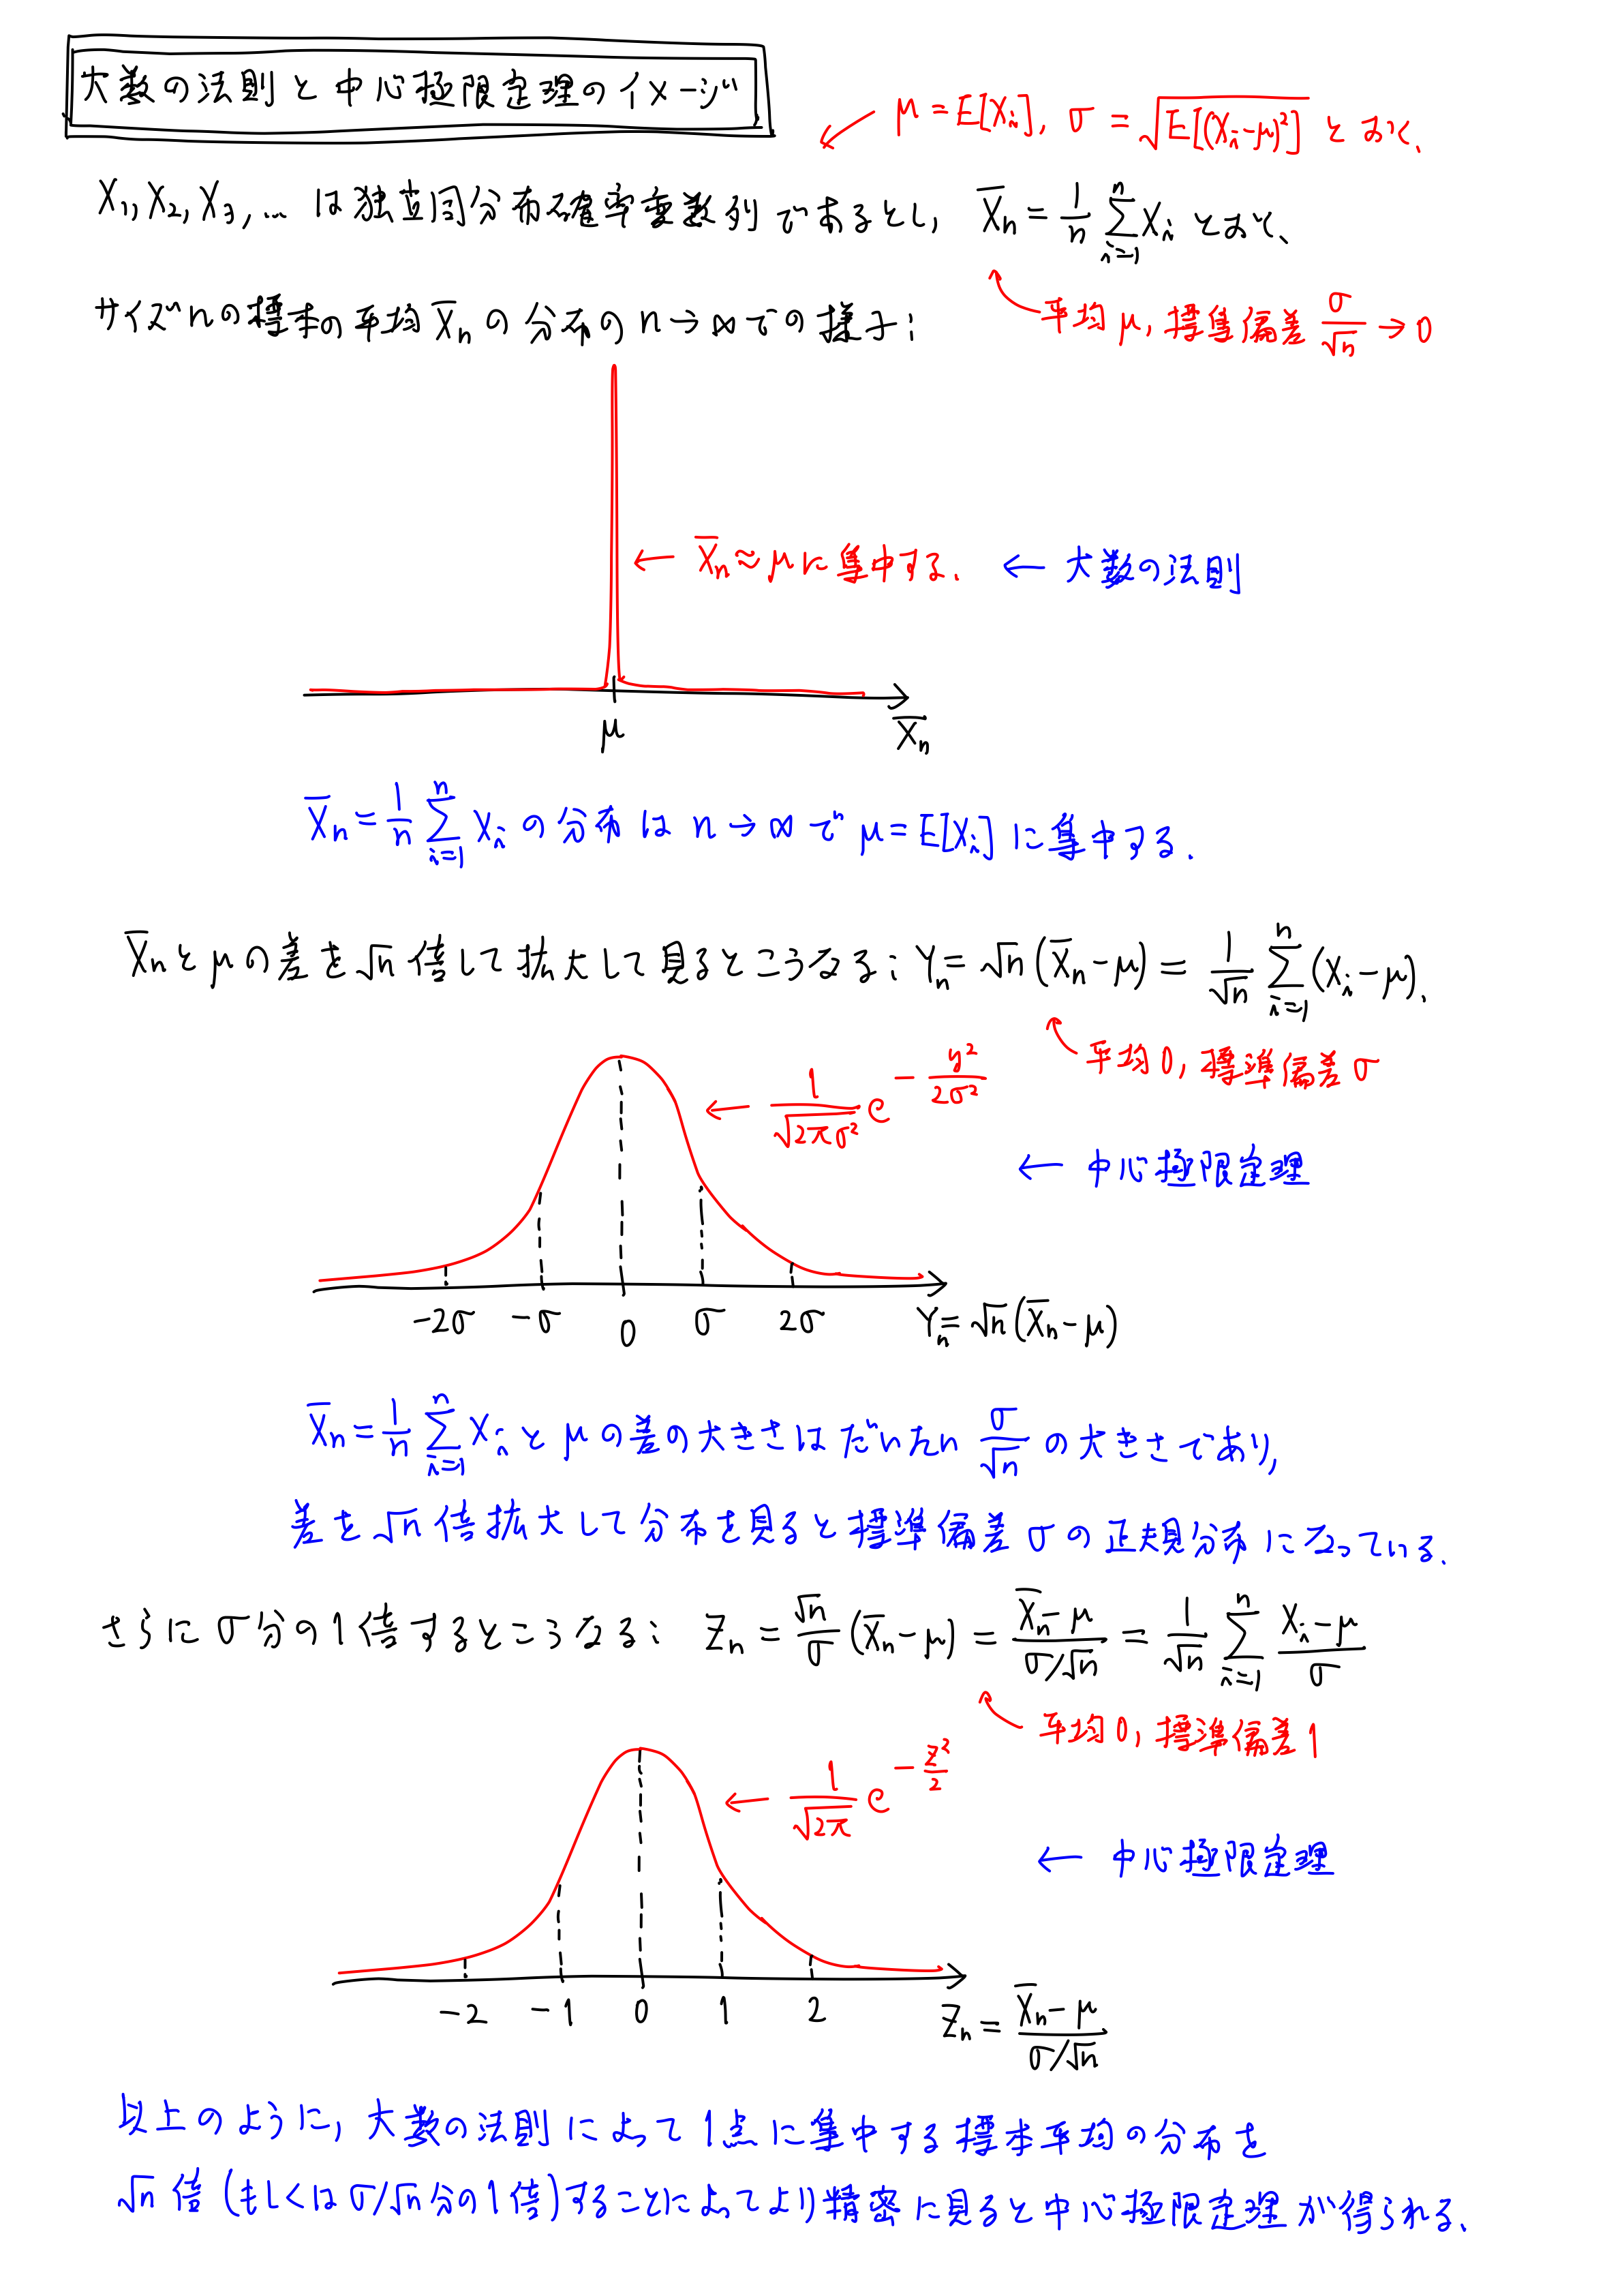

In [1]:
ENV["LINES"], ENV["COLUMNS"] = 100, 100
using BenchmarkTools
using Distributions
using Printf
using QuadGK
using Random
Random.seed!(4649373)
using Roots
using SpecialFunctions
using StaticArrays
using StatsBase
using StatsFuns
using StatsPlots
default(fmt = :png, titlefontsize = 10, size = (400, 250))
using SymPy

In [2]:
# Override the Base.show definition of SymPy.jl:
# https://github.com/JuliaPy/SymPy.jl/blob/29c5bfd1d10ac53014fa7fef468bc8deccadc2fc/src/types.jl#L87-L105

@eval SymPy function Base.show(io::IO, ::MIME"text/latex", x::SymbolicObject)
    print(io, as_markdown("\\displaystyle " * sympy.latex(x, mode="plain", fold_short_frac=false)))
end
@eval SymPy function Base.show(io::IO, ::MIME"text/latex", x::AbstractArray{Sym})
    function toeqnarray(x::Vector{Sym})
        a = join(["\\displaystyle " * sympy.latex(x[i]) for i in 1:length(x)], "\\\\")
        """\\left[ \\begin{array}{r}$a\\end{array} \\right]"""
    end
    function toeqnarray(x::AbstractArray{Sym,2})
        sz = size(x)
        a = join([join("\\displaystyle " .* map(sympy.latex, x[i,:]), "&") for i in 1:sz[1]], "\\\\")
        "\\left[ \\begin{array}{" * repeat("r",sz[2]) * "}" * a * "\\end{array}\\right]"
    end
    print(io, as_markdown(toeqnarray(x)))
end

In [3]:
x ⪅ y = x < y || x ≈ y

mypdf(dist, x) = pdf(dist, x)
mypdf(dist::DiscreteUnivariateDistribution, x) = pdf(dist, round(x))

distname(dist::Distribution) = replace(string(dist), r"{.*}" => "")
myskewness(dist) = skewness(dist)
mykurtosis(dist) = kurtosis(dist)
function standardized_moment(dist::ContinuousUnivariateDistribution, m)
    μ, σ = mean(dist), std(dist)
    quadgk(x -> (x - μ)^m * pdf(dist, x), extrema(dist)...)[1] / σ^m
end
myskewness(dist::MixtureModel{Univariate, Continuous}) = standardized_moment(dist, 3)
mykurtosis(dist::MixtureModel{Univariate, Continuous}) = standardized_moment(dist, 4) - 3

mykurtosis (generic function with 2 methods)

## 大数の法則

__大数の法則__ (law of large numbers, LLN)とは, 大雑把に言えば, 独立同分布確率変数列 $X_1,X_2,\ldots$ の最初の $n$ 個の標本平均を $\bar{X}_n = (1/n)\sum_{i=1}^n X_i$ と書くと, $\bar{X}_n$ が $X_i$ 達の共通の期待値に収束するという結果のことである.  (より正確に言うと, その「収束」の仕方に強弱があって, それぞれについて「大数の強法則」と呼んだり, 「大数の弱法則」と呼んだりする.  しかし, 応用上, 多くの場合にその違いに神経質になる必要はない.)

以下では大数の法則について解説する.

### Markovの不等式

確率変数 $X$ と任意の $a>0$ について

$$
P(|X|\ge a) \le \frac{1}{a}E[|X|].
$$

__証明:__ 函数 $1_{|x|\ge a}(x)$ を

$$
1_{|x|\ge a}(x) = \begin{cases}
1 & (|x|\ge a) \\
0 & (|x| <  a) \\
\end{cases}
$$

とおくと, $|x|\ge a$ と $1\le |x|/a$ は同値なので常に $1_{|x|\ge a}(x) \le |x|/a$ となる. ゆえに期待値を取る操作の単調性と線形性より,

$$
P(|X|\ge a) = E[1_{|x|\ge a}(x)] \le E\left[\frac{|X|}{a}\right] = \frac{1}{a}E[|X|].
$$

__証明終__

__注意:__ Markovの不等式, Chebyshevの不等式, Jensenの不等式, Gibbsの情報不等式などについては「Bernoulli試行と関連確率分布」のノートですでに説明していたのであった.

### Chebyshevの不等式

Markovの不等式で $X$ を $(X-\mu)^2$ ($\mu=E[X]$) で置き換えた場合をChebyshevの不等式と呼ぶ.

確率変数 $X$ について $E[|X|]<\infty$ が成立しているならば, $X$ の期待値 $\mu = E[X]$ がうまく定義されている. そのとき, $X$ の分散を $\sigma^2 = E[(X-\mu)^2]$ と書くと, 任意の $\eps>0$ について

$$
P(|X-\mu|\ge \eps) \le \frac{\sigma^2}{\eps^2}.
$$

__証明:__ 前節のMarkovの不等式を $X$, $a$ がそれぞれ $(X-\mu)^2$, $\eps^2$ の場合に適用すると,

$$
P(|X-\mu|\ge \eps) = P((X-\mu)^2 \ge \eps^2) \le \frac{1}{\eps^2}E[(X-\mu)^2] = \frac{\sigma^2}{\eps^2}.
$$

__証明終__

### 大数の弱法則

$X_1,X_2,X_3,\ldots$ は独立同分布確率変数の列であるとし, 共通の期待値 $\mu=E[X_i]$ が定義されており, 共通の分散 $\sigma^2 = E[(X_i-\mu)^2]$ は有限の値であると仮定する.  このとき, 最初の $n$ 個の標本平均を

$$
\bar{X}_n = \frac{1}{n}\sum_{i=1}^n X_i
$$

と書くと, 任意の $\eps > 0$ について,

$$
\lim_{n\to\infty} P(|\bar{X}_n - \mu|\ge\eps) = 0.
$$

__注意:__ この結論は

$$
\lim_{n\to\infty} P(|\bar{X}_n - \mu| < \eps) = 1
$$

と同値なので標本平均 $\bar{X}_n$ の分布が $n\to\infty$ で $\mu$ の近く(任意に小さな $\eps>0$ に関する $\mu$ から距離 $\eps$ 未満の範囲)に集中して行くことを意味している.  このとき $\bar{X}_n$ は $\mu$ に __確率収束__ するというが, 標本平均 $\bar{X}_n$ の分布が $n\to\infty$ で $\mu$ の近くに集中して行くことを理解していれば, 確率変数の収束に関する細かいことは応用上あまり神経質になる必要はない.  だから, このノートでは「大数の弱法則」と「大数の強法則」の区別に神経質にならずに単に「大数の法則」ということが多い.

__証明:__ 標本平均 $\bar{X}_n$ の期待値と分散は以下のようになるのであった:

$$
\begin{aligned}
E[\bar{X}_n] &= \frac{1}{n}\sum_{i=1}^n E[X_i]
= \frac{1}{n}\sum_{i=1}^n \mu = \mu,
\\
(\bar{X}_n - \mu)^2 &=
\left(\frac{1}{n}\sum_{i=1}^n(X_i-\mu)\right)^2 =
\frac{1}{n^2}\sum_{i,j=1}^n (X_i-\mu)(X_j-\mu),
\\
\op{var}(\bar{X}_n) &=
E[(\bar{X}_n - \mu)^2] =
\frac{1}{n^2}\sum_{i,j=1}^n E[(X_i-\mu)(X_j-\mu)] =
\frac{1}{n^2}\sum_{i,j=1}^n \delta_{ij}\sigma^2 =
\frac{\sigma^2}{n}.
\end{aligned}
$$

最後から2つめの等号で $X_i$ 達が独立(特に無相関)であることを使った.  ゆえに, Chebyshevの不等式を $X$, $\mu$, $\sigma^2$ がそれぞれ $\bar{X}_n$, $\mu$, $\op{var}(\bar{X}_n)=\sigma^2/n$ の場合に適用すると, 任意の $\eps>0$ について, 

$$
P(|\bar{X}_n - \mu|\ge\eps) \le \frac{\sigma^2/n}{\eps^2} \to 0 \quad \text{as $n\to\infty$}.
$$

__証明終__

### 不偏分散の $n\to\infty$ での挙動

$X_1,X_2,X_3,\ldots$ は独立同分布確率変数の列であるとし, その最初の $n$ 個の標本平均と不偏分散をそれぞれ次のように書くことにする:

$$
\bar{X}_n = \frac{1}{n}\sum_{i=1}^n X_i, \quad
S_n^2 = \frac{1}{n-1}\sum_{i=1}^n (X_i - \bar{X}_n)^2.
$$

以下では $\mu=E[X_i]$ がうまく定義されており, $\sigma^2=E[(X_i-\mu)^2]<\infty$, $E[|X_i-\mu|^3]<\infty$, $E[(X_i-\mu)^4]<\infty$ となっていると仮定する.

「標本分布について」のノートで以下を示していたのであった.  $X_i$ 達が共通に従う分布の歪度(わいど, skewness)と尖度(せんど, kurtosis)をそれぞれ

$$
\bk_3 = E\left[\left(\frac{X_i-\mu}{\sigma}\right)^3\right], \quad
\bk_4 = E\left[\left(\frac{X_i-\mu}{\sigma}\right)^4\right] - 3
$$

と書くと, 

$$
\begin{aligned}
&
E[\bar{X}_n] = \mu, \quad
E[S_n^2] = \sigma^2,
\\ &
\op{var}(\bar{X}_n) = \frac{\sigma^2}{n}, \quad
\op{cov}(\bar{X}_n, S_n^2) = \sigma^3\frac{\bk_3}{n}, \quad
\op{var}(S_n^2) = \sigma^4\left(\frac{\bk_4}{n} + \frac{2}{n-1}\right).
\end{aligned}
$$

ゆえに, Chebyshevの不等式を $X$, $\mu$, $\sigma^2$ がそれぞれ $S_n^2$, $E[S_n^2] = \sigma^2$, $\op{var}(S_n^2) = \sigma^4(\bk_4/n+2/(n-1))$ の場合に適用すると, 任意の $\eps>0$ について, 

$$
P(|S_n^2 - \sigma^2| \ge \eps) \le
\frac{\sigma^4}{\eps^2}\left(\frac{\bk_4}{n} + \frac{2}{n-1}\right) \to 0
\quad\text{as $n\to\infty$}.
$$

このように, 不偏分散 $S_n^2$ についても大数の弱法則が成立しており, $S_n^2$ の分布は $n\to\infty$ で $\sigma^2$ の近くに集中して行く.

### 大数の強法則

この節の内容は無理して読まなくてもよい.  定義していない用語や記号法が登場する. 大数の強法則の取り扱いには測度論的確率論が必要になるが, この一連のノート群では測度論を避ける方針なので, 大数の強法則について詳しく説明することはできない.  以下で紹介する議論は「よく見る議論」のコピー＆ペーストに過ぎない.  必要な用語の定義もされていないし, 内容的にも雑である.  しかし, 大数の強法則の証明の雰囲気を伝えたいと思ったので, このような説明をしてみることにした.

確率空間とは $\sigma$-algebra (= $\sigma$-field) $\mathscr{F}$ と確率測度 $\mathscr{F}\ni A\mapsto P(A)\in\R_{\ge 0}$ が与えられた集合 $\Omega$ のことである. 以下では確率空間 $\Omega$ 上の点を $\omega$ と表す. $\Omega$ 上の実数値可測函数を確率変数と呼ぶ. 

#### Borel-Cantelliの補題

確率空間 $\Omega$ において次が成立する:

$$
\sum_{k=1}^\infty P(A_k) < \infty \implies
P\left(\bigcap_{n=1}^\infty \bigcup_{k\ge n} A_k\right) = 0.
$$

__証明:__ $\sum_{k=1}^\infty P(A_k) < \infty$ と仮定し,  $B_n = \bigcup_{k\ge n} A_k$ とおく.  $P\left(\bigcap_{n=1}^\infty B_n\right) = 0$ を示せばよい.  $\sum_{k=1}^\infty P(A_k) < \infty$ より, 

$$
P(B_b) \le \sum_{k\ge n} P(A_k) =
\sum_{k=1}^\infty P(A_k) - \sum_{k=1}^{n-1} P(A_k) \to 0
\text{as $n\to\infty$}.
$$

$B_1\supset B_2\supset B_3\supset\cdots$ なので

$$
P\left(\bigcap_{n=1}^\infty B_n\right) = \lim_{n\to\infty} P(B_n) = 0.
$$

__証明終__

#### 4次以下のモーメントの存在を仮定した場合の大数の強法則

$X_1,X_2,X_3,\ldots$ は独立同分布確率変数の列であるとし, その最初の $n$ 個の標本平均を $\bar{X}_n = (1/n)\sum_{i=1}^n X_i$ と書くことにする. さらに, $\mu=E[X_i]$ がうまく定義されており, $\sigma^2=E[(X_i-\mu)^2]<\infty$, $\mu_4 = E[(X_i-\mu)^4]<\infty$ となっていると仮定する. このとき,

$$
P\left(\lim_{n\to\infty}\bar{X}_n = \mu\right) = 1.
$$

__注意:__ これは標本平均が $\mu$ に確率 $1$ で収束することを意味している.

__証明:__ 大数の弱法則の場合と同様に補事象の側の同値な主張を示す. すなわち, 確率変数(可測函数)としての標本平均 $\bar{X}_n$ が $n\to\infty$ で $\mu$ に収束しない確率が $0$ であることを示そう.

確率変数(可測函数)としての最初の $n$ 個の標本平均 $\bar{X}_n$ の $\omega$ における値 $\bar{X}_n(\omega)$ が $n\to\infty$ で $\mu$ に収束しないという条件は以下のように書き換えられる.  すなわち,

$$
A_k(\eps) = \{\,\omega\mid |\bar{X}_k(\omega)-\mu|\ge\eps\,\}
$$

とおくと, 以下が成立している:

$\bar{X}_n(\omega)$ は $n\to\infty$ で $\mu$ に収束しない.<br>
$\iff$ ある $\eps>0$ が存在して, 任意の $n$ について, ある $k\ge n$ で $|\bar{X}_k(\omega)-\mu|\ge\eps$ を満たすものが存在する.<br>
$\iff$ ある $\eps>0$ が存在して, $\displaystyle
\omega \in \bigcap_{n=1}^\infty \bigcup_{k\ge n} A_k(\eps)
$.<br>
$\iff$ $\displaystyle
\omega \in \bigcup_{L=1}^\infty \bigcap_{n=1}^\infty \bigcup_{k\ge n} A_k(1/L)
$.

この条件の書き換えによって, 任意の $\eps>0$ について,

$$
\sum_{k=1}^\infty P(A_k(\eps)) = \sum_{k=1}^\infty P(|\bar{X}_k-\mu|\ge\eps) < \infty
$$

を示せれば, Borel-Cantelliの補題より $P\left(\bigcap_{n=1}^\infty \bigcup_{k\ge n} A_k(\eps)\right) = 0$ が得られ, それより

$$
P\left(\bigcup_{L=1}^\infty \bigcap_{n=1}^\infty \bigcup_{k\ge n} A_k(1/L)\right)
\le \sum_{L=1}^\infty P\left(\bigcap_{n=1}^\infty \bigcup_{k\ge n} A_k(1/L)\right)
=0
$$

が導かれ, $\bar{X}_n$ が $n\to\infty$ で $\mu$ に収束しない確率が $0$ であることが示されることがわかる.

必要ならば $X_i$ を $X_i-\mu$ で置き換えることによって, $\mu=0$ と仮定しても一般性が失われないので, $\mu=0$ と仮定する. 

$\eps>0$ を任意に取る.  このとき, 

$$
P(|\bar{X}_n|\ge\eps) =
P\left(\frac{\bar{X}_n^4}{\eps^4}\ge 1\right) =
E\left[1_{\bar{X}_n^4/\eps^4\ge 1}(\bar{X}_n)\right] \le
E\left[\frac{\bar{X}_n^4}{\eps^4}\right] =
\frac{1}{\eps^4}E\left[\bar{X}_n^4\right],
$$

でかつ

$$
\begin{aligned}
E\left[\bar{X}_n^4\right] &=
\frac{1}{n^4}\sum_{i,j,k,l=1}^n E[X_i X_j X_k X_l] =
\frac{1}{n^4}\biggl(
n E[X_1^4] + \underbrace{\binom{4}{2}\binom{n}{2}}_{=3n(n-1)} E[X_1^2]^2
\biggr)
\\ &=
\frac{\mu_4}{n^3} + \frac{3(n-1)\sigma^4}{n^3} \le
\frac{\mu_4 + 3\sigma^4}{n^2}
\end{aligned}
$$

なので,

$$
\sum_{k=1}^\infty P(A_k) =
\sum_{n=1}^\infty P(|\bar{X}_n|\ge\eps) \le
\frac{\mu_4 + 3\sigma^4}{\eps^4}\sum_{n=1}^\infty \frac{1}{n^2} < \infty.
$$

これで示すべきことが示された.

__証明終__

__注意:__ 要するに, Borel-Cantelliの補題から, 任意の $\eps > 0$ について,

$$
\sum_{n=1}^\infty P(|\bar{X}_n-\mu|\ge\eps) < \infty
$$

を示せれば, 大数の強法則が証明される.  大数の弱法則の証明で示したことは

$$
P(|\bar{X}_n-\mu|\ge\eps) \le \frac{\sigma^2}{\eps^2}\frac{1}{n}
$$

に過ぎず, $\sum_{n=1}1/n = \infty$ と調和級数の和は無限大になるので, 大数の弱法則の証明の議論だけで大数の強法則を示すことはできない.

__注意:__ $\zeta(s) = \sum_{n=1}^\infty 1/n^s$ はRiemannのゼータ函数と呼ばれ, $s=1$ では調和級数になって無限大に発散するが, $s > 1$ ならば有限の値に収束する.  $\zeta(2) = \sum_{n=1}^\infty 1/n^2$ を求めよという問題は __Basel問題__ (バーゼル問題)と呼ばれ, 18世紀の超大数学者のEulerが解いた.  答えは $\pi^2/6$ になる.  その逆数の $6/\pi^2 = 0.6079271{\cdots}$ は2つの整数の互いに素になる(最大公約数が $1$ になる)「確率」に等しい.

In [4]:
6/π^2

0.6079271018540267

In [5]:
"""
エラトステネスの篩(sieve of Eratosthenes)によって,
以下の条件を満たす長さ `N` のビットベクトル `IsPrime` を作成する:

>`IsPrime = make_isprime(N)` のとき `IsPrime[p]` は `p` が素数なら真になり, 素数でないなら偽になる.
"""
function make_isprime(N)
    IsPrime = trues(N)
    # 1は素数ではない
    IsPrime[1] = false
    @inbounds for p in 2:isqrt(N)
        if IsPrime[p]
            for i in 2p:p:N
                # 素数の非自明な倍数は素数ではない
                IsPrime[i] = false
            end
        end
    end
    IsPrime
end

"""
N以下の2つの正の整数が互いに素になる確率を篩法で求める.
"""
function prob_mutually_prime(N)
    IsPrime = make_isprime(N)
    C = trues(N, N)
    @inbounds for p in 2:N
        if IsPrime[p]
            for i in p:p:N
                for j in i:p:N
                    # 共通の素因数 p を持つ i, j を除外する
                    C[i, j] = false
                    C[j, i] = false
                end
            end
        end
    end
    c = count(C)
    c/N^2
end

prob_mutually_prime

In [6]:
@doc make_isprime

エラトステネスの篩(sieve of Eratosthenes)によって, 以下の条件を満たす長さ `N` のビットベクトル `IsPrime` を作成する:

> `IsPrime = make_isprime(N)` のとき `IsPrime[p]` は `p` が素数なら真になり, 素数でないなら偽になる.



In [7]:
IsPrime = make_isprime(100)
primes = findall(IsPrime) 
@show primes;

primes = [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97]


In [8]:
# 1億以下の素数のリストの作成も一瞬で終わる.
@time make_isprime(10^8);

  0.536192 seconds (3 allocations: 11.921 MiB, 3.92% gc time)


In [9]:
@time prob_mutually_prime(10000)

  0.078297 seconds (5 allocations: 11.922 MiB)


0.60794971

In [10]:
@time prob_mutually_prime(100000)

 13.054831 seconds (5 allocations: 1.164 GiB, 0.14% gc time)


0.6079301507

10万以下の2つの正の整数が互いに素な確率を求めてみたが, 確かに理論値の $1/\zeta(2) = 0.6079271{\cdots}$ に近い値になっている.

### 大数の強法則に関する文献

大数の強法則は前節で採用した条件よりもずっと弱い条件のもとで成立している. そのようなことに興味がある人達は以下の文献を参照せよ.

* N. Etemadi, An elementary proof of the strong law of large numbers, Zeitschrift für Wahrscheinlichkeitstheorie und Verwandte Gebiete volume 55, pages 119–122 (1981) \[[Springer](https://link.springer.com/article/10.1007/BF01013465#citeas)\] \[[pdf](https://people.math.umass.edu/~yaoli/ptrl.pdf)\]

* N. Lizia, A simple proof of the strong law of large numbers with rates, Bulletin of the Australian Mathematical Society, Volume 97, Issue 3, June 2018, pp. 513 - 517. \[[doi](https://doi.org/10.1017/S0004972718000059)\] \[[pdf](http://www.im.ufrj.br/nuno/SLLN.pdf)\]

$X_1,X_2,X_3,\ldots$ が同分布な確率変数の列であるとし, 共通の期待値 $\mu=E[X_i]$ のwell-definedness ($E[|X_i|]<\infty$)を仮定する.

前者の文献では, $X_1,X_2,X_3,\ldots$ に関する(独立性よりもずっと弱い)対ごとの独立性の仮定のもとで大数の強法則を証明している(分散の有限性も仮定していない).

後者の文献では, $X_1,X_2,X_3,\ldots$ の独立性と分散の有限性($\sigma^2 = \op{var}(X_i)<\infty$)のもとで, 収束の速さが分かるような大数の強法則の証明を与えている.

### 問題: 大数の法則に関する誤解

当たりとはずれが毎回独立ににどちらも $50\%$ の確率で出るルーレットを回し続ける状況を考える.  当たりが出たら, 胴元から1万円もらい, はずれが出たら1万円支払うというルールになっているとする. この賭け事に参加しているある人がこう言った:

>はずれの方が沢山出続けてたくさん負けてしまった! でも, 確率論の大数の法則によって, これからは当たりの方が出易くなって, 負けは帳消しになるだろう.

この発言が間違っていることについて説明せよ.

__解答例:__ 大数の法則は, はずれが沢山出た後に当たりの方が出易くなったり, 当たりが沢山出たあとにはずれが出易くなることによって成立するのではない. 

例えば, いきなり $10$ 回続けてはずれが出てしまったとする. 

その後の90回分では, 当たりとはずれが両方とも45回出たとする. そのとき, トータルでの当たりが出たの割合は $55/100=55\%$ で $50\%$ に近付く.

はずれ10回後の990回分でも, 当たりとはずれがどちらも同じ回数の495回出たとする.  そのとき, トータルでの当たりが出た割合は　$505/1000 = 50.5\%$ でさらに $50\%$ に近付く.

そのとき, 最初に10回外れを引いて10万円負けていたその人は, 大数の法則が予想する結果に近付いているにもかかわらず, 1000回の勝負で最初に負けた10万円を取り戻せていない.

大数の法則は単に公平なギャンブルを続けると勝ちの回数の割合と負けの回数の割合が $50\%$ に近付くことを主張しているだけで, 沢山負けた後に勝ち易くなったり, その逆が起こることを何も主張していない.

__解答終__

他にも沢山の正しい解答例を作れると思います.

### 大数の法則のデモンストレーション

In [11]:
function plot_law_of_large_numbers(dist, N;
        randfunc = rand, μ = mean(dist), kwargs...)
    X = randfunc(dist, N)
    X̄ = cumsum(X) ./ (1:N)
    plot(1:N, X̄; label="")
    hline!([μ]; label="")
    plot!(; kwargs...)
end

function plot_law_of_large_numbers_6x3(dist, N;
        randfunc = rand, μ = mean(dist), seed = 4649363, title = "", kwargs...)
    Random.seed!(seed)
    PP = []
    for _ in 1:18
        P = plot_law_of_large_numbers(dist, N; randfunc, μ, kwargs...)
        push!(PP, P)
    end
    P0 = plot(; title,
        framestyle=nothing, showaxis=false, ticks=false, margin=0Plots.mm)
    layout = @layout [a{0.005h}; grid(6, 3)]
    plot(P0, PP...; size=(800, 800), layout,
        titlefontsize=12, guidefontsize=8, tickfontsize=6)
end

plot_law_of_large_numbers_6x3 (generic function with 1 method)

#### Bernoulli試行の大数の法則

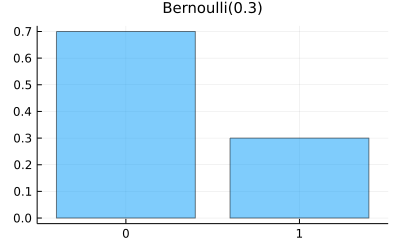

In [12]:
bar(x -> pdf(Bernoulli(0.3), x), 0:1; alpha=0.5, label="",
    title="Bernoulli(0.3)", xtick=0:1, ytick=0:0.1:1)

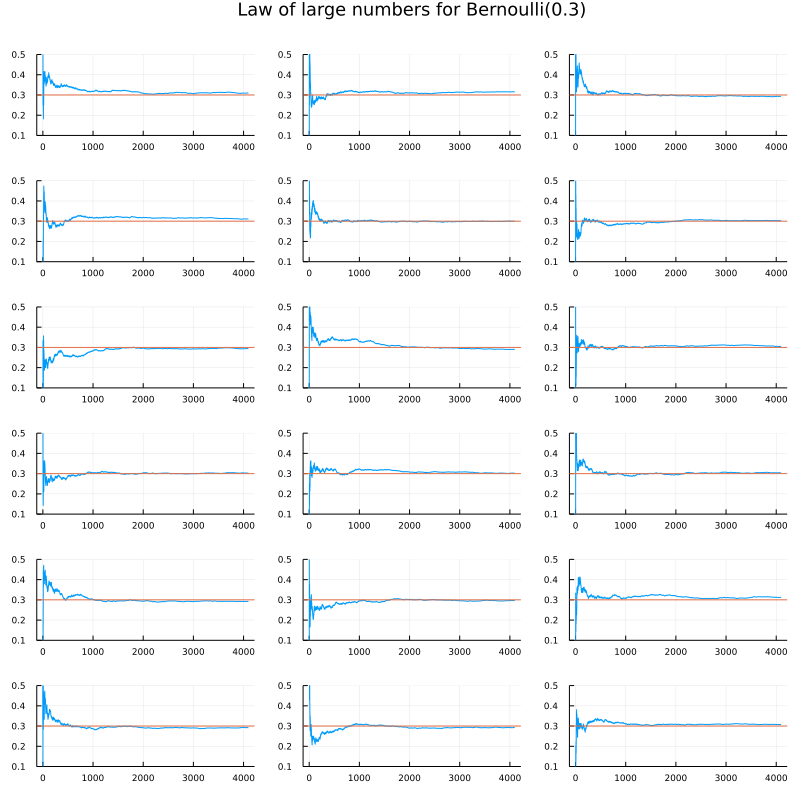

In [13]:
plot_law_of_large_numbers_6x3(Bernoulli(0.3), 2^12;
    title="Law of large numbers for Bernoulli(0.3)", ylim=(0.1, 0.5))

#### 正規分布のサンプルの大数の法則

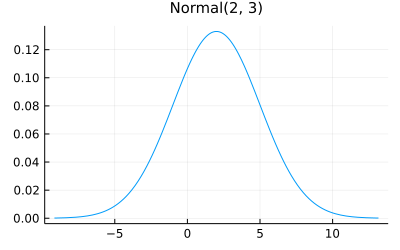

In [14]:
plot(Normal(2, 3); label="", title="Normal(2, 3)")

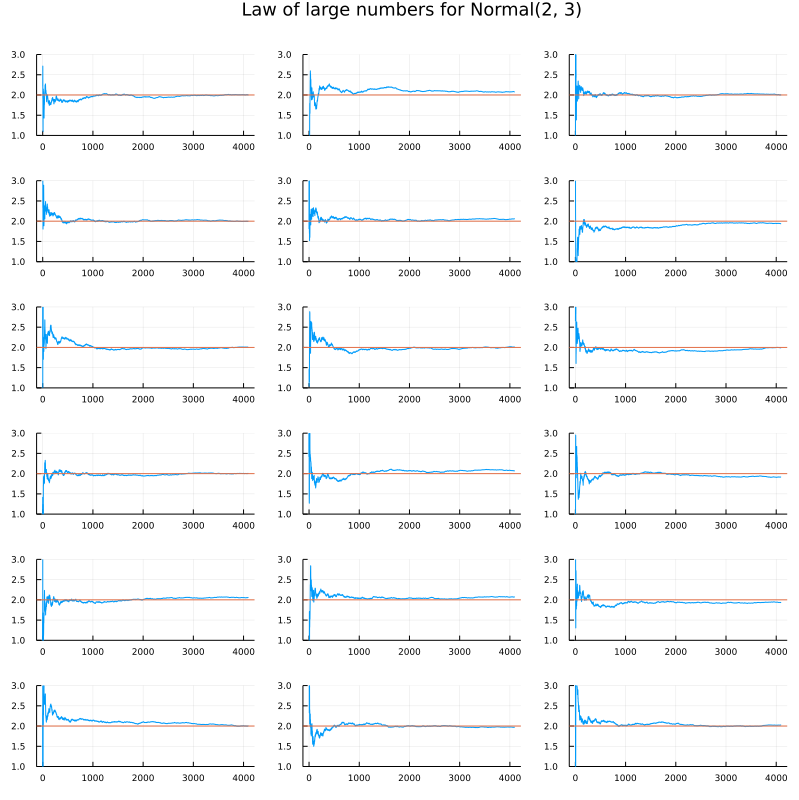

In [15]:
plot_law_of_large_numbers_6x3(Normal(2, 3), 2^12;
    title="Law of large numbers for Normal(2, 3)", ylim=(1, 3))

#### ガンマ分布のサンプルの大数の法則

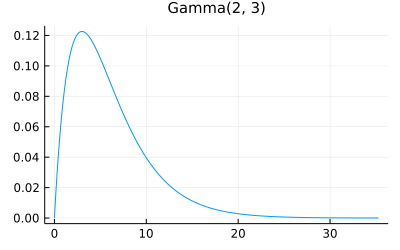

In [16]:
plot(Gamma(2, 3); label="", title="Gamma(2, 3)")

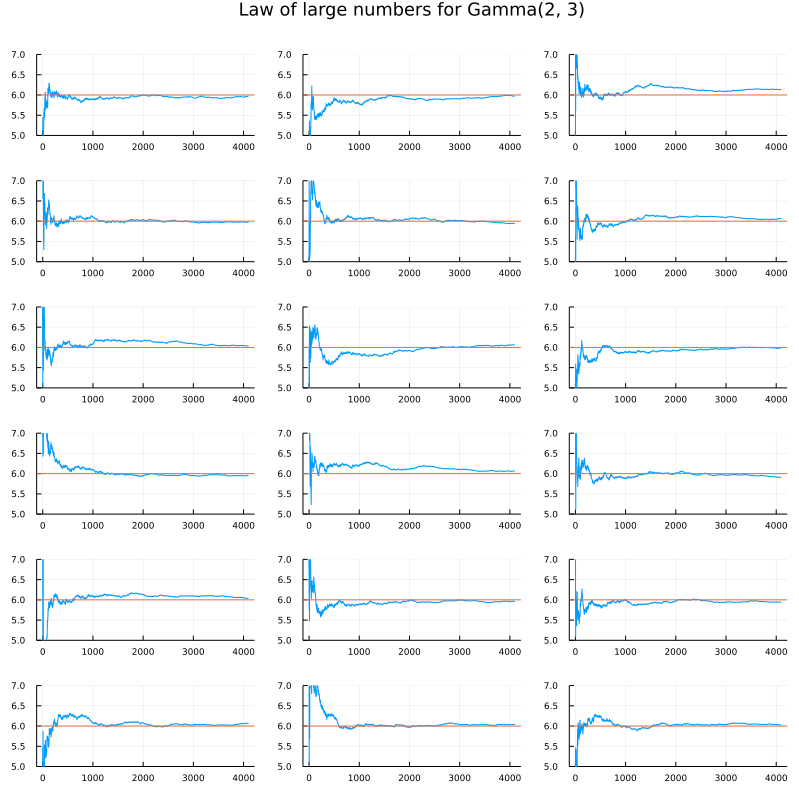

In [17]:
plot_law_of_large_numbers_6x3(Gamma(2, 3), 2^12;
    title="Law of large numbers for Gamma(2, 3)", ylim=(5, 7))

#### 大数の法則が成立しない場合: Cauchy分布

確率密度函数が

$$
p(x) = \frac{1}{\pi}\frac{1}{1 + x^2}
$$

のCauchy分布 $\op{Cauchy}()$ に従う確率変数 $X$ については

$$
E[|X|] = \frac{2}{\pi}\int_0^\infty \frac{x}{1+x^2}\,dx = \infty
$$

なので, 期待値 $E[X]$ が定義されない.  Cauchy分布の場合には大数の法則は成立しない.

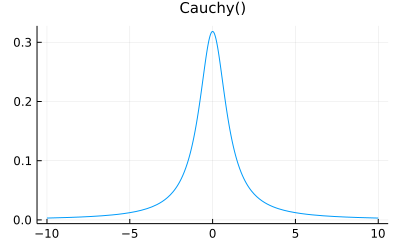

In [18]:
plot(Cauchy(), -10, 10; label="", title="Cauchy()")

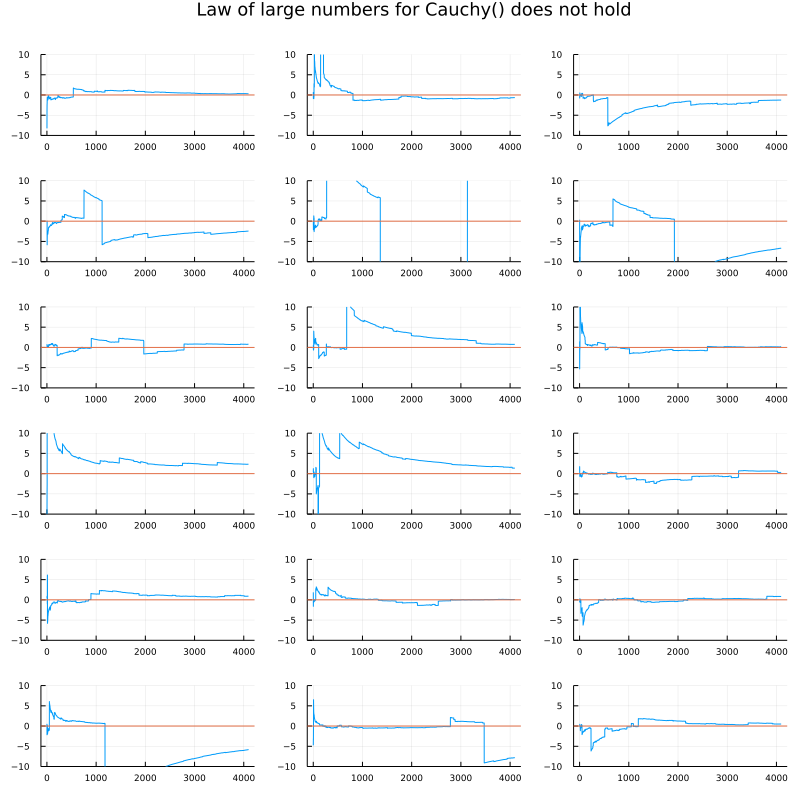

In [19]:
plot_law_of_large_numbers_6x3(Cauchy(), 2^12; μ = 0.0,
    title="Law of large numbers for Cauchy() does not hold", ylim=(-10, 10))

__注意:__ $X_1,X_2,\ldots,X_n$ がCauchy分布のサイズ $n$ の標本であるとき, その標本平均 $\bar{X}$ もCauchy分布に従うことを示せる. そのことはCauchy分布の特性函数が

$$
\varphi(t) = E[e^{itX}] = e^{-|t|} \quad (X\sim\op{Cauchy}())
$$

となることを認めれば容易に確認できる(この公式のよくある証明では複素解析を使う). 実際, これを認めると,

$$
E[e^{it\bar{X}}] = \phi\left(\frac{t}{n}\right)^n =
(e^{-|t/n|})^n = e^{-|t|} = \varphi(t) = E[e^{itX}].
$$

$\bar{X}$ と $X\sim\op{Cauchy}()$ の特性函数が等しいので $\bar{X}\sim\op{Cauchy}()$.

In [20]:
function plot_cauchy(n; dist=Cauchy(), L=10^6, xlim=(-10, 10), kwargs...)
    X̄ = Vector{Float64}(undef, L)
    tmp = [Vector{Float64}(undef, n) for _ in 1:Threads.nthreads()]
    Threads.@threads for i in 1:L
        X = rand!(dist, tmp[Threads.threadid()])
        X̄[i] = mean(X)
    end
    a, b = quantile.(Ref(X̄), (0.001, 0.999))
    stephist(X̄; bin=a:0.1:b, norm=true, label="X̄")
    plot!(Cauchy(), xlim...; label="Cauchy()", ls=:dash)
    title!("Sample means of n = $n size samples of Cauchy()")
    plot!(; xlim, kwargs...)
end

plot_cauchy (generic function with 1 method)

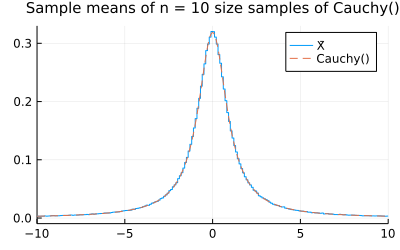

In [21]:
plot_cauchy(10)

#### 大数の法則が成立しない場合: Pólyaの壺

$\alpha, \beta > 0$ であると仮定する.  パラメータ $(\alpha,\beta)$ から $1$ の出る確率が $\alpha/(\alpha+\beta)$ と, $0$ が出る確率が $\beta/(\alpha+\beta)$ と決まっているとする.  そして, $1$ が出たら, パラメータが $(\alpha,\beta)\mapsto(\alpha+1,\beta)$ と更新され, $0$ が出たら, パラメータが　$(\alpha,\beta)\mapsto(\alpha,\beta+1)$ と更新されると仮定する.  このようにして $1,0$ の列 $X_1,X_2,X_3,\ldots$ がランダムに得られる試行を __Pólyaの壺__ の試行と呼ぶことにする.

Pólyaの壺では $1$ が出るとその次に $1$ が出る確率は上昇し, $0$ が出るとその次に $0$ が出る確率は上昇する.  __Pólyaの壺__ の試行では独立性の仮定が満たされていない.  実際, __Pólyaの壺__ の試行の $n$ 回分の出目が $(x_1,\ldots,x_n)\in\{1,0\}^n$ になる確率は, $x_1,\ldots,x_n$ の中に $1$ がちょうど $k$ 個含まれているとき,

$$
P(x_1,\ldots,x_n|\alpha,\beta) =
\binom{n}{k}
\frac
{\alpha(\alpha+1)\cdots(\alpha+k-1)\;
\beta(\beta+1)\cdots(\beta+n-k-1)}
{(\alpha+\beta)(\alpha+\beta+1)\cdots(\alpha+\beta+n-1)}
$$

と書ける.  (「確率分布達の解釈」のノートに詳しい説明がある.)

しかし, $n-1$ 回目までの出目に条件を付けないとき, $n$ 番目に $1$ が出る確率は $n$ によらず $\alpha/(\alpha+\beta)$ のまま一定であることを示せる.  すなわち, 各 $X_n$ が従う確率分布は $n$ によらずにどれも成功確率 $\alpha/(\alpha+\beta)$ のBernoulli分布になる.  __Pólyaの壺__ の試行では同分布の仮定は満たされている.

__Pólyaの壺__ の試行で得られる $1,0$ の列 $X_1,X_2,X_3,\ldots$ については大数の法則は成立しない.  その $n$ 番目までの標本平均 $\bar{X}_n$ はベータ二項分布 $\op{BetaBinomial}(n,\alpha,\beta)$ に従い, $n$ が大きなときに $\bar{X}_n$ はベータ分布 $\op{Beta}(\alpha,\beta)$ に近似的に従う.  そうなることは, 

$$
P(x_1,\ldots,x_n|\alpha,\beta) =
\int_0^1 \prod_{i=1}^n\left(p^{x_i}(1-p)^{1-x_i}\right)
\frac{p^{\alpha-1}(1-p)^{\beta-1}}{B(\alpha,\beta)}\,dp
$$

なので, __Pólyaの壺__ の試行が成功確率 $p$ がベータ分布 $\op{Beta}(\alpha,\beta)$ に従ってランダムに決まっているようなBernoulli試行であることから分かる.

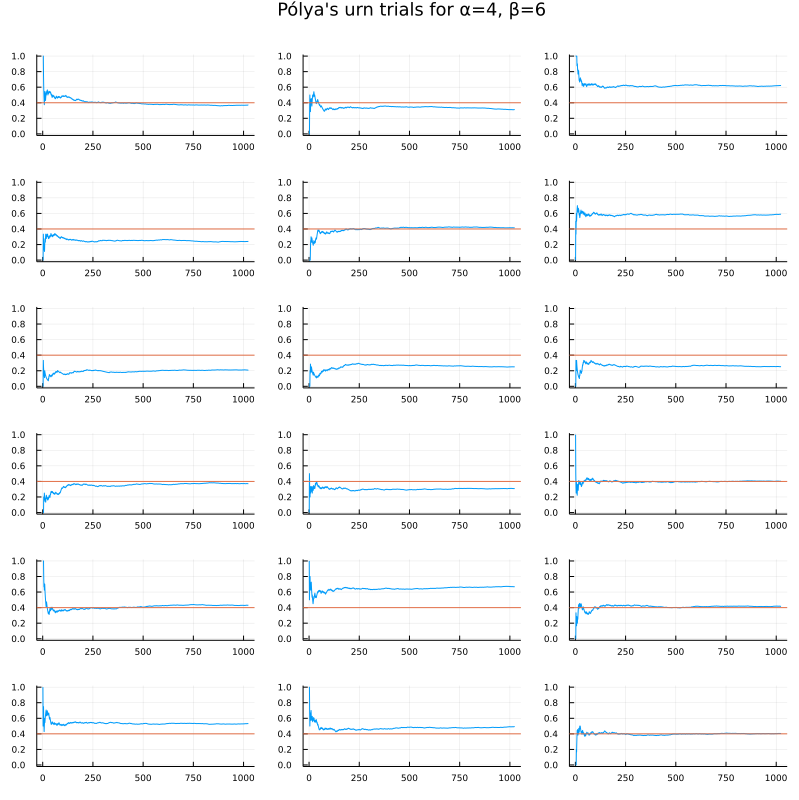

In [22]:
# pがベータ分布に従ってランダムに決まっているベルヌーイ試行

plot_law_of_large_numbers_6x3(Beta(4, 6), 2^10;
    randfunc = (dist, n) -> (p = rand(dist); rand(Bernoulli(p), n)),
    title="Pólya's urn trials for α=4, β=6", ylim=(-0.02, 1.02), ytick=0:0.2:1)

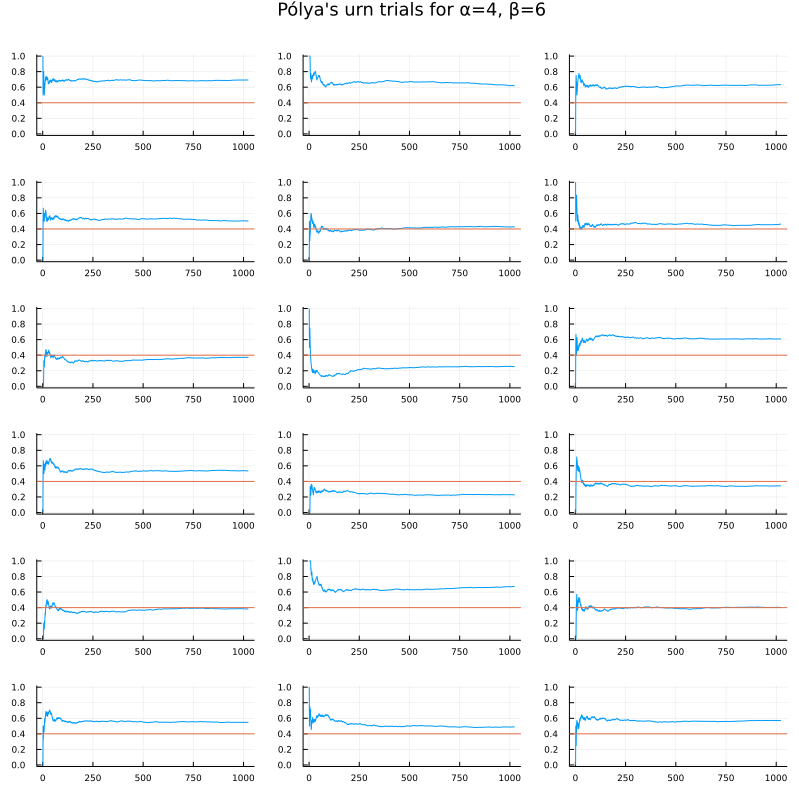

In [23]:
# 富むものがさらに富み, 貧しいものがさらに貧しくなるポリアの壺試行

function rand_polyaurn(beta::Beta, n)
    α, β = Distributions.params(beta)
    X = Vector{Int8}(undef, n)
    for i in 1:n
        x = rand(Bernoulli(α/(α+β)))
        X[i] = x
        if x == 1
            α += 1
        else
            β += 1
        end
    end
    X
end

plot_law_of_large_numbers_6x3(Beta(4, 6), 2^10;
    randfunc = rand_polyaurn, title="Pólya's urn trials for α=4, β=6",
    ylim=(-0.02, 1.02), ytick=0:0.2:1)

In [24]:
function plot_polyaurn(n, α, β, bin=:auto; L=10^6, kwargs...)
    X̄ = Vector{Float64}(undef, L)
    tmp = [Vector{Int}(undef, n) for _ in 1:Threads.nthreads()]
    Threads.@threads for i in 1:L
        p = rand(Beta(α, β))
        X = rand!(Bernoulli(p), tmp[Threads.threadid()])
        X̄[i] = mean(X)
    end
    stephist(X̄; norm=true, bin, label="X̄")
    plot!(Beta(α, β), 0, 1; label="Beta(α, β)", ls=:dash)
    title!("Pólya's urn for n=$n, α=$α, β=$β")
    plot!(; xtick=0:0.1:1, kwargs...)
end

plot_polyaurn (generic function with 2 methods)

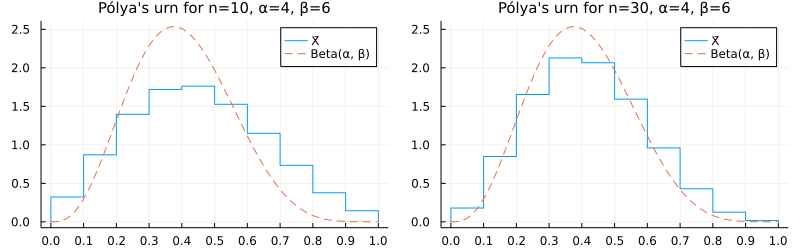

In [25]:
plot(plot_polyaurn.((10, 30), 4, 6, (0:0.1:1, 0:0.1:1))...; size=(800, 250))

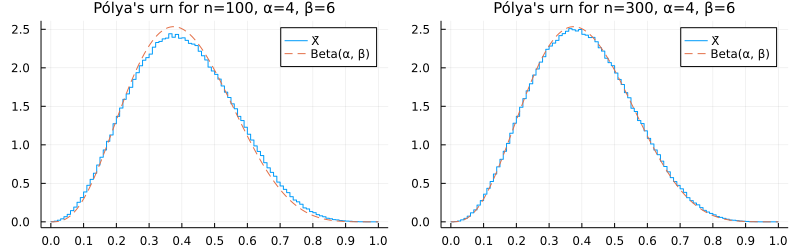

In [26]:
plot(plot_polyaurn.((100, 300), 4, 6, (0:0.01:1, 0:0.01:1))...; size=(800, 250))

### $E[X_i]=0$ のときの和 $X_1+X_2+\cdots+X_n$ の分布の様子 (中心極限定理に向けて)

共通の期待値 $0$ と分散 $\sigma^2$ を持つ独立同分布確率変数列 $X_1, X_2, X_3, \ldots$ を沢山生成して, $X_1+X_2+\cdots+X_n$ の動きを同時プロットしてみよう.  $X_1+X_2+\cdots+X_n$ の動きを __ランダムウォーク__ (乱歩)と呼ぶことにする.

ランダムウォークは大雑把に $\pm 2\sigma\sqrt{n}$ の範囲に分布する.

この事実を多くのグラフで視覚的に確認した人達は中心極限定理に限りなく近付いている.

$X_1+X_2+\cdots+X_n$ がちらばる速さは $\sqrt{n}$ に比例するので, $(X_1+X_2+\cdots+X_n)/\sqrt{n}$ は一定の範囲に分布すると考えられる.  その一定の範囲内の分布が正規分布で近似されるというのが中心極限定理の内容である.

In [27]:
function plot_randomwalk!(dist, N;
        randfunc = rand, μ = mean(dist), c=1, lw=0.3, alpha=0.3, kwargs...)
    X = randfunc(dist - μ, N)
    X̄ = cumsum(X)
    plot!(1:N, X̄; label="", c, lw, alpha, kwargs...)
end

function plot_randomwalks(dist, N;
        randfunc = rand, μ = mean(dist), σ = std(dist),
        seed = 4649363,
        title = "Random walks for $(distname(dist)) − $μ",
        kwargs...)
    Random.seed!(seed)
    P = plot(; title, )
    for _ in 1:100
        P = plot_randomwalk!(dist, N; randfunc, μ, kwargs...)
    end
    x = range(0, N, 1000)
    y = @. 2σ * √x
    plot!(x,  y; c=2, label="±2σ√n")
    plot!(x, -y; c=2, label="")
    plot!(; xlabel="n", ylabel="X₁+X₂+⋯+Xₙ")
    plot!(; legend=:topleft, size=(500, 320))
end

plot_randomwalks (generic function with 1 method)

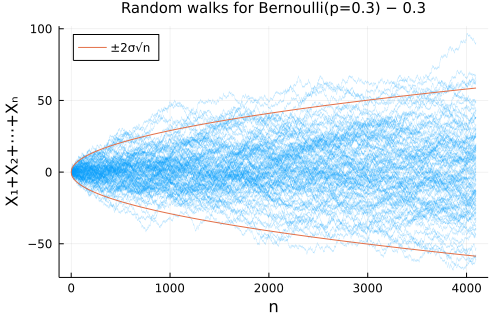

In [28]:
plot_randomwalks(Bernoulli(0.3), 2^12)

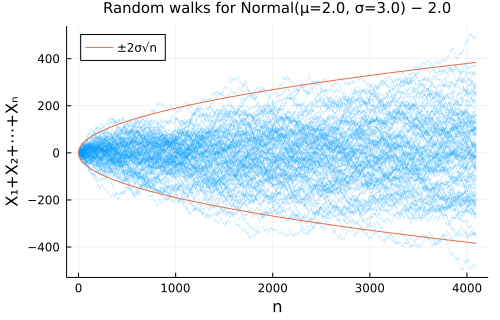

In [29]:
plot_randomwalks(Normal(2, 3), 2^12)

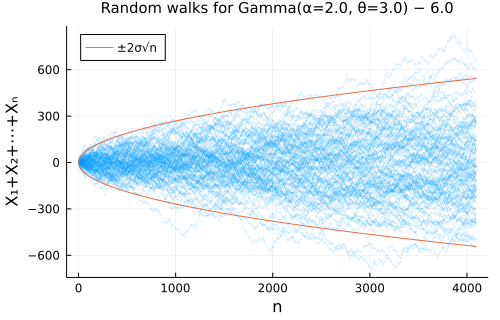

In [30]:
plot_randomwalks(Gamma(2, 3), 2^12)

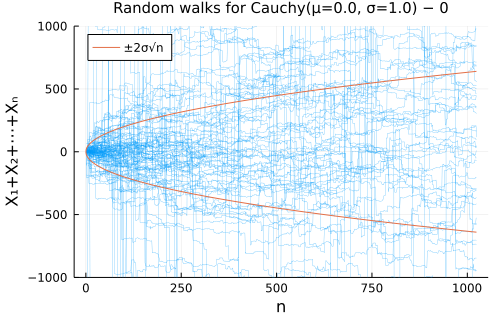

In [31]:
plot_randomwalks(Cauchy(), 2^10; μ=0, σ=10, ylim=(-1000, 1000), alpha=0.7)

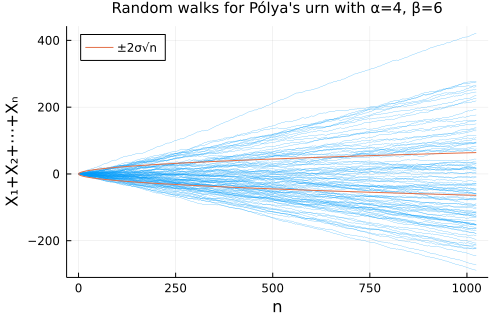

In [32]:
plot_randomwalks(Beta(4, 6), 2^10;
    μ = 0, σ = 1,
    randfunc = (dist, n) -> (p = rand(dist); rand(Bernoulli(p) - mean(dist), n)),
    title="Random walks for Pólya's urn with α=4, β=6", alpha=0.7)

## 二項分布の中心極限定理

### 二項分布の中心極限定理の内容

二項分布 $\op{Binomial}(n, p)$ が正規分布 $\op{Normal}\left(np, \sqrt{np(1-p)}\right)$ で近似されることを __二項分布の中心極限定理__ と呼ぶことにしよう.  (ただしその近似の精度をよくするためには $np$ と $n(1-p)$ をある程度以上に大きくする必要がある.  「大きくする」と言っても粗い近似でよければ3から5程度でも十分な場合がある.)

二項分布の中心極限定理には以下のような様々な言い換えがある.  $0<p<1$ と仮定し, $n$ は十分に大きいと仮定する. そのとき, 

(1) $K\sim\op{Binomial}(n, p)$ ならば $K$ の分布は平均 $np$, 分散 $np(1-p)$ の正規分布で近似される.

(2) $K\sim\op{Binomial}(n, p)$ ならば $\dfrac{K}{n}$ の分布は平均 $p$, 分散 $p(1-p)/n$ の正規分布で近似される.

(3) $K\sim\op{Binomial}(n, p)$ ならば $\dfrac{K-np}{\sqrt{n}}$ の分布は平均 $0$, 分散 $p(1-p)$ の正規分布で近似される.

(4) $K\sim\op{Binomial}(n, p)$ ならば $\dfrac{K-np}{\sqrt{np(1-p)}}$ の分布は標準正規分布で近似される.

例えば, (1)の結果は, $K\sim\op{Binomial}(n, p)$, $X\sim \op{Normal}\left(np, \sqrt{np(1-p)}\right)$ のとき,

$$
P(K \le a) \approx P(X \le a)
$$

という近似を使えることを意味する. (2),(3),(4)についても同様のことが言える.  これを使うと, 二項分布における確率を対応する正規分布の確率で置き換えて近似計算できる.  二項分布に限らず, 正規分布で近似できる確率分布であれば, どのような分布であっても確率の計算を正規分布という一種類の分布における確率で近似的に計算できる.

例えば, (4)の結果は, $K\sim\op{Binomial}(n, p)$ のとき,

$$
E\left[f\left(\dfrac{K-np}{\sqrt{np(1-p)}}\right)\right] =
\sum_{k=0}^n f\left(\dfrac{k-np}{\sqrt{np(1-p)}}\right)
\binom{n}{k}p^k(1-p)^{n-k}
$$

が, $n\to\infty$ で, $Z\sim\op{Normal}(0,1)$ に関する

$$
E[f(Z)] = \int_{-\infty}^\infty f(z)\frac{e^{-z^2/2}}{\sqrt{2\pi}}\,dz.
$$

に収束することと同じことだと考えてよい. (3)についても同様のことが言える.

### 二項分布の中心極限定理のプロット

以下は, 試行回数 $n$, 成功確率 $p$ の二項分布(期待値と分散はそれぞれ $np$, $np(1-p)$ になる)の確率質量函数と平均 $np$, 分散 $np(1-p)$ を持つ正規分布の確率密度函数の同時プロットである.  それらを見れば, 証明しなくても, 二項分布の中心極限定理が成立していることは明らかだろう.  (証明する前にコンピュータでグラフを確認するべき!)

__注意:__ 以下のグラフを見れば, 二項分布の正規分布近似の精度を高めるためには, $p$ が小さいほど $n$ を大きくする必要があることがわかる. ($p$ が $1$ に近い場合にも $n$ を大きくする必要がある.)

In [33]:
function plot_binomial_clt(n, p, s = 1; c = 4.5)
    μ, σ = n*p, √(n*p*(1-p))
    xlim = (μ-c*σ, μ+c*σ)
    plot(x -> mypdf(Binomial(n, p), x), xlim...; label="Binomial(n,p)")
    plot!(Normal(μ, σ), xlim...; label="Normal(μ,σ)", lw=2)
    # plot!(x -> mypdf(Poisson(μ), x), xlim...; label="Poisson(μ)", ls=:dash)
    title!("n = $n, p = $p, μ=np, σ²=np(1-p)")
    plot!(; xtick=0:s:n)
end

plot_binomial_clt (generic function with 2 methods)

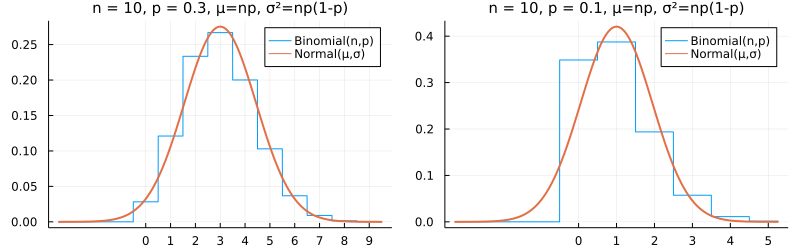

In [34]:
plot(plot_binomial_clt(10, 0.3), plot_binomial_clt(10, 0.1); size=(800, 250))

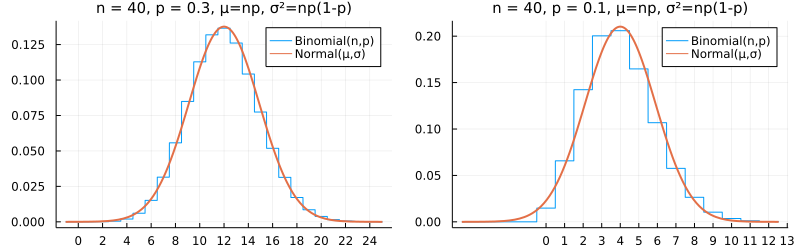

In [35]:
plot(plot_binomial_clt(40, 0.3, 2), plot_binomial_clt(40, 0.1); size=(800, 250))

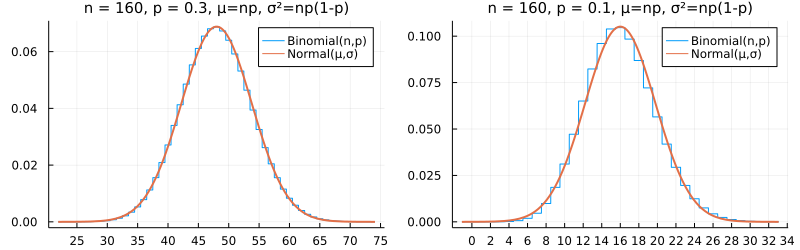

In [36]:
plot(plot_binomial_clt(160, 0.3, 5), plot_binomial_clt(160, 0.1, 2); size=(800, 250))

### 必修重要問題: 二項分布の正規分布近似を使った確率の近似計算1

確率変数 $K$ は二項分布 $\op{Binomial}(100, 1/2)$ に従っていると仮定する.

(1) 確率 $P(K \le 40)$ を小数点以下第5桁まで求めよ.

(2) 二項分布 $\op{Binomial}(100, 1/2)$ と同じ期待値と分散を持つ正規分布に従う確率変数 $X$ について確率 $P(X \le 40)$ を小数点以下第5桁まで求めよ.

__解答例:__

(1) $K\sim \op{Binomial}(100, 1/2)$ のとき,

$$
P(K \le 40) \approx 0.02844
$$

(2) 一般に $\op{Binomial}(n, p)$ の平均と分散はそれぞれ $\mu=np$, $\sigma^2=np(1-p)$ なので, $n=100$, $p=1/2$ の場合は $\mu=50$, $\sigma^2=25$, $\sigma=5$ なので, $X\sim \op{Normal}(50, 5)$ で

$$
P(X \le 40) \approx 0.02275
$$

__解答終__

#### WolframAlphaによる計算1

(1) [cdf(BinomialDistribution(n, p), 40) where n=100, p=0.5](https://www.wolframalpha.com/input?i=cdf%28BinomialDistribution%28n%2C+p%29%2C+40%29+where+n%3D100%2C+p%3D0.5)

(2) [cdf(NormalDistribution(50, 5), 40)](https://www.wolframalpha.com/input?i=cdf%28NormalDistribution%2850%2C+5%29%2C+40%29)

#### Julia言語による計算1

In [37]:
n, p = 100, 1/2

(100, 0.5)

In [38]:
# (1)
p_B = cdf(Binomial(n, p), 40)

0.028443966820490434

In [39]:
# (2)
q_N = cdf(Normal(n*p, √(n*p*(1-p))), 40)

0.022750131948179205

#### Julia言語による視覚化1

In [40]:
n, p = 100, 1/2

(100, 0.5)

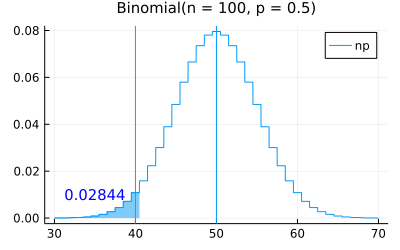

In [41]:
# (1)
plot(x -> mypdf(Binomial(n, p), x), 30, 70; label="", c=1)
vline!([n*p]; label="np", c=1)
plot!(x -> mypdf(Binomial(n, p), x), 30, 40.5;
    label="", fillrange=0, c=1, alpha=0.5)
prob = cdf(Binomial(n, p), 40)
annotate!(35, 0.01, text(@sprintf("%0.5f", prob), 10, :blue))
vline!([40]; label="", c=:gray)
title!("Binomial(n = $n, p = $p)")

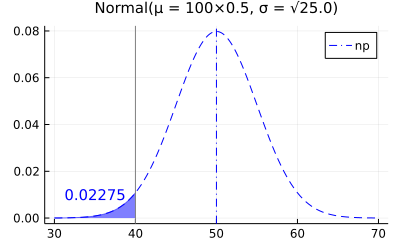

In [42]:
# (2)
plot(x -> mypdf(Normal(n*p, √(n*p*(1-p))), x), 30, 70; label="", c=:blue, ls=:dash)
vline!([n*p]; label="np", ls=:dashdot, c=:blue)
plot!(x -> mypdf(Normal(n*p, √(n*p*(1-p))), x), 30, 40;
    label="", fillrange=0, c=:blue, alpha=0.5)
prob = cdf(Normal(n*p, √(n*p*(1-p))), 40)
annotate!(35, 0.01, text(@sprintf("%0.5f", prob), 10, :blue))
vline!([40]; label="", c=:gray)
title!("Normal(μ = $n×$p, σ = √$(n*p*(1-p)))")

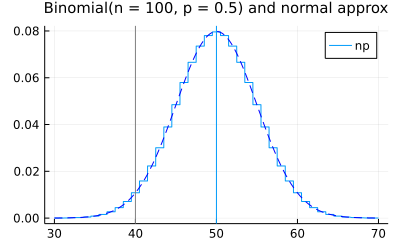

In [43]:
# (1) and (2)
plot(x -> mypdf(Binomial(n, p), x), 30, 70; label="", c=1)
vline!([n*p]; label="np", c=1)

plot!(x -> mypdf(Normal(n*p, √(n*p*(1-p))), x), 30, 70;
    label="", c=:blue, ls=:dash)
#vline!([n*p]; label="np", ls=:dashdot, c=:blue)

vline!([40]; label="", c=:gray)
title!("Binomial(n = $n, p = $p) and normal approx")

### 必修重要問題: 二項分布の正規分布近似を使った確率の近似計算2

$0 < p < 1$ であると仮定し, $K$ は二項分布 $\op{Binomial}(100, p)$ に従う確率変数であるとする.

(1) $P(K \le 40) = 0.025$ を満たす $p$ の値 $p_U$ を小数点以下第4桁まで求めよ.

(2) $P(K \ge 40) = 0.025$ を満たす $p$ の値 $p_L$ を小数点以下第4桁まで求めよ.

$\hat{p}=40/100=0.4$ とおく. $X$ は $K$ と同じ平均 $np$ と推定された分散 $n\hat{p}(1-\hat{p})$ を持つ正規分布に従う確率変数であるとする.

(3) $P(X \le 40) = 0.025$ を満たす $p$ の値 $q_U$ を小数点以下第4桁まで求めよ.

(4) $P(X \ge 40) = 0.025$ を満たす $p$ の値 $q_L$ を小数点以下第4桁まで求めよ.

__注意:__ これらによって計算される区間 $[p_L, p_U]$ と $[q_L, q_U]$ はデータ「$100$ 回中 $40$ 回当たり」というデータから得られる $p$ の $95\%$ 信頼区間と呼ばれる.  前者は __Clopper-Pearsonの信頼区間__ と, 後者は __Waldの信頼区間__ と呼ばれる.

__解答例:__ $n=100$, $k=40$ とおく.

累積分布函数を $\op{cdf}$ と書き, その逆函数の分位点函数を $\op{quantile}$ と書くことにする: $X$ が分布 $D$ に従う確率変数であるとき,  

$$
\begin{aligned}
&
\op{cdf}(D, x) = P(X \le x),
\\ &
\op{quantile}(D, a) = (\text{the value $x$ satisfying $P(X \le x) = a$}).
\end{aligned}
$$

以上の記号法のもとで,

$$
\begin{aligned}
F_K(p) &= P(K\le k) = \op{cdf}(\op{Binomial}(n,p), k)
\\ &=
1 - \op{cdf}(\op{Beta}(k+1, n-k), p),
\\
G_K(p) &= P(K\ge k) = 1 - \op{cdf}(\op{Binomial}(n,p), k-1)
\\ &= \op{cdf}(\op{Beta}(k, n-k+1), p)
\end{aligned}
$$

について,

$$
\begin{aligned}
F_K^{-1}(\alpha/2) &= \op{quantile}(\op{Beta}(k+1, n-k), 1 - \alpha/2),
\\
G_K^{-1}(\alpha/2) &= \op{quantile}(\op{Beta}(k, n-k+1), \alpha/2).
\end{aligned}
$$

これらを $n=100$, $k=40$, $\alpha=0.05$ に適用すると,

(1) $p_U \approx 0.5028$

(2) $p_L \approx 0.3033$

$X\sim\op{Normal}(np, \sigma)$ のとき,

$$
\begin{aligned}
F_X(p) &= P(X\le k) = \op{cdf}(\op{Normal}(np, \sigma), k)
\\ &=
\op{cdf}(\op{Normal}(0,1), (k-np)/\sigma),
\\
G_X(p) &= P(X\ge k) = 1 - \op{cdf}(\op{Normal}(np, \sigma), k)
\\ &=
1 - \op{cdf}(\op{Normal}(0,1), (k-np)/\sigma)
\end{aligned}
$$

について

$$
z_{\alpha/2} = \op{quantile}(\op{Normal}(0,1), 1 - \alpha/2)
$$

とおくと, $\op{quantile}(\op{Normal}(0,1), \alpha/2) = -z_{\alpha/2}$ なので,

$$
\begin{aligned}
&
F_X^{-1}(\alpha/2) =
\frac{k - \sigma\op{quantile}(\op{Normal}(0,1), \alpha/2)}{n} =
\frac{k + z_{\alpha/2}\sigma}{n}
\\ &
G_X^{-1}(1-\alpha/2) =
\frac{k - \sigma\op{quantile}(\op{Normal}(0,1), 1-\alpha/2)}{n} =
\frac{k - z_{\alpha/2}\sigma}{n}
\end{aligned}
$$

$n=100$, $\hat{p}=0.4$ のとき,

$$
\hat{\sigma}^2 = n\hat{p}(1-\hat{p}) = 24.
$$

であり, 上の公式を $n=100$, $k=40$, $\sigma=\hat\sigma$ の場合に使うと,

(3) $q_U \approx 0.4960$

(4) $q_L \approx 0.3040$


__解答終__

#### WolframAlphaによる計算

(1) [quantile(BetaDistribution(41, 60), 0.975)](https://www.wolframalpha.com/input?i=quantile%28BetaDistribution%2841%2C+60%29%2C+0.975%29)

(1)検算 [cdf(BinomialDistribution(100, 0.502791), 40)](https://www.wolframalpha.com/input?i=cdf%28BinomialDistribution%28100%2C+0.502791%29%2C+40%29)

(2) [quantile(BetaDistribution(40, 61), 0.025)](https://www.wolframalpha.com/input?i=quantile%28BetaDistribution%2840%2C+61%29%2C+0.025%29)

(2)検算 [1 - cdf(BinomialDistribution(100, 0.303295), 39)](https://www.wolframalpha.com/input?i=1+-+cdf%28BinomialDistribution%28100%2C+0.303295%29%2C+39%29)

[quantile(NormalDistribution(0, 1), 0.975)](https://www.wolframalpha.com/input?i=quantile%28NormalDistribution%280%2C+1%29%2C+0.975%29) → 1.95996

(3) [(40 + 1.95996 * sqrt(24))/100](https://www.wolframalpha.com/input?i=%2840+%2B+1.95996+*+sqrt%2824%29%29%2F100)

(3)検算 [cdf(NormalDistribution(49.60180, sqrt(24)), 40)](https://www.wolframalpha.com/input?i=cdf%28NormalDistribution%2849.60180%2C+sqrt%2824%29%29%2C+40%29)

(4) [(40 - 1.95996 * sqrt(24))/100](https://www.wolframalpha.com/input?i=%2840+-+1.95996+*+sqrt%2824%29%29%2F100)

(4)検算 [1 - cdf(NormalDistribution(30.39820, sqrt(24)), 40)](https://www.wolframalpha.com/input?i=1+-+cdf%28NormalDistribution%2830.39820%2C+sqrt%2824%29%29%2C+40%29)

#### Julia言語による計算2

__記号法:__ `cdf(d, x)` は分布 `d` の累積分布函数で `ccdf(d, x) = 1 - cdf(d, x)`.

`cdf(Binomial(n, p), k) == ccdf(Beta(k+1, n-k), p)` の確認:

In [44]:
n, p = 8, 0.3
[
    [cdf(Binomial(n, p), k) for k in 0:n-1]'
    [ccdf(Beta(k+1, n-k), p) for k in 0:n-1]'
]

2×8 Matrix{Float64}:
 0.057648  0.255298  0.551774  0.805896  0.942032  0.988708  0.99871  0.999934
 0.057648  0.255298  0.551774  0.805896  0.942032  0.988708  0.99871  0.999934

`ccdf(Binomial(n, p), k-1) == cdf(Beta(k, n-k+1), p)` の確認:

In [45]:
n, p = 8, 0.3
[
    [ccdf(Binomial(n, p), k-1) for k in 1:n]'
    [cdf(Beta(k, n-k+1), p) for k in 1:n]'
]

2×8 Matrix{Float64}:
 0.942352  0.744702  0.448226  0.194104  0.0579676  0.0112922  0.00129033  6.561e-5
 0.942352  0.744702  0.448226  0.194104  0.0579676  0.0112922  0.00129033  6.561e-5

In [46]:
n, k = 100, 40
α = 0.05

0.05

In [47]:
# (1)
p_U = quantile(Beta(k+1, n-k), 1 - α/2)

0.5027908495776652

In [48]:
# (1)検算
cdf(Binomial(n, p_U), k)

0.024999999999999988

In [49]:
# (2)
p_L = quantile(Beta(k, n-k+1), α/2)

0.3032947687028774

In [50]:
# (2)検算
ccdf(Binomial(n, p_L), k-1)

0.02499999999999998

In [51]:
p̂ = k/n

0.4

In [52]:
σ̂² = n*p̂*(1-p̂)

24.0

In [53]:
σ̂ = √σ̂²

4.898979485566356

In [54]:
# z_{α/2}
z = quantile(Normal(0, 1), 1 - α/2)

1.9599639845400576

In [55]:
# (3)
q_U = (k + z*σ̂)/n

0.4960182335271064

In [56]:
# (3)検算
cdf(Normal(n*q_U, σ̂), k)

0.024999999999999776

In [57]:
# (4)
q_L = (k - z*σ̂)/n

0.3039817664728936

In [58]:
# (4)検算
1 - cdf(Normal(n*q_L, σ̂), k)

0.0249999999999998

#### Julia言語による視覚化2

In [59]:
n, k, α = 100, 40, 0.05
p̂ = k/n
σ̂² = n*p̂*(1-p̂)
σ̂ = √σ̂²

p_U = quantile(Beta(k+1, n-k), 1 - α/2)
p_L = quantile(Beta(k, n-k+1), α/2)
z = quantile(Normal(0, 1), 1 - α/2)
q_U = (k + z*σ̂)/n
q_L = (k - z*σ̂)/n;

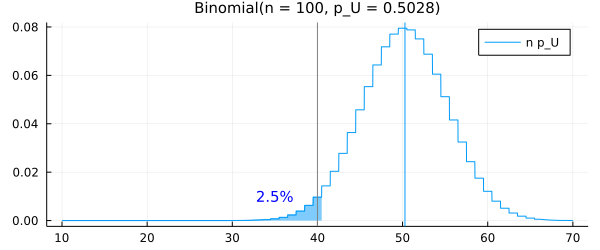

In [60]:
# (1)
plot(x -> mypdf(Binomial(n, p_U), x), 10, 70; label="", c=1)
vline!([n*p_U]; label="n p_U", c=1)
plot!(x -> mypdf(Binomial(n, p_U), x), 10, 40.5;
    label="", fillrange=0, c=1, alpha=0.5)
annotate!(35, 0.01, text("2.5%", 10, :blue))
vline!([40]; label="", c=:gray)
title!("Binomial(n = $n, p_U = $(@sprintf "%.4f" p_U))")
plot!(; size=(600, 250))

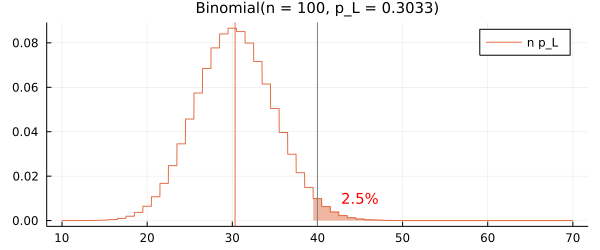

In [61]:
# (2)
plot(x -> mypdf(Binomial(n, p_L), x), 10, 70; label="", c=2)
vline!([n*p_L]; label="n p_L", c=2)
plot!(x -> mypdf(Binomial(n, p_L), x), 39.5, 70;
    label="", fillrange=0, c=2, alpha=0.5)
annotate!(45, 0.01, text("2.5%", 10, :red))
vline!([40]; label="", c=:gray)
title!("Binomial(n = $n, p_L = $(@sprintf "%.4f" p_L))")
plot!(; size=(600, 250))

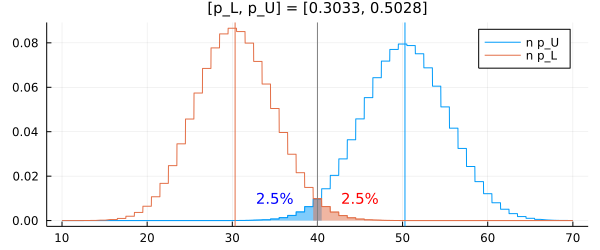

In [62]:
# (1) and (2)
plot(x -> mypdf(Binomial(n, p_U), x), 10, 70; label="", c=1)
vline!([n*p_U]; label="n p_U", c=1)
plot!(x -> mypdf(Binomial(n, p_U), x), 10, 40.5;
    label="", fillrange=0, c=1, alpha=0.5)
annotate!(35, 0.01, text("2.5%", 10, :blue))

plot!(x -> mypdf(Binomial(n, p_L), x), 10, 70; label="", c=2)
vline!([n*p_L]; label="n p_L", c=2)
plot!(x -> mypdf(Binomial(n, p_L), x), 39.5, 70;
    label="", fillrange=0, c=2, alpha=0.5)
annotate!(45, 0.01, text("2.5%", 10, :red))

vline!([40]; label="", c=:gray)
title!("[p_L, p_U] = [$(@sprintf "%.4f" p_L), $(@sprintf "%.4f" p_U)]")
plot!(; size=(600, 250))

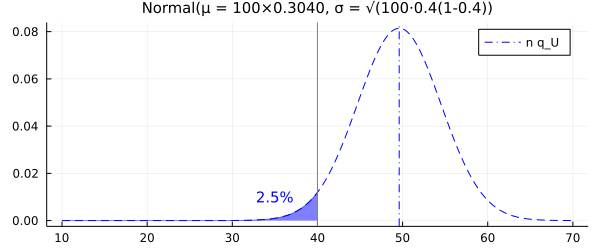

In [63]:
# (3)
plot(x -> mypdf(Normal(n*q_U, σ̂), x), 10, 70; label="", c=:blue, ls=:dash)
vline!([n*q_U]; label="n q_U", ls=:dashdot, c=:blue)
plot!(x -> mypdf(Normal(n*q_U, σ̂), x), 10, 40;
    label="", fillrange=0, c=:blue, alpha=0.5)
annotate!(35, 0.01, text("2.5%", 10, :blue))
vline!([40]; label="", c=:gray)
title!("Normal(μ = $(n)×$(@sprintf "%.4f" q_L), σ = √($n⋅$p̂(1-$p̂))")
plot!(; size=(600, 250))

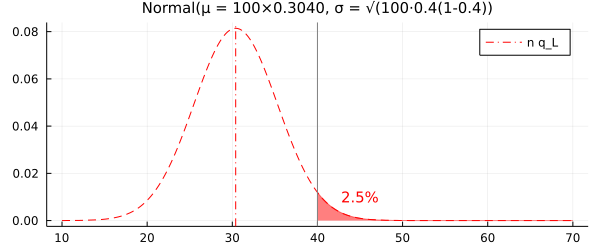

In [64]:
# (4)
plot(x -> mypdf(Normal(n*q_L, σ̂), x), 10, 70; label="", c=:red, ls=:dash)
vline!([n*q_L]; label="n q_L", ls=:dashdot, c=:red)
plot!(x -> mypdf(Normal(n*q_L, σ̂), x), 40, 70;
    label="", fillrange=0, c=:red, alpha=0.5)
annotate!(45, 0.01, text("2.5%", 10, :red))
vline!([40]; label="", c=:gray)
title!("Normal(μ = $(n)×$(@sprintf "%.4f" q_L), σ = √($n⋅$p̂(1-$p̂))")
plot!(; size=(600, 250))

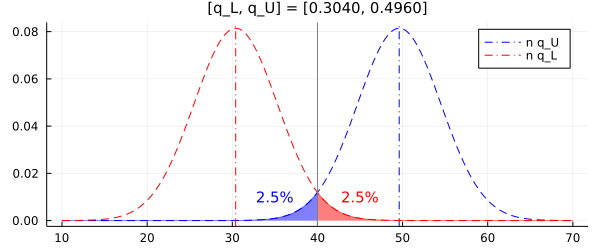

In [65]:
# (3) and (4)
plot(x -> mypdf(Normal(n*q_U, σ̂), x), 10, 70; label="", c=:blue, ls=:dash)
vline!([n*q_U]; label="n q_U", ls=:dashdot, c=:blue)
plot!(x -> mypdf(Normal(n*q_U, σ̂), x), 10, 40;
    label="", fillrange=0, c=:blue, alpha=0.5)
annotate!(35, 0.01, text("2.5%", 10, :blue))

plot!(x -> mypdf(Normal(n*q_L, σ̂), x), 10, 70; label="", c=:red, ls=:dash)
vline!([n*q_L]; label="n q_L", ls=:dashdot, c=:red)
plot!(x -> mypdf(Normal(n*q_L, σ̂), x), 40, 70;
    label="", fillrange=0, c=:red, alpha=0.5)
annotate!(45, 0.01, text("2.5%", 10, :red))

vline!([40]; label="", c=:gray)
title!("[q_L, q_U] = [$(@sprintf "%.4f" q_L), $(@sprintf "%.4f" q_U)]")
plot!(; size=(600, 250))

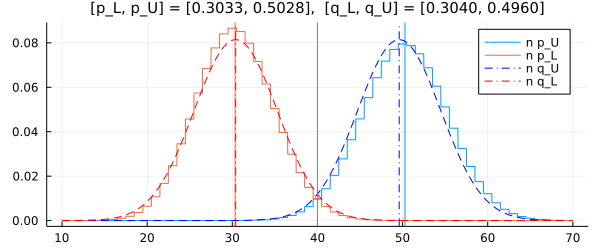

In [66]:
# (1)(2)(3)(4)
plot(x -> mypdf(Binomial(n, p_U), x), 10, 70; label="", c=1)
vline!([n*p_U]; label="n p_U", c=1)

plot!(x -> mypdf(Binomial(n, p_L), x), 10, 70; label="", c=2)
vline!([n*p_L]; label="n p_L", c=2)

plot!(x -> mypdf(Normal(n*q_U, σ̂), x), 10, 70; label="", c=:blue, ls=:dash)
vline!([n*q_U]; label="n q_U", ls=:dashdot, c=:blue)

plot!(x -> mypdf(Normal(n*q_L, σ̂), x), 10, 70; label="", c=:red, ls=:dash)
vline!([n*q_L]; label="n q_L", ls=:dashdot, c=:red)

vline!([40]; label="", c=:gray)
title!("[p_L, p_U] = [$(@sprintf "%.4f" p_L), $(@sprintf "%.4f" p_U)]"*
    ",  [q_L, q_U] = [$(@sprintf "%.4f" q_L), $(@sprintf "%.4f" q_U)]")
plot!(; size=(600, 250))

__次節で使う視覚化のための函数__

In [67]:
function plot_bin_and_normal_cdfs(;
        n=20, p = 0.4, k = 5, k_normal = k, midp = false, 
        xlim = (-0.5, 16), annpos = (2, 0.05), midpannpos = (2, 0.07),
        xtick = 0:20, kwargs...
    )
    P1 = plot(x -> mypdf(Binomial(n, p), x), xlim...; label="", c=1)
    if midp
        plot!(x -> mypdf(Binomial(n, p), x), first(xlim), k;
                label="", fillrange=0, c=1, alpha=0.5)
        prob1 = (cdf(Binomial(n, p), k-1) + cdf(Binomial(n, p), k))/2
        annotate!(midpannpos..., text("mid-P value", 9, :blue))
    else
        plot!(x -> mypdf(Binomial(n, p), x), first(xlim), k+0.5;
                label="", fillrange=0, c=1, alpha=0.5)
        prob1 = cdf(Binomial(n, p), k)
    end
    annotate!(annpos..., text(@sprintf("%0.5f", prob1), 10, :blue))
    vline!([k]; label="x = $k", c=:gray)
    title!("Binomial(n = $n, p = $p)")
    plot!(; xtick)

    P2 = plot(x -> mypdf(Normal(n*p, √(n*p*(1-p))), x), xlim...;
        label="", c=:blue, ls=:dash)
    plot!(x -> mypdf(Normal(n*p, √(n*p*(1-p))), x), first(xlim), k_normal;
        label="", fillrange=0, c=:blue, alpha=0.5)
    prob2 = cdf(Normal(n*p, √(n*p*(1-p))), k_normal)
    annotate!(annpos..., text(@sprintf("%0.5f", prob2), 10, :blue))
    vline!([k_normal]; label="x = $k_normal", c=:gray)
    title!("Normal(μ = $(n*p), σ = √$(n*p*(1-p)))")
    plot!(; xtick)

    plot(P1, P2; size=(800, 250))
end

plot_bin_and_normal_cdfs (generic function with 1 method)

In [68]:
pval_exact(k, n, p0) = cdf(Binomial(n, p0), k)
pval_normal(k, n, p0) = cdf(Normal(n*p0, √(n*p0*(1-p0))), k)
pval_conti(k, n, p0) = cdf(Normal(n*p0, √(n*p0*(1-p0))), k+0.5)
pval_midp(k, n, p0) = (cdf(Binomial(n, p0), k-1) + cdf(Binomial(n, p0), k))/2

function prob_alphaerror(pvalfunc, n, p0, α)
    null = Binomial(n, p0)
    sum(pdf(null, k) for k in support(null)
            if pvalfunc(k, n, p0) ⪅ α; init = 0.0)
end

function _plot_alphaerrors(n, p0, α, tick)
    p_exact  = prob_alphaerror.(pval_exact, n, p0, α)
    p_normal = prob_alphaerror.(pval_normal, n, p0, α)
    p_conti  = prob_alphaerror.(pval_conti, n, p0, α)
    p_midp   = prob_alphaerror.(pval_midp, n, p0, α)
    plot(; legend=:topleft)
    plot!(α, p_exact; label="exact")
    plot!(α, p_normal; label="normal", ls=:dash)
    plot!(α, p_conti; label="conti. corr.", ls=:dot, lw=1.5)
    plot!(α, p_midp; label="mid-P", ls=:dashdot)
    plot!(α, α; label="", c=:black, ls=:dot)
    xtick = ytick = tick
    plot!(; xtick, ytick, xrotation=90)
    a, b = extrema(α)
    xlim = ylim = (a-0.02(b-a), b+0.02(b-a))
    plot!(; xlim, ylim)
    title!("n = $n, p₀ = $p0")
end

function plot_alphaerrors(n, p0)
    α = 
    P1 = _plot_alphaerrors(n, p0, 0:0.001:1, 0:0.1:1)
    P2 = _plot_alphaerrors(n, p0, 0:0.0001:0.1, 0:0.01:1)
    plot(P1, P2; size=(640, 320), layout=(1, 2))
end

plot_alphaerrors (generic function with 1 method)

### 連続性補正とmid-P補正

まずは次の図を見て欲しい.

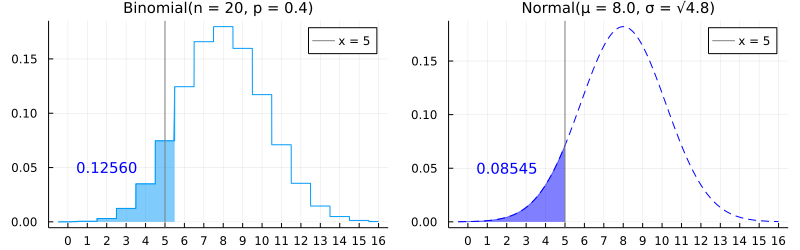

In [69]:
plot_bin_and_normal_cdfs()

この図の左側と右側は, それぞれ, $n=20$, $p=0.4$, $k=5$ に関する

$$
\begin{aligned}
&
\op{cdf}(\op{Binomial}(n, p), k) \approx 0.12560,
\\ &
\op{cdf}(\op{Normal}(np, \sqrt{np(1-p)}), k) \approx 0.08545,
\end{aligned}
$$

の計算を視覚化したものである.  ここで $\op{cdf}$ は累積分布函数 (cumulative distribution function) を意味する.

後者は前者の正規分布近似による計算であるが, 前者の値 $\approx 0.12560$ より小さな値 $\approx 0.08545$ になってしまっている. この近似をより正確にするためにはどうすればよいだろうか?

図を見ればわかるように, 正規分布側で $5$ 以下になる確率ではなく, $5.5$ 以下になる確率を計算すれば良さそうである.  実際に計算してみると次のようになる.

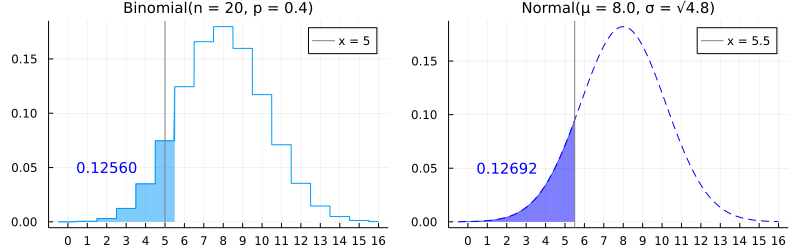

In [70]:
plot_bin_and_normal_cdfs(; k_normal = 5.5)

正規分布近似の側で $5.5$ 以下になる確率を計算するようにしたら, 二項分布の側で $5$ 以下である確率の値 $\approx 0.12560$ にかなり近い値 $\approx 0.12692$ が得られた.

正規分布による近似の側(より一般的には離散分布の連続分布による近似側)をこのように補正することを __連続性補正__ (continuity correction)と呼ぶ.

逆に二項分布の側での値を $5$ 以下になる確率と $4$ 以下になる確率の平均値で求めるようにすると, 正規分布近似側の値に近付く.  離散分布の側でこのように補正することを __mid-P 補正__ (mid-P correction)と呼ぶ.  次の図を見よ.

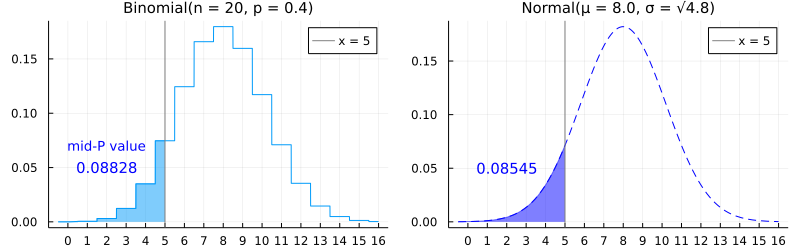

In [71]:
plot_bin_and_normal_cdfs(; midp = true)

mid-P補正は近似である連続分布の側に近似されている離散分布側の値を近付ける補正になっている.  近似される側を近似する側に近付ける補正を使うことは無意味だと感じる人もいるかもしれないが必ずしもそうではないことを説明しよう.

二項分布 $\op{Binomial}(n, p_0)$ において, $k$ 以下になる確率を次のように書き, データ $k$ に関する仮説 $p\ge p_0$ の片側検定の正確な __P値__ (P-value) と呼ぶことにする:

$$
\op{pval}_{\op{exact}}(k|n,p_0) = \op{cdf}(\op{Binomial}(n, p_0), k).
$$

これの正規分布近似版とその連続補正版とmid-P補正版をそれぞれ次のように書くことにする:

$$
\begin{aligned}
&
\op{pval}_{\op{normal}}(k|n,p_0) =
\op{cdf}(\op{Normal}(n p_0, \sqrt{n p_0(1 - p_0)}), k),
\\ &
\op{pval}_{\op{conti}}(k|n,p_0) =
\op{cdf}(\op{Normal}(n p_0, \sqrt{n p_0(1 - p_0)}), k+0.5),
\\ &
\op{pval}_{\op{mid-P}}(k|n,p_0) =
\frac{1}{2}(\op{cdf}(\op{Binomial}(n, p_0), k-1) + \op{cdf}(\op{Binomial}(n, p_0), k)).
\end{aligned}
$$

確率変数 $K$ が $\op{Binomial}(n, p_0)$ に従うとき, データを $K$ としたときのこれらのP値の値が $0<\alpha<1$ について $\alpha$ 以下になる確率がどうなるかを計算してみよう.  その確率は __第一種の過誤の確率__ もしくは __アルファエラー__ と呼ばれ, $\alpha$ に近いことが期待される値とみなされる(その理由は後で検定論を学べばわかる).

正確なP値については, 第一種の過誤の確率は確実に $\alpha$ 以下になるが, 大部分の場合に $\alpha$ より真に小さな値になり, 場合によってはかなり小さな値になる(この性質を __保守的__ (conservative)と形容することがある). それの良い近似である連続補正された正規分布近似版も保守的である.  それらに対して, 正規分布近似によるP値とmid-P補正によるP値の第一種の過誤の確率は $\alpha$ 前後の値になり, 平均的には正確なP値よりも $\alpha$ の値に近くなる.

第一種の過誤の確率を確実に $\alpha$ 以下にしたければ正確なP値が優れているが, 第一種の過誤の確率が $\alpha$ に近い方が良いことにすると正規分布近似によるP値とmid-P補正によるP値の方が優れていることになる.

このようにP値のユーザーが何を欲しているかによってどのP値の採用が適切であるかは変わる.

以下のグラフは横軸を $\alpha$ としたときのP値達の第一種の過誤の確率を同時プロットしたものである.

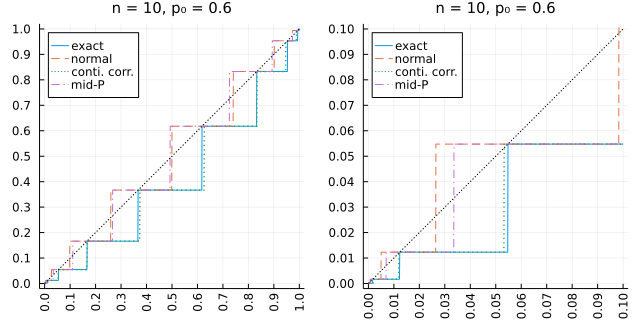

In [72]:
plot_alphaerrors(10, 0.6)

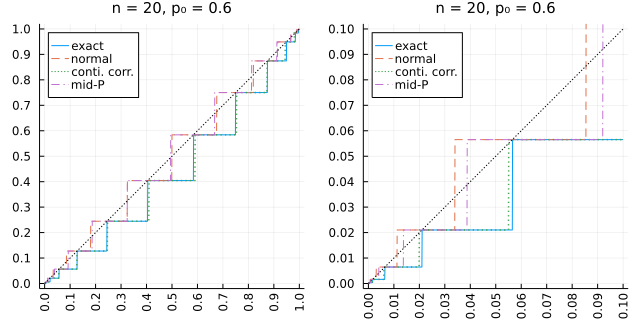

In [73]:
plot_alphaerrors(20, 0.6)

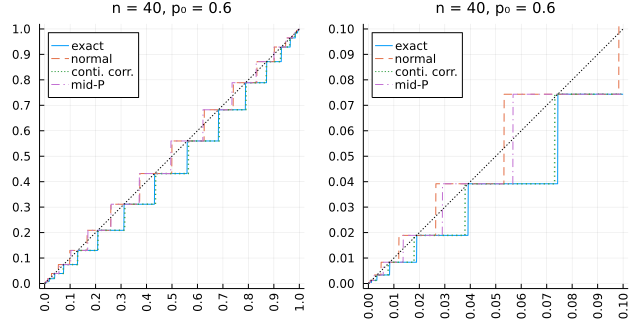

In [74]:
plot_alphaerrors(40, 0.6)

### 問題: 二項分布の中心極限定理を使った極限の計算問題

$0 < p < 1$ と $m=0,1,2,\ldots$ について以下の極限を求めよ: 

$$
\lim_{n\to\infty}
\sum_{k=0}^n
\left(\frac{k - np}{\sqrt{np(1-p)}}\right)^{2m}
\binom{n}{k}p^k(1-p)^{n-k}.
$$

__解答例:__ 二項分布の中心極限定理より,

$$
\begin{aligned}
&
\lim_{n\to\infty}
\sum_{k=0}^n
\left(\frac{k - np}{\sqrt{np(1-p)}}\right)^{2m}
\binom{n}{k}p^k(1-p)^{n-k}
\\ &=
\int_{-\infty}^\infty
\left(\frac{x}{\sqrt{p(1-p)}}\right)^{2m}
\frac{1}{\sqrt{2\pi p(1-p)}}
\exp\left(-\frac{x^2}{2p(1-p)}\right)\,dx
\\ &=
\int_{-\infty}^\infty
z^{2m}\frac{1}{\sqrt{2\pi}}e^{-z^2/2}\,dz =
\frac{2}{\sqrt{2\pi}}\int_0^\infty e^{-z^2/2} z^{2m}\,dz
\\ &=
\frac{1}{\sqrt{2\pi}}\int_0^\infty e^{-y/2} y^{m+1/2-1}\,dy =
\frac{1}{\sqrt{2\pi}} 2^{m+1/2} \Gamma(m+1/2)
\\ &=
\frac{1}{\sqrt{2\pi}} 2^{m+1/2}
\frac{2m-1}{2}\cdots\frac{3}{2}\frac{1}{2}\Gamma(1/2) =
1\cdot 3\cdots (2m-1).
\end{aligned}
$$

最初の等号で二項分布の中心極限定理を使い, 2番目の等号で $x = \sqrt{p(1-p)}\;z$ とおき, 4番目の等号で $z = \sqrt{y}$ とおいた.  5番目の等号では $\int_0^\infty e^{-y/\theta}y^{\alpha-1}\,dy = \theta^\alpha\Gamma(\alpha)$ を使った.

__解答終__

上の問題の結果を数値的に確認してみよう.

In [75]:
g(n, p, m, k) = ((k - n*p)/√(n*p*(1-p)))^(2m)
p = 0.4
@show p
for m in 0:5
    println()
    @show m
    @show n = 10^(m+1)
    @show prod(1:2:2m-1)
    @show sum(g(n, p, m, k)*pdf(Binomial(n, p), k) for k in 0:n)
end;

p = 0.4

m = 0
n = 10 ^ (m + 1) = 10
prod(1:2:2m - 1) = 1
sum((g(n, p, m, k) * pdf(Binomial(n, p), k) for k = 0:n)) = 1.000000000000001

m = 1
n = 10 ^ (m + 1) = 100
prod(1:2:2m - 1) = 1
sum((g(n, p, m, k) * pdf(Binomial(n, p), k) for k = 0:n)) = 1.0000000000000095

m = 2
n = 10 ^ (m + 1) = 1000
prod(1:2:2m - 1) = 3
sum((g(n, p, m, k) * pdf(Binomial(n, p), k) for k = 0:n)) = 2.998166666666703

m = 3
n = 10 ^ (m + 1) = 10000
prod(1:2:2m - 1) = 15
sum((g(n, p, m, k) * pdf(Binomial(n, p), k) for k = 0:n)) = 14.997416790272869

m = 4
n = 10 ^ (m + 1) = 100000
prod(1:2:2m - 1) = 105
sum((g(n, p, m, k) * pdf(Binomial(n, p), k) for k = 0:n)) = 104.99661670588064

m = 5
n = 10 ^ (m + 1) = 1000000
prod(1:2:2m - 1) = 945
sum((g(n, p, m, k) * pdf(Binomial(n, p), k) for k = 0:n)) = 944.9952750033706


### 二項分布の中心極限定理の証明の方針

二項分布の中心極限定理を以下の2段階で示す.

記号法に関する準備: $0 < p < 1$ は固定するが, $n, k$ は動かす.  $k$ は $n$ ごとに決まっていると仮定する.  混乱を完全に防ぐには $k$ を $k_n$ のように書いた方がよいが, 記号が煩雑になって書くのが面倒になるので, 単に $k$ と書くことにする.  $n\to\infty$ で $0$ に収束する量を $o(1)$ と書く.  より一般に $a_n$ で割った結果が $n\to\infty$ で $0$ に収束する量を $o(a_n)$ と書く.  例えば $o\left(1/\sqrt{n}\right)$ は $\sqrt{n}$ をかけた後であっても $n\to\infty$ で $0$ に収束する量になる. この記号法のもとで, Stirlingの公式は次のように書ける:

$$
n! = n^n e^{-n} \sqrt{2\pi n}\,(1 + o(1)).
$$

(1) $n$ ごとに決まっている $k$ は $n\to\infty$ で

$$
\frac{k}{n} = p + o(1)
$$

という条件を満たしていると仮定する. このとき, 二項分布の確率質量函数

$$
P(k|n,p) = \frac{n!}{k!(n-k)!} p^k(1-p)^{n-k} \quad (k=0,1,\ldots,n)
$$

における二項係数の中の $n!$, $k!$, $(n-k)!$ に階乗に関するStirlingの公式による近似を適用すると次の近似式が得られる:

$$
P(k|n,p) = \frac{1}{\sqrt{2\pi np(1-p)}}
\left(\left(\frac{k/n}{p}\right)\left(\frac{1-k/n}{1-p}\right)\right)^{-n}(1 + o(1)).
$$

途中の段階としてこの形に整理しておくと計算の見通しが良くなる. (しかもこの形には重要な意味がある. その点については後述する.)

(2) 固定された実数 $x$ について, 上の(1)での近似式を示すために使った仮定 $k/n = p + o(1)$ よりも強い条件

$$
\frac{k}{n} = p + \frac{x}{\sqrt{n}} + o(n^{-1/2})
$$

を仮定すると, 次が得られる:

$$
P(k|n,p) =
\underbrace{
\frac{1}{\sqrt{2\pi p(1-p)}} \exp\left(-\frac{x^2}{2p(1-p)}\right)
}_{\text{pdf of normal distribution}}
\underbrace{\frac{1}{\sqrt{n}}}_{dx/dk}
(1 + o(1)).
$$

これより, 

$$
K_n \sim \op{Binomial}(n, p), \quad
X_n = \frac{K_n - np}{\sqrt{n}}, \quad
X_\infty \sim \op{Normal}(0, p(1-p))
$$

ならば

$$
\lim_{n\to\infty} E[f(X_n)] \to E[f(X_\infty)]
$$

となることがわかる. 

この結果は, $n$ が大きなとき, $K_n \sim \op{Binomial}(n, p)$ に対する $X_n = (K_n - np)/\sqrt{n}$ が従う分布が $\op{Normal}(0, p(1-p))$ で近似されることを意味している($p(1-p)$ は分布 $\op{Bernoulli}(p)$ の分散に等しい).  この結果を二項分布の中心極限定理と呼ぶ. 

### (1) Stirlingの公式を使った二項分布の確率質量函数の近似

$n$ ごとに決まっている $k$ は $n\to\infty$ で

$$
\frac{k}{n} = p + o(1) \quad \left(\!\!\iff 1 - \frac{k}{n} = 1 - p + o(1)\right)
$$

という条件を満たしていると仮定する.  $0<p<1$ と仮定していたので, $n\to\infty$ のとき $k\to\infty$ だけではなく, $n-k\to\infty$ も成立している. ゆえに $n,k,n-k$ について次のStirlingの公式が成立している:

$$
\begin{aligned}
&
n! = n^n e^{-n} \sqrt{2\pi n}\,(1 + o(1)), 
\\ &
k! = k^k e^{-k} \sqrt{2\pi k}\,(1 + o(1)),
\\ &
(n-k)! = (n-k)^{n-k} e^{-(n-k)} \sqrt{2\pi (n-k)}\,(1 + o(1)). 
\end{aligned}
$$

これを代入すると

$$
\begin{aligned}
\frac{n!}{k!(n-k)!} &=
\frac{n^n e^{-n} \sqrt{2\pi n}}{k^k e^{-k} \sqrt{2\pi k}\;(n-k)^{n-k} e^{-(n-k)} \sqrt{2\pi (n-k)}}
(1 + o(1))
\\ &=
\frac{1}{(k/n)^k(1-k/n)^{n-k}\sqrt{2\pi n(k/n)(1-k/n)}}(1 + o(1))
\\ &=
\frac{1}{(k/n)^k(1-k/n)^{n-k}\sqrt{2\pi np(1-p)}}(1 + o(1))
\end{aligned}
$$

2つめの等号で分子の $e^{-n}$ と分母の $e^{-k}e^{-(n-k)}$ がキャンセルさせ, 分子分母を $n^k$ と $n^{n-k}$ と $\sqrt{2\pi n}$ で割った. 3つめの等号で $k/n = p + o(1)$, $1-k/n = 1-p + o(1)$ を使った. これを二項分布の確率質量函数

$$
P(k|n,p) = \frac{n!}{k!(n-k)!} p^k(1-p)^{n-k} \quad (k=0,1,\ldots,n)
$$

に適用すると,

$$
\begin{aligned}
P(k|n,p) &=
\frac{1}{\sqrt{2\pi np(1-p)}}
\left(\frac{p}{k/n}\right)^k\left(\frac{1-p}{1-k/n}\right)^{n-k}
(1 + o(1))
\\ &=
\frac{1}{\sqrt{2\pi np(1-p)}}
\left(\left(\frac{k/n}{p}\right)^{k/n}\left(\frac{1-k/n}{1-p}\right)^{1-k/n}\right)^{-n}
(1 + o(1)).
\end{aligned}
$$

### 注意: Kullback-Leibler情報量とSanovの定理との関係

前節でわざわざ最後の形に変形した理由は, 対数を取ると

$$
\log\left(
\left(\left(\frac{k/n}{p}\right)^{k/n}\left(\frac{1-k/n}{1-p}\right)^{1-k/n}\right)^{-n}
\right) = -n\left(\frac{k}{n}\log\frac{k/n}{p} + \left(1-\frac{k}{n}\log\frac{1-k/n}{1-p}\right)\right)
$$

となることを分かり易くするためである. これを $-n$ で割った結果は

$$
D(Q||P) = \sum_{i=1}^r Q(i) \log\frac{Q(i)}{P(i)}\quad
\left(P(i), Q(i) > 0,\; \sum_{i=1}^r P(i) = \sum_{i=1}^r Q(i) = 1\right)
$$

の特別な場合になっている($r=2$, $P(1)=p$, $P(2)=1-p$, $Q(1)=k/n$, $Q(2)=1-k/n$).  この $D(Q||P)$ は __Kullback-Leibler情報量__ (KL情報量)と呼ばれ, そして, 上の計算結果は $r=2$ の場合のKL情報量のSanovの証明にもなっている.  Sanovの定理の易しい解説が以下の場所にある:

* [Kullback-Leibler情報量とSanovの定理](https://genkuroki.github.io/documents/20160616KullbackLeibler.pdf)

Sanovの定理の内容を要約すると, Kullback-Leibler情報量 $D(Q||P)$ は確率分布 $P$ に従う乱数の繰り返し生成において確率分布 $Q$ がどれだけ出て来難いかを表しているという主張になる.  上の二項分布の場合には, $Q$ に対応する $k/n$ が生じる確率が $\exp(-nD(Q||P)+O(\log n))$ の形をしていることが示されていることになるので(分母の $\sqrt{2\pi np(1-p)}$ は $\exp(O(\log n))$ になる), KL情報量 $D(Q||P)$ が大きいほど $k/n$ が生じる確率は急激に小さくなる. 

Sanovの定理は統計学でのモデル選択における情報量規準の考え方の基礎になっている. KL情報量は確率論では __大偏差原理__ に出て来る. KL情報量は物理的には統計力学的な相対エントロピーの $-1$ 倍になる. このような分野を超えた広がりについては, __赤池情報量規準__ (__AIC__)で有名な赤池弘次氏による1980年の2つの論説も参照せよ:

* 赤池弘次, エントロピーとモデルの尤度(<講座>物理学周辺の確率統計), 日本物理学会誌, 1980年第35巻7号, pp. 608-614.  [link](https://www.jstage.jst.go.jp/article/butsuri1946/35/7/35_7_608/_article/-char/ja/)
* 赤池弘次, 統計的推論のパラダイムの変遷について, 統計数理研究所彙報, 1980年第27巻第1号, pp. 5-12.  [link](https://ismrepo.ism.ac.jp/index.php?active_action=repository_view_main_item_detail&page_id=13&block_id=21&item_id=32568&item_no=1)

赤池弘次さんは前者のp.612に「筆者によって導入されたこの統計量はAIC(an information criterionの略記*)と呼ばれ」と書いているが, それに対して会誌編集委員会が「一般には Akaike's information criterionの略と解されている」と脚注を付けている. このことを確認するだけでもダウンロードする価値があるだろう.

上で紹介した計算は二項分布の確率質量函数にStirlingの公式を適用する単純な計算に過ぎないのだが, その先には分野を超えた非常に面白い世界が広がっている.

### (2) 二項分布の確率質量函数から正規分布の密度函数が出て来ること

$n$ ごとに決まっている $k$ は $n\to\infty$ で

$$
\frac{k}{n} = p + o(1)
$$

という条件を満たしているならば

$$
P(k|n,p) =
\frac{1}{\sqrt{2\pi np(1-p)}}
\left(\left(\frac{k/n}{p}\right)^{k/n}\left(\frac{1-k/n}{1-p}\right)^{1-k/n}\right)^{-n}
(1 + o(1))
$$

となることを上で示した.  以下では $k/n = p + o(1)$ よりも強い条件

$$
\frac{k - np}{\sqrt{n}} = x + \eps_n, \quad
\lim_{n\to\infty}\eps_n = 0
$$

を仮定する.  このとき,

$$
\frac{k}{n} = p + \frac{x+\eps_n}{\sqrt{n}}, \quad
1-\frac{k}{n} = 1 - p - \frac{x+\eps_n}{\sqrt{n}}.
$$

以上の仮定のもとで, $\log(1+t)=t-t^2/2+t^3/3-\cdots$ を使うと,

$$
\begin{aligned}
\log\left(\frac{k/n}{p}\right)^{k/n} &=
\frac{k}{n}\log\frac{k/n}{p} =
\left(p + \frac{x+\eps_n}{\sqrt{n}}\right)
\log\left(1 + \frac{x+\eps_n}{\sqrt{n}\;p}\right)
\\ &=
\left(p + \frac{x+\eps_n}{\sqrt{n}}\right)
\left(\frac{x+\eps_n}{\sqrt{n}\;p} - \frac{x^2}{2np^2} + o(1/n)\right)
\\ &=
\frac{x+\eps_n}{\sqrt{n}} - \frac{x^2}{2np} + \frac{x^2}{np^2} + o(1/n)
\\ &=
\frac{x+\eps_n}{\sqrt{n}} + \frac{x^2}{2np} + o(1/n),
\\
\log\left(1-\frac{k/n}{1-p}\right)^{1-k/n} &=
\left(1-\frac{k}{n}\right)\log\frac{k/n-1}{p} =
\left(1 - p - \frac{x+\eps_n}{\sqrt{n}}\right)
\log\left(1 - \frac{x+\eps_n}{\sqrt{n}\,(1-p)}\right)
\\ &=
\left(1 - p - \frac{x+\eps_n}{\sqrt{n}}\right)
\left(-\frac{x+\eps_n}{\sqrt{n}\,(1-p)} - \frac{x^2}{2n(1-p)^2} + o(1/n)\right)
\\ &= -
\frac{x+\eps_n}{\sqrt{n}} - \frac{x^2}{2n(1-p)} + \frac{x^2}{n(1-p)^2} + o(1/n)
\\ &= -
\frac{x+\eps_n}{\sqrt{n}} + \frac{x^2}{2n(1-p)} + o(1/n).
\end{aligned}
$$

ゆえに, 

$$
\begin{aligned}
&
\log\left(\left(\frac{k/n}{p}\right)^{k/n}\left(\frac{1-k/n}{1-p}\right)^{1-k/n}\right)^{-n}
\\ &=
-n\left(
\log\left(\frac{k/n}{p}\right)^{k/n} +
\log\left(1-\frac{k/n}{1-p}\right)^{1-k/n}
\right)
\\ &= -
\frac{x^2}{2p} - \frac{x^2}{2(1-p)} + o(1) = -
\frac{x^2}{2p(1-p)} + o(1).
\end{aligned}
$$

したがって,

$$
P(k|n,p) =
\frac{1}{\sqrt{2\pi p(1-p)}}
\exp\left(-\frac{x^2}{2p(1-p)}\right)
\frac{1}{\sqrt{n}}
\;(1 + o(1)).
$$

この公式の $1/\sqrt{n}$ より前の部分は平均 $0$, 分散 $p(1-p)$ の正規分布の確率密度函数であり, $1/\sqrt{n}$ の因子は $k = np + \sqrt{n}\,(x + \eps_n)$ から形式的に得られる $dk = \sqrt{n}\;dx$ の $\sqrt{n}$ の因子とキャンセルすると考えると自然に見える.

これより, $K_n \sim \op{Binomial}(n, p)$, X_\infty \sim \op{Normal}(0, p(1-p)) のとき,

$$
X_n = \frac{K_n - np}{\sqrt{n}}, \quad
x_n(k) = \frac{k - np}{\sqrt{n}}, \quad
\varDelta x_n = \frac{1}{\sqrt{n}}
$$

とおくと, 有界な連続函数 $f(x)$ について, $n\to\infty$ のとき

$$
\begin{aligned}
E[f(X_n)] &=
\sum_{k=0}^n f(x_n(k)) P(k|n,p)
\\ &=
\sum_{k=0}^n f(x_n(k))
\frac{1}{\sqrt{2\pi p(1-p)}}
\exp\left(-\frac{x_n(k)^2}{2p(1-p)}\right)
\varDelta x_n \;(1 + o(1))
\\ &=
\int_{-\infty}^\infty f(x)
\frac{1}{\sqrt{2\pi p(1-p)}}
\exp\left(-\frac{x^2}{2p(1-p)}\right)\,dx =
E[f(X_\infty)].
\end{aligned}
$$

以上の議論は厳密には少しギャップがあるのだが, 二項分布に関して中心極限定理が成立する理由の本質は十分に分かる内容になっている.

## 中心極限定理

__中心極限定理__ (central limit theorem)は「中心に収束する極限定理」というような意味ではなく、__「確率論における中心的な極限定理」__ という意味である.

__注意:__ 特性函数, モーメント母函数, キュムラント母函数, 歪度(わいど), 尖度(せんど)などについては「標本分布について」のノートに詳しい解説がある.

### 中心極限定理のラフな説明

$X_1,\ldots,X_n$ は各々が期待値 $\mu$, 分散 $\sigma^2$ を持つ分布に従う $n$ 個の独立同分布確率変数達であるとし, $n$ は十分に大きいと仮定する. 

中心極限定理は以下のように同値な言い方が色々ある:

(1) それらの和 $X_1+\cdots+X_n$ が従う分布は期待値 $n\mu$, 分散 $n\sigma^2$ の正規分布で近似される:

$$
\sum_{i=1}^n X_i
\sim \op{Normal}\left(n\mu, \sqrt{n}\,\sigma\right)\quad\text{approximately}.
$$

(2) それらの加法平均 $\bar{X}_n = (X_1+\cdots+X_n)/n$ が従う分布は期待値 $\mu$, 分散 $\sigma^2/n$ の正規分布で近似される:

$$
\bar{X}_n = \frac{1}{n}\sum_{i=1}^n X_i
\sim \op{Normal}\left(\mu, \sigma/\sqrt{n}\right)\quad\text{approximately}.
$$

(3) $\sqrt{n}\,(\bar{X}_n - \mu)$ が従う分布は期待値 $0$, 分散 $\sigma^2$ の正規分布で近似される:

$$
\sqrt{n}\,(\bar{X}_n - \mu) =
\frac{1}{\sqrt{n}}\sum_{i=1}^n (X_i - \mu)
\sim \op{Normal}(0, \sigma)\quad\text{approximately}.
$$

(4) 次の $Z_n$ が従う分布は標準正規分布で近似される:

$$
Z_n = \frac{\sqrt{n}\,(\bar{X}_n - \mu)}{\sigma} =
\frac{1}{\sqrt{n}}\sum_{i=1}^n \frac{X_i - \mu}{\sigma}
\sim \op{Normal}(0, 1)\quad\text{approximately}.
$$

これらはどれも便利であり, 今後, 自由に使われることになるだろう.

__注意・警告:__ 統計学に中心極限定理を応用する場合には, $n\to\infty$ とできる数学的に理想的な状況における中心極限定理ではなく, 有限の固定された $n$ における近似として中心極限定理は使われる. だから, 場合ごとにその近似の誤差が問題になる.  この問題は目的ごとに異なる許容される誤差との兼ね合いの問題になるので, きれいな一般論で解決できる話ではなく, 中心極限定理のユーザー自身が自分自身の目的に合わせて誤差が大きくなるリスクをどこまで許容するかを決定する必要がある. そのためには, 中心極限定理による近似の精度がどのような場合に悪くなりそうかについて前もって理解しておく必要がある.

__補足:__ 分布 $D_n$ が分布 $D_\infty$ で近似されるとは, 分布 $D_n$ に従う確率変数 $X_n$ と分布 $D_\infty$ に従う確率変数 $X_\infty$ と適切なクラスに含まれる任意の函数 $f(x)$ について

$$
\lim_{n\to\infty} E[f(X_n)] = E[f(X_\infty)]
$$

が成立することだと, 大雑把に定義しておく. (函数 $f(x)$ としてどのような函数を許すかについて詳細な説明をするためにはさらなる数学的道具立てが必要でかる, 雑に扱っても害はほとんどない場合にもなっているので, このノートで説明しない.  所謂「分布収束」「法収束」の話になる.)  統計学で必要な確率論の計算は期待値を取る操作経由で可能なのでこのような定義にしておいても困ることはない.

__補足の補足:__ 数学的詳細を理解できそうもないと感じる人であっても, 中心極限定理の良いユーザーになることは可能である.  そのためには, 正規分布で近似したい分布のグラフとそれを近似すると期待される正規分布のグラフを重ねて描く作業を十分に沢山行えばよい.  数学的詳細を理解可能な人であっても, そういう視覚化による理解をサボってしまうと, 有限の $n$ でどのように正規分布による近似の精度が悪くなるかについての感覚が身に付かなくなってしまう.  数学的詳細を理解していなくても, 中心極限定理の利用でどのようなリスクが発生するかを具体例を沢山見ることによって把握していれば, その人は十分に良い中心極限定理ユーザーになれるだろう.

### 中心極限定理の特性函数を使った証明

__中心極限定理:__ $X_1, X_2, X_3, \ldots$ が独立同分布な確率変数の列であるとき, $\mu=E[X_k]$ が定義されていて, $\sigma^2 = \var(X_k) = E[(X_k - \mu)^2] < \infty$ でかつ, $E[|X_k - \mu|^3] < \infty$ となっていると仮定する. このとき,

$$
\bar{X}_n = \frac{1}{n}\sum_{k=1}^n X_k, \quad
Z_n = \frac{\sqrt{n}\,(\bar{X}_n - \mu)}{\sigma}
$$

とおくと, $n\to\infty$ で $Z_n$ の分布は標準正規分布に近付く.

__証明:__ $X_k$ の標準化を $Y_k = (X_k - \mu)/\sigma$ と書くことにする. $Y_1, Y_2, \ldots$ も独立同分布になり, $E[Y_k] = 0, \quad E[Y_k^2] = 1$ が成立している.  ゆえに $Y_k$ の特性函数 $\varphi(t)$ は $k$ によらず,

$$
\varphi(t) =
E[e^{itY_k}] =
1 + iE[Y_k]t - E[Y_k^2]\frac{t^2}{2} + O(t^3) =
1 - \frac{t^2}{2} + O(t^3)
$$

という形になる. そして,

$$
\frac{1}{\sqrt{n}}\sum_{k=1}^n Y_k =
\frac{\sqrt{n}}{\sigma}\frac{1}{n}\sum_{k=1}^n (X_k - \mu) =
\frac{\sqrt{n}}{\sigma}(\bar{X}_n - \mu) = Z_n
$$

なので, $Z_n$ の特性函数は, $n\to\infty$ で

$$
\begin{aligned}
\varphi_{Z_n}(t) &=
E\left[\exp\left(it \frac{1}{\sqrt{n}}\sum_{k=1}^n Y_k\right)\right] =
E\left[\prod_{k=1}^n\exp\left(i\frac{t}{\sqrt{n}}Y_k\right)\right]
\\ &=
\prod_{k=1}^n E\left[\exp\left(i\frac{t}{\sqrt{n}}Y_k\right)\right] =
\varphi\left(\frac{t}{\sqrt{n}}\right)^n =
\left(1 - \frac{t^2}{2n} + O(n^{-3/2})\right)^n \to
e^{-t^2/2}.
\end{aligned}
$$

と標準正規分布の特性函数 $e^{-t^2/2}$ に収束する.  (3つめの等号で $Y_1,\ldots,Y_n$ の独立性を使った.)

ゆえに $Z_n$ の分布は $n\to\infty$ で標準正規分布に近付く.

__証明終__

__注意:__ $f(x)$ のFourier変換を

$$
\hat{f}(t) = \int_{-\infty}^\infty f(x) e^{-itx}\,dx
$$

と定義するとき, 逆Fourier変換によって,

$$
f(x) = \frac{1}{2\pi} \int_{-\infty}^\infty \hat{f}(t) e^{itx}\,dt
$$

が成立しているので, 確率変数 $X$ について $f(X)$ の期待値は, $X$ の特性函数 $\varphi_X(t) = E[e^{itX}]$ を使って,

$$
E[f(X)] = \frac{1}{2\pi} \int_{-\infty}^\infty \hat{f}(x) \varphi_X(t) \,dt
$$

と書ける(積分と期待値を取る操作を交換できる).  このことから, 確率変数 $X$ の特性函数と確率変数 $Y$ の特性函数が近ければ, $f(X)$ と $f(Y)$ の期待値も近くなる.  このことから, 分布の近似は特性函数の近似で扱えることがわかる.

### 中心極限定理の収束の速さと歪度

前節の証明より, 独立同分布確率変数列 $X_1,X_2,\ldots$ に対して, 

$$
\mu = E[X_k], \quad
\sigma = \sqrt{E[(X-\mu)^2]}, \quad
Y_k = \frac{X_k - \mu}{\sigma}, \quad
\varphi(t) = E[e^{itY_k}]
$$

とおいたときの, $n\to\infty$ での $\varphi(t/\sqrt{n})^n \to e^{-t^2/2}$ という収束の速さを調べれば, 中心極限定理による正規分布への収束の速さがわかる.  

$$
\bar\mu_3 = E[Y_k^3] = E\left[\left(\frac{X_k - \mu}{\sigma}\right)^3\right]
$$

とおくと,

$$
\varphi\left(\frac{t}{\sqrt{n}}\right) = E[e^{itY_k}] =
1 - \frac{t^2}{2n} - i\bar\mu_3\frac{t^3}{6n\sqrt{n}} + O(n^{-2})
$$

なので, 

$$
\log\varphi\left(\frac{t}{\sqrt{n}}\right)^n = 
n\log\left(1 - \frac{t^2}{2n} - i\bar\mu_3\frac{t^3}{6n\sqrt{n}} + O(n^{-2})\right) =
-\frac{t^2}{2} - i\bar\mu_3\frac{t^3}{6\sqrt{n}} + O(n^{-1}).
$$

これは $n\to\infty$ での $\log\varphi\left(t/\sqrt{n}\right)^n \to -t^2/2$ の収束の速さは, $Y_k=(X_k-\mu)/\sigma$ の3次のモーメント $\bar\mu_3$ の絶対値の大きさで大体決まっていることがわかる. $\bar\mu_3$ の絶対値が小さいほど収束が速く, 大きいほど収束が遅い.

$\bar\mu_3$ は $X_k$ の分布の期待値 $\mu$ を中心とする非対称性の $\sigma$ によって適切に正規化した尺度になっている.  $\bar\mu_3$ は $Y_k=(X_k-\mu)/\sigma$ の3次のキュムラントにも一致している:

$$
K_{Y_k}(t) = \log E[e^{tY_k}] =
\log\left(1 + \frac{t^2}{2} + \bar\mu_3\frac{t^3}{3!} + O(t^4)\right) =
\frac{t^2}{2} + \bar\mu_3 \frac{t^3}{3!} + O(t^4).
$$

ここでの $t^3/3!$ の係数 $\bar\kappa_3 = \bar\mu_3$ は $X_k$ の __歪度__ (skewness) と呼ばれるのであった.

### 中心極限定理のキュムラント母函数を使った証明

__中心極限定理:__ $X_1, X_2, X_3, \ldots$ が独立同分布な確率変数の列であるとき, $\mu=E[X_k]$ が定義されていて, $\sigma^2 = \var(X_k) = E[(X_k - \mu)^2] < \infty$ でかつ, $E[|X_k - \mu|^3] < \infty$ となっており, さらに各 $X_k$ のキュムラント母函数がうまく定義されているとする. このとき,

$$
\bar{X}_n = \frac{1}{n}\sum_{k=1}^n X_k, \quad
Z_n = \frac{\sqrt{n}\,(\bar{X}_n - \mu)}{\sigma}
$$

とおくと, $n\to\infty$ で $Z_n$ の分布は標準正規分布に近付く.

__証明:__ $X_k$ の標準化を $Y_k = (X_k - \mu)/\sigma$ と書くことにする. $Y_1, Y_2, \ldots$ も独立同分布になり, $E[Y_k] = 0, \quad E[Y_k^2] = 1$ が成立している.  ゆえに $Y_k$ のキュムラント母函数 $K(t)$ は $k$ によらず,

$$
K(t) = K_{Y_k}(t) = \frac{t^2}{2} + O(t^3)
$$

という形になる. そして,

$$
\frac{1}{\sqrt{n}}\sum_{k=1}^n Y_k =
\frac{\sqrt{n}}{\sigma}\frac{1}{n}\sum_{k=1}^n (X_k - \mu) =
\frac{\sqrt{n}}{\sigma}(\bar{X}_n - \mu) = Z_n
$$

なので, $Z_n$ のキュムラント母函数は, $n\to\infty$ で

$$
\begin{aligned}
K_{Z_n}(t) &=
K_{Y_1/\sqrt{n}+\cdots+Y_n/\sqrt{n}}(t) =
K_{Y_1}\left(\frac{t}{\sqrt{n}}\right) + \cdots + K_{Y_1}\left(\frac{t}{\sqrt{n}}\right) \\ &=
n K\left(\frac{t}{\sqrt{n}}\right) =
n\left(\frac{t^2}{2n} + O(n^{-3/2})\right) =
\frac{t^2}{2} + O(n^{-1/2})) \to
\frac{t^2}{2}
\end{aligned}
$$

と標準正規分布のキュムラント母函数 $t^2/2$ に収束する.

ゆえに $Z_n$ の分布は $n\to\infty$ で標準正規分布に近付く.

__証明終__

__注意:__ このようにキュムラント母函数を使うと証明が非常にシンプルになる.

### 中心極限定理の収束の速さと歪度と尖度

前節の証明より, 独立同分布確率変数列 $X_1,X_2,\ldots$ に対して, 

$$
\mu = E[X_k], \quad
\sigma = \sqrt{E[(X-\mu)^2]}, \quad
K(t) = K_{(X_k - \mu)/\sigma}(t) = \log E\left[\left(\frac{X_k-\mu}{\sigma}\right)\right]
$$

とおいたときの, $n\to\infty$ での $n K(t/\sqrt{n}) \to t^2/2$ という収束の速さを調べれば, 中心極限定理による正規分布への収束の速さがわかる. $X_k$ の歪度(わいど) $\bar\kappa_3$ と尖度(せんど) $\bar\kappa_4$ は

$$
\bar\kappa_3 = E\left[\left(\frac{X_k - \mu}{\sigma}\right)^3\right], \quad
\bar\kappa_4 = E\left[\left(\frac{X_k - \mu}{\sigma}\right)^4\right] - 3
$$

と表され, $X_k$ の標準化のキュムラント母函数 $K(t)$ の展開の係数になっているのであった:

$$
K(t) = \frac{t^2}{2} + \bar\kappa_3\frac{t^3}{3!} + \bar\kappa_4\frac{t^4}{4!} + O(t^5).
$$

このとき,

$$
n K\left(\frac{t}{\sqrt{n}}\right) =
n\left(
\frac{t^2}{2n} + \bar\kappa_3\frac{t^3}{3!\,n^{3/2}} + \bar\kappa_4\frac{t^4}{4!\,n^2} + O(n^{-5/2})
\right) =
\frac{t^2}{2} + \bar\kappa_3\frac{t^3}{3!\,\sqrt{n}} + \bar\kappa_4\frac{t^4}{4!\,n} + O(n^{-3/2})
$$

これが $t^2/2$ に収束する速さは $\bar\kappa_3 \ne 0$ ならば $O(n^{-1/2})$ のオーダーになり, 歪度 $\bar\kappa_3$ の絶対値が大きいほど遅くなる. そして, $\bar\kappa_3 = 0$ ならば $O(n^{-1})$ のオーダーでの収束になり, 尖度 $\bar\kappa_4$ の絶対値が大きいほど収束は遅くなる.

### 中心極限定理のTaylorの定理のみを使う証明

以上では中心極限定理を特性函数やキュムラント母函数を使って証明する方法を(論理的には大雑把に)紹介した.

その方法は本質的にFourier解析に依存している.

実はFourier解析に依存せずに, 本質的にTaylorの定理(Taylor展開の剰余項版)しか使わない初等的な証明も存在する.

しかし, 読者の中にはTaylorの定理も証明をよく知らない人もいるかもしれないので, 以下では丁寧にTaylorの定理の証明の概略から説明して行くことにする.

#### 多重積分の書き方

以下では多重積分での括弧を略して書くために, 次の式の右辺を左辺のように書くことにする:

$$
\int_a^b dx\,f(x) = \int_a^b f(x)\,dx.
$$

このように書くと, 次の右辺のように括弧が沢山必要になる多重積分の式を左辺のようにシンプルに書くことができる:

$$
\int_a^x dx_1\int_a^{x_1}dx_2\int_a^{x_2}dx_3\,g(x_3) =
\int_a^x\left(\int_a^{x_1}\left(\int_a^{x_2}g(x_3)\,dx_3\right)dx_2\right)dx_1
$$

しかも, この式の右辺の書き方だと, 積分変数の $x_i$ 達の指定が式の最後の方でされているので, $\int_a^{x_i}$ の部分の解釈を確定させるためには式を最後の方まで全部見る必要が生じてしまう.  左辺の書き方だとそのような問題が生じない.

#### 積分剰余項型のTaylorの定理

以下では次の結果を示そう:

$$
R_4(x, a) = \int_a^x dx_1\int_a^{x_1}dx_2\int_a^{x_2}dx_3\int_a^{x_3}dx_4\, f^{(4)}(x_4)
$$

とおくと,

$$
\begin{aligned}
f(x) &= f(a) + f(a)(x-a) + f''(a)\frac{(x-a)^2}{2} + f'''(a)\frac{(x-a)^3}{3!} + R_4(x,a).
\end{aligned}
$$

これを示すためには4階の導函数 $f^{(4)}(x)$ を4回不定積分すればよい. すなわち, 「微分して不定積分するときに適切に積分定数を決めてやればもとの函数に戻る」という結果

$$
g(x) = g(a) + \int_a^x dx'\,g'(x') 
$$

を4回使うと,

$$
\begin{aligned}
f'''(x_3) &= f'''(a) + \int_a^{x_3}dx_4\,f^{(4)}(x_4),
\\
f''(x_2) &= f''(a) + \int_a^{x_2}dx_3\,f'''(x_3)
\\ &=
f''(a) + f'''(a)(x_2 - a) + \int_a^{x_2}dx_3\int_a^{x_3}dx_4\,f^{(4)}(x_4)
\\
f'(x_1) &= f'(a) + \int_a^{x_1}dx_2\,f''(x_2)
\\ &=
f'(a) + f''(a)(x_1 - a) + f'''(a)\frac{(x_1 - a)^2}{2}
\\ &+
\int_a^{x_1}dx_2\int_a^{x_2}dx_3\int_a^{x_3}dx_4\,f^{(4)}(x_4)
\\
f(x) &= f(a) + \int_a^{x}dx_1\,f'(x_1)
\\ &=
f(a) + f'(a)(x - a) + f''(a)\frac{(x - a)^2}{2} + f'''(a)\frac{(x - a)^3}{3!}
\\ &+
\underbrace{
\int_a^{x}dx_1\int_a^{x_1}dx_2\int_a^{x_2}dx_3\int_a^{x_3}dx_4\,f^{(4)}(x_4)
}_{=R_4(x,a)}.
\end{aligned}
$$

不定積分を繰り返す過程で,

$$
\int_a^x dx'\,\frac{(x' - a)^k}{k!} =
\frac{(x - a)^{k+1}}{(k+1)!}
$$

となることから, 次の形の式が得られた:

$$
f(a) + f'(a)(x - a) + f''(a)\frac{(x - a)^2}{2} + f'''(a)\frac{(x - a)^3}{3!}
$$

以上とまったく同様にして次を示すことができる:

$$
R_n(x, a) = \int_a^x dx_1\int_a^{x_1}dx_2\cdots\int_a^{x_{n-1}}dx_n\, f^{(n)}(x_n)
$$

とおくと,

$$
f(x) = \sum_{k=0}^{n-1} f^{(k)}(a)\frac{(x-a)^k}{k!} + R_n(x,a).
$$

この結果を __積分剰余項型のTaylorの定理__ と呼ぶことにする.

もしかしたら, 大学1年生のときの講義で剰余項の形が別のTaylorの定理について複雑な証明を聴いた人が多いかもしれないが, Taylorの定理の本質は「沢山微分して沢山積分すればもとの函数に戻る」ということに過ぎず, 直観的にはほとんど明らかな結果に過ぎない.  明らかな結果について「わけがわからないがとにかく成立する定理」だと認識してしまうことは数学を理解するときに避けるべきことである.

#### 積分剰余項の別の表示

剰余項 $R_n(x,t)$ は次の式で定義されると考えてよい:

$$
R_n(x,t) = f(x) - \sum_{k=0}^{n-1} f^{(k)}(t)\frac{(x-t)^k}{k!}.
$$

このとき, $R_n(x,x)=0$ でかつ, 両辺を $t$ で偏微分すると,

$$
\begin{aligned}
\frac{\partial}{\partial t}R_n(x,t) &=
\sum_{k=1}^{n-1} f^{(k)}(t)\frac{(x-t)^{k-1}}{(k-1)!} -
\sum_{k=0}^{n-1} f^{(k+1)}(t)\frac{(x-t)^k}{k!}
\\ &=
\sum_{k=1}^{n-1} f^{(k)}(t)\frac{(x-t)^{k-1}}{(k-1)!} -
\sum_{k=1}^{n} f^{(k)}(t)\frac{(x-t)^{k-1}}{(k-1)!}
\\ &= -
f^{(n)}(t)\frac{(x-t)^{n-1}}{(n-1)!}.
\end{aligned}
$$

この偏導函数を $t$ について $x$ から $a$ まで積分することによって($a$ から $x$ まで積分して $-1$ 倍することと同じ), 次が得られる:

$$
R_n(x,a) = \int_a^x f^{(n)}(t)\frac{(x-t)^{n-1}}{(n-1)!}\,dt.
$$

以上によっても積分剰余項型のTaylorの定理がシンプルに証明されたことになる.

Taylorの定理の証明は易しい!

__注意:__ $h = x - a$, $t = a + sh$ とおくと, $R_n(x,a)$ は次のようにも表される:

$$
R_n(a+h, a) = h^n\int_0^1 f^{(n)}(a + sh)\frac{(1-s)^{n-1}}{(n-1)!}\,ds.
$$

すなわち,

$$
f(a+h) =
\sum_{k=0}^{n-1} f^{(k)}(a)\frac{h^k}{k!} +
h^n\int_0^1 f^{(n)}(a + sh)\frac{(1-s)^{n-1}}{(n-1)!}\,ds.
$$

後でTaylorの定理をこの形で使うことになる.

__注意:__ 上で求めた積分剰余項の公式と前節で求めた公式の関係. 前節では

$$
R_n(x, a) = \int_a^x dx_1\int_a^{x_1}dx_2\cdots\int_a^{x_{n-1}}dx_n\, f^{(n)}(x_n)
$$

を示した. 簡単のため $a\le x$ と仮定する($a \ge x$ の場合も同様である). そのとき, すぐ上の式の右辺の積分の範囲は

$$
a \le x_n \le x_{n-1}\le x_{n-2}\le\cdots\le x_2 \le x_1 \le x
$$

なので, $x_n$ による積分を一番外側に出すと次のように書き直される:

$$
R_n(x, a) =
\int_a^x f^{(n)}(x_n)
\left(
\int_{x_n}^x\,dx_1\int_{x_n}^{x_1}dx_2\cdots\int_{x_n}^{x_{n-2}}dx_{n-1}
\right)\,dx_n.
$$

$\int_{x_n}^x\,dx_1\int_{x_n}^{x_1}dx_2\cdots\int_{x_n}^{x_{n-2}}dx_{n-1}$ の部分は $1$ の $n-1$ 回の不定積分なので $(x-x_n)^{n-1}/(n-1)!$ に等しい:

$$
\int_{x_n}^x\,dx_1\int_{x_n}^{x_1}dx_2\cdots\int_{x_n}^{x_{n-2}}dx_{n-1} =
\frac{(x-x_n)^{n-1}}{(n-1)!}.
$$

これより, 前節で求めた積分剰余項の公式から上で求めた公式が得られることがわかった.

#### 微分剰余項型のTaylorの定理

$f(t)$ は $C^n$ 級であると仮定する.

簡単のため $a\le x$ と仮定する($a\ge x$ の場合も同様である). $a$ 以上 $x$ 以下の $t$ についての $f^{(n)}(t)$ の最小値と最大値をそれぞれ $f^{(n)}(\alpha)$, $f^{(n)}(\beta)$ ($a\le\alpha,\beta\le x$) と書くと, 

$$
f^{(n)}(\alpha)\frac{(x-a)^n}{n!} \le
R_n(x,a) = \int_a^x f^{(n)}(t)\frac{(x-t)^{n-1}}{(n-1)!}\,dt
\le f^{(n)}(\beta)\frac{(x-a)^n}{n!}.
$$

ゆえに, 中間値の定理より, $\alpha$ と $\beta$ のあいだのある実数 $\xi$ が存在して,

$$
f^{(n)}(\xi)\frac{(x-a)^n}{n!} = R_n(x, a).
$$

これで積分を使わずに微分だけを使った剰余項の表示が得られた.

#### Taylorの定理を使った中心極限定理の証明

$X_1,X_2,X_3,\ldots$ は同分布独立確率変数列であるとし, それらの共通の期待値 $\mu=E[X_i]$ は $0$ であるとし, 共通の分散 $\sigma^2=E[(X_i-\mu)^2]$ は $1$ であるとし, $E[|X_i|^m]<\infty$ ($m=3,4,5$)であると仮定し, $X_i$ の歪度と尖度を次のように書くことにする:

$$
\bk_3 = E[X_i^3], \quad \bk_4 = E[X_i^4] - 3.
$$

このとき, $Z$ を標準正規分布に従う確率変数であるとし,

$$
Z_n = \frac{1}{\sqrt{n}} \sum_{i=1}^n X_i.
$$

とおくと, 有限区間の外で $0$ になる $C^5$ 級函数 $f(z)$ に対して, $m=3,4,5$ に関する $|f^{(m)}(z)|$ の最大値を $M_m$ と書くと,  $n\to\infty$ において次が成立している:

$$
\begin{aligned}
&
|E[f(Z_n)] - E[f(Z)]|
\\ &\le
\frac{M_3}{3!\,\sqrt{n}}|\bk_3| +
\frac{M_4}{4!\,n}|\bk_4| +
\frac{M_5}{5!\,n\sqrt{n}}(E[|X_i|^5] + E[|Z|^5]).
\end{aligned}
$$

特に次が成立している:

$$
\lim_{n\to\infty} E[f(Z_n)] = E[f(Z)].
$$

__注意:__ 必要ならば $X_i$ を $(X_i-\mu)/\sigma$ で置き換えることによって, 上のように仮定しても一般性が失われないことに注意せよ.

__証明:__

__Step 1.__ $Y_1,Y_2,Y_3,\ldots$ は $X_1,X_2,X_3,\ldots$ とは別の独立同分布確率変数列であるとし, $X_i,Y_i$ の全体は独立でかつ $E[Y_i]=0$, $E[Y_i^2]=1$, $E[|Y_i|^3]<\infty$ を満たしていると仮定する.

$W_n$, $Z_n^{(k)}$, $A_n^{(k)}$ を次のように定める:

$$
\begin{aligned}
&
W_n = \frac{1}{\sqrt{n}} \sum_{i=1}^n Y_i,
\\ &
Z_n^{(k)} = \frac{1}{\sqrt{n}}(X_1+\cdots+X_k+Y_{k+1}+\cdots+Y_n),
\\ &
A_n^{(k)} = \frac{1}{\sqrt{n}}(X_1+\cdots+X_{k-1}+Y_{k+1}+\cdots+Y_n).
\end{aligned}
$$

このとき,

$$
Z_n = Z_n^{(n)}, \quad
W_n = Z_n^{(0)}, \quad
Z_n^{(k)} = A_n^{(k)} + \frac{X_k}{\sqrt{n}}, \quad
Z_n^{(k-1)} = A_n^{(k)} + \frac{Y_k}{\sqrt{n}}.
$$

以下では, 大雑把に言うと, $Z_n^{(k)}$ の分布と $Z_n^{(k-1)}$ の分布の違いは小さいことを示す.

まず, $G(a,h)$ を次のように定める:

$$
G(a, h) = \int_0^1 f^{(5)}(a + sh)\frac{(1-s)^4}{4!}\,ds.
$$

$m=3,4,5$ に対する $|f^{(m)}(z)|$ の最大値を $M_m$ と書くと,

$$
|G(a,h)| \le M_5 \int_0^1 \frac{(1-s)^4}{4!}\,ds = \frac{M_5}{5!}.
$$

$f(z)$ にTaylorの定理を適用すると,

$$
f(a+h) =
f(a) + h f'(a) + \frac{h^2}{2}f''(a) +
\frac{h^3}{3!}f'''(a) + \frac{h^4}{4!}f^{(4)}(a) +
h^3 G(a, h).
$$

これを $a = A_n^{(k)}$, $h = X_k/\sqrt{n}, Y_k/\sqrt{n}$ に適用すると,

$$
\begin{aligned}
f(Z_n^{(k)}) &=
f(A_n^{(k)}) +
\frac{X_k}{\sqrt{n}} f'(A_n^{(k)}) + \frac{X_k^2}{2n}f''(A_n^{(k)}) 
\\ &+
\frac{X_k^3}{3!\,n\sqrt{n}}f'''(A_n^{(k)}) + \frac{X_k^4}{4!\,n^2}f^{(4)}(A_n^{(k)}) +
\frac{X_k^5}{n^2\sqrt{n}} G\left(A_n^{(k)}, \frac{X_k}{\sqrt{n}}\right),
\\
f(Z_n^{(k-1)}) &=
f(A_n^{(k)}) +
\frac{Y_k}{\sqrt{n}} f'(A_n^{(k)}) + \frac{Y_k^2}{2n}f''(A_n^{(k)}) 
\\ &+
\frac{Y_k^3}{3!\,n\sqrt{n}}f'''(A_n^{(k)}) + \frac{Y_k^4}{4!\,n^2}f^{(4)}(A_n^{(k)}) +
\frac{Y_k^5}{n^2\sqrt{n}} G\left(A_n^{(k)}, \frac{Y_k}{\sqrt{n}}\right).
\end{aligned}
$$

$A_n^{(k)}, X_k, Y_k$ は独立で, $E[X_k]=E[Y_k]=0$, $E[X_k^2]=E[Y_k^2]=1$ であることより,

$$
\begin{aligned}
&
E[f(Z_n^{(k)})] - E[f(Z_n^{(k-1)})]
\\ &=
\frac{E[f'''(A_n^{(k)})]}{3!\,n\sqrt{n}}(E[X_k^3] - E[Y_k^3]) +
\frac{E[f^{(4)}(A_n^{(k)})]}{4!\,n^2}(E[X_k^4] - E[Y_k^4]) 
\\ &+
\frac{1}{n^2\sqrt{n}}
\left(
E\left[X_k^5 G\left(A_n^{(k)}, \frac{Y_k}{\sqrt{n}}\right)\right] +
E\left[Y_k^5 G\left(A_n^{(k)}, \frac{Y_k}{\sqrt{n}}\right)\right]
\right)
\end{aligned}
$$

$m=3,4,5$ に対する $|f^{(m)}(z)|$ の最大値を $M_m$ と書くことにしてあったので,

$$
\begin{aligned}
&
\left|E[f(Z_n^{(k)})] - E[f(Z_n^{(k-1)})]\right|
\\ &\le
\frac{M_3}{3!\,n\sqrt{n}}|E[X_k^3] - E[Y_k^3]| +
\frac{M_4}{4!\,n^2}|E[X_k^4] - E[Y_k^4]| 
\\ &+
\frac{M_5}{5!\,n^2\sqrt{n}}(E[|X_k|^5] + E[|Y_k|^5]).
\end{aligned}
$$

__Step 2.__ $X_k, Y_k$ の分布が $k$ によらないことに注意しながら, これを $k=1,2,\ldots,n$ について足し上げることによって次が得られる:

$$
\begin{aligned}
&
\left|E[f(Z_n)] - E[f(W_n)]\right|
\\ &\le
\frac{M_3}{3!\,\sqrt{n}}|E[X_1^3] - E[Y_1^3]| +
\frac{M_4}{4!\,n}|E[X_1^4] - E[Y_1^4]| 
\\ &+
\frac{M_5}{5!\,n\sqrt{n}}(E[|X_1|^5] + E[|Y_1|^5]).
\end{aligned}
$$

__Step 3.__ $Y_1,Y_2,Y_3,\ldots$ の各々が標準正規分布に従っている場合. そのとき, $\sum_{i=1}^n Y_i$ は平均 $0$, 分散 $n$ の正規分布に従うので, $W_n = (1/\sqrt{n})\sum_{i=1}^n Y_i$ は標準正規分布に従う. ゆえに $E[f(W_n)]=E[f(Z)]$. さらにこのとき, $E[Y_1^3]=0$, $E[Y_1^4]=3$ となっていることにも注意せよ. ゆえに, この場合に Step 2 の結果を適用すると次が得られる:

$$
\begin{aligned}
&
|E[f(Z_n)] - E[f(Z)]|
\\ &\le
\frac{M_3}{3!\,\sqrt{n}}|\bk_3| +
\frac{M_4}{4!\,n}|\bk_4| +
\frac{M_5}{5!\,n\sqrt{n}}(E[|X_i|^5] + E[|Z|^5]).
\end{aligned}
$$

これが示したい不等式であった. 

__証明終__

__注意:__ $Z$ を標準正規分布に従う確率変数とするとき,

$$
E[|Z|^m] =
\frac{\Gamma((m+1)/2)}{\sqrt{2\pi}} =
\begin{cases}
1\cdot 3\cdots (2k-1)    & (m = 2k \in 2\Z_{\ge 0}+1) \\
2^{k+1} k! \big/ \sqrt{2\pi} & (m = 2k+1 \in 2\Z_{\ge 0}) \\
\end{cases}
$$

In [76]:
[(2quadgk(z -> z^(2k)*pdf(Normal(), z), 0, Inf)[1],
        2^(k+1/2)*gamma(k+1/2)/√(2π), prod(1:2:2k-1)) for k in 0:4]

5-element Vector{Tuple{Float64, Float64, Int64}}:
 (0.9999999999999998, 1.0000000000000002, 1)
 (1.0000000000000009, 1.0000000000000002, 1)
 (3.000000000000005, 3.0000000000000004, 3)
 (15.00000000000029, 15.000000000000004, 15)
 (105.00000000000988, 105.00000000000001, 105)

In [77]:
[(2√(2π)*quadgk(z -> z^(2k+1)*pdf(Normal(), z), 0, Inf)[1],
        2^(k+1)*gamma(k+1), 2^(k+1)*factorial(k)) for k in 0:4]

5-element Vector{Tuple{Float64, Float64, Int64}}:
 (1.9999999999999993, 2.0, 2)
 (4.0, 4.0, 4)
 (16.0000000000001, 16.0, 16)
 (96.00000000000463, 96.0, 96)
 (767.9999999999999, 768.0, 768)

#### 中心極限定理の収束の速さと歪度と尖度(再)

前節で示した不等式

$$
\begin{aligned}
&
|E[f(Z_n)] - E[f(Z)]|
\\ &\le
\frac{M_3}{3!\,\sqrt{n}}|\bk_3| +
\frac{M_4}{4!\,n}|\bk_4| +
\frac{M_5}{5!\,n\sqrt{n}}(E[|X_i|^5] + E[|Z|^5]).
\end{aligned}
$$

より, 再び, $X_i$ 達に共通の歪度 $\bk_3$ と尖度 $\bk_4$ の大きさが中心極限定理の収束の速さにどのように関係しているかがわかる.

$\bk_3 = 0$ ならば中心極限定理の収束の速さのオーダーは $O(1/\sqrt{n})$ から $O(1/n)$ に速くなる.  $\bk_3 = 0$ の場合には $\bk_4$ が $0$ に近いと中心極限定理の収束はさらに速くなる.

### 問題: 中心極限定理の収束の様子のグラフ

中心極限定理による正規分布への収束の様子をコンピュータでグラフを描いて確認せよ. 収束が速い場合($n=10$ ですでに正規分布に十分に近い場合)と遅い場合の両方の例を作れ. 

__注意:__ 特に収束が遅い場合の様子を確認することが重要である.  中心極限定理は統計学において空気のごとく使用されるが, 数学的には収束が遅い場合があるので, 現実の分析で中心極限定理を使うことには注意を要する.  しかし, 単に注意を要することを知っているだけでは役に立たない. 中心極限定理による収束が遅い場合について具体的な例を知っていれば, 危険を察知し易くなるだろう.

解答例は以下の通り.

skewness(dist) = 0.0
kurtosis(dist) = -1.2


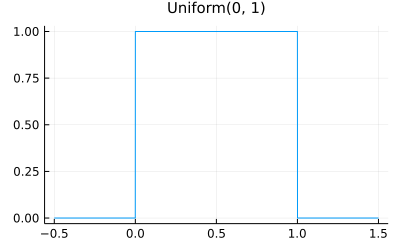

In [78]:
# 中心極限定理による収束が速い場合1
# distを左右対称な分布でかつ「おとなしめなもの」とする
dist = Uniform(0, 1)
@show skewness(dist) kurtosis(dist)
plot(dist, -0.5, 1.5; label="")
title!("Uniform(0, 1)")

In [79]:
# 分布distの独立同分布確率変数達(n個)の実現値(要するに乱数)を大量に(L個)生成
n = 10
L = 10^6
Xs = rand(dist, n, L) # Xs の s は X = (X_1, … , X_n) 達意味(複数という意味)

10×1000000 Matrix{Float64}:
 0.672547   0.0848108  0.524284  0.33867     …  0.0986632  0.705264  0.683651  0.764941
 0.337707   0.306371   0.582008  0.324429       0.681252   0.153969  0.680763  0.342673
 0.395861   0.178901   0.979898  0.366622       0.437717   0.640549  0.569048  0.7454
 0.0274189  0.252751   0.49977   0.677686       0.4238     0.836334  0.850832  0.283192
 0.390767   0.0892799  0.33393   0.436294       0.663443   0.274744  0.455814  0.672315
 0.190572   0.150144   0.988904  0.482095    …  0.870442   0.228277  0.556281  0.733509
 0.515534   0.710163   0.722886  0.725216       0.540596   0.111925  0.478272  0.13938
 0.977059   0.106152   0.312564  0.750852       0.232703   0.39544   0.677336  0.210737
 0.989893   0.227767   0.748116  0.177032       0.174567   0.632077  0.585337  0.0599564
 0.306079   0.944226   0.966805  0.00705588     0.940918   0.268038  0.301074  0.0494107

In [80]:
# Z_n = √n(X̄_n - μ)/σ を大量に計算
μ = mean(dist)
σ = std(dist)
Zns = [√n*(mean(X) - μ)/σ for X in eachcol(Xs)] # Zns はZ_n達という意味
first(Zns, 5)

5-element Vector{Float64}:
 -0.2153235809234101
 -2.1354980522614544
  1.817524904240514
 -0.7822010477082603
 -0.6391880610739005

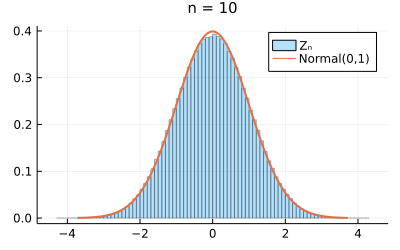

In [81]:
# Z_n達のヒストグラムと標準正規分布の密度函数を比較
histogram(Zns; norm=true, alpha=0.3, bin=100, label="Zₙ")
plot!(Normal(0, 1); label="Normal(0,1)", lw=2)
title!("n = $n")

In [82]:
# 以上の手続きを函数化
# さらに
#   * メモリアロケーションの節約と並列化による最適化
#   * 離散分布の場合にも対応
#   * 歪度と尖度を混合モデルの場合にも表示

function plot_central_limit_theorem(dist, n;
        L=10^6,
        μ = mean(dist),
        σ = std(dist),
        a = max(minimum(dist), μ - 5σ),
        b = min(maximum(dist), μ + 5σ),
        disttitle = distname(dist),
        bin = 100,
        kwargs...
    )
    println("skewness(dist) = ", myskewness(dist))
    println("kurtosis(dist) = ", mykurtosis(dist))
    
    # 分布distをプロット
    if dist isa DiscreteUnivariateDistribution
        P1 = bar(round(Int, a):round(Int, b), x -> pdf(dist, x), ; alpha=0.3, label="")
    else
        P1 = plot(x -> pdf(dist, x), a, b; label="")
    end
    title!(disttitle)

    # 分布distの独立同分布確率変数達(n個)の実現値(要するに乱数)を大量に(L個)生成し,
    # Z_n = √n(X̄_n - μ)/σ を大量に計算することを並列化で実行
    # このような計算には並列化が非常に有効である
    Zns = Vector{Float64}(undef, L)
    tmp = [Vector{Float64}(undef, n) for _ in 1:Threads.nthreads()]
    Threads.@threads for i in 1:L # Threads.@threads マクロで並列化
        X = rand!(dist, tmp[Threads.threadid()]) # rand!を使ってアロケーションを節約
        Zns[i] = √n*(mean(X) - μ)/σ
    end

    # Z達のヒストグラムと標準正規分布の密度函数を比較
    if dist isa DiscreteUnivariateDistribution
        summin = max(n*minimum(dist), round(n*μ - 6√n*σ))
        summax = min(n*maximum(dist), round(n*μ + 6√n*σ))
        sumran = summin-0.5:summax+0.5
        bin = @. √n*(sumran/n - μ)/σ
        P2 = histogram(Zns; norm=true, alpha=0.3, bin, label="Zₙ")
    else
        P2 = histogram(Zns; norm=true, alpha=0.3, bin, label="Zₙ")
    end
    plot!(Normal(0,1); label="Normal(0,1)", lw=2)
    title!("n = $n")

    plot(P1, P2; size=(800, 250), kwargs...)
end

plot_central_limit_theorem (generic function with 1 method)

skewness(dist) = 0.0
kurtosis(dist) = -1.2


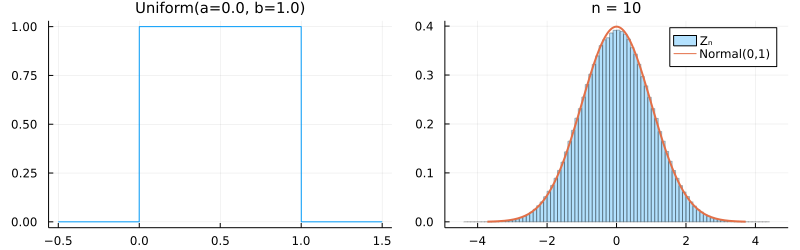

In [83]:
# 中心極限定理による収束が速い場合1の再現
plot_central_limit_theorem(Uniform(0, 1), 10; a=-0.5, b=1.5)

skewness(dist) = 0.0
kurtosis(dist) = -1.5


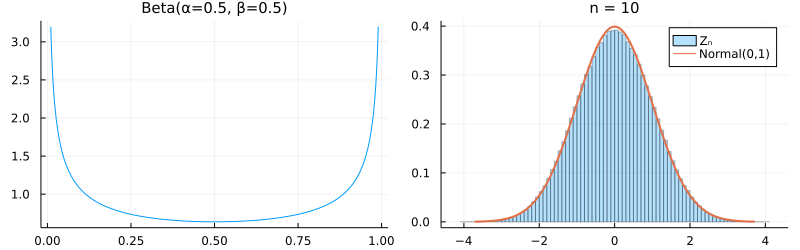

In [84]:
# 中心極限定理による収束が速い場合2
plot_central_limit_theorem(Beta(0.5, 0.5), 10; a=0.01, b=0.99)

skewness(dist) = 0.0
kurtosis(dist) = -2.0


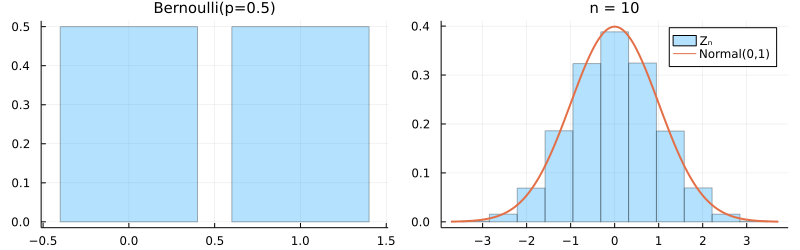

In [85]:
# 中心極限定理による収束が速い場合3
plot_central_limit_theorem(Bernoulli(0.5), 10)

skewness(dist) = 0.0
kurtosis(dist) = 3.0


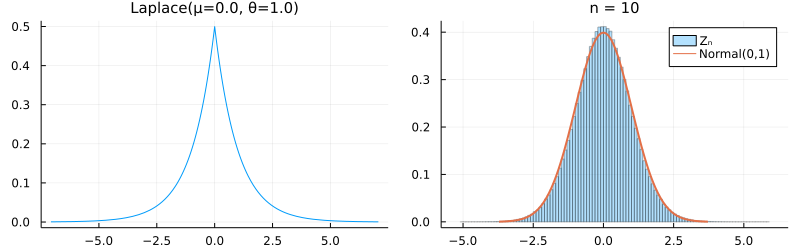

In [86]:
# 中心極限定理による収束が速い場合4
plot_central_limit_theorem(Laplace(), 10)

skewness(dist) = 1.1547005383792517
kurtosis(dist) = 2.0


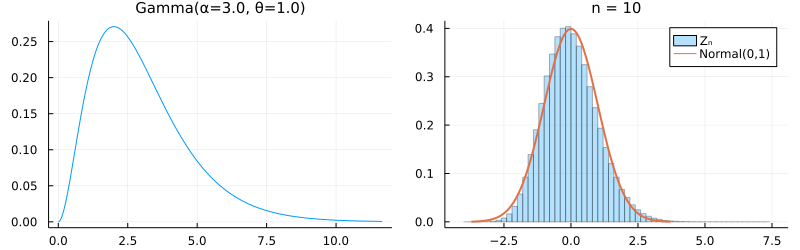

In [87]:
# 左右非対称な分布の場合1
plot_central_limit_theorem(Gamma(3, 1), 10)

skewness(dist) = 1.1547005383792517
kurtosis(dist) = -0.666666666666667


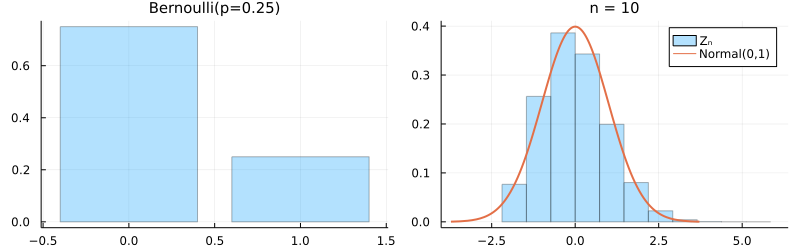

In [88]:
# 左右非対称な分布の場合2
plot_central_limit_theorem(Bernoulli(0.25), 10)

skewness(dist) = 1.0
kurtosis(dist) = 1.0


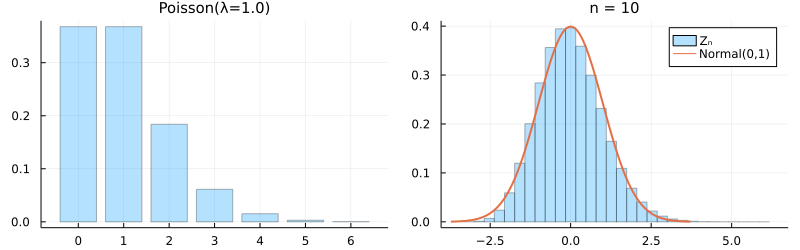

In [89]:
# 左右非対称な分布の場合3
plot_central_limit_theorem(Poisson(1), 10)

skewness(dist) = 2.0
kurtosis(dist) = 6.0


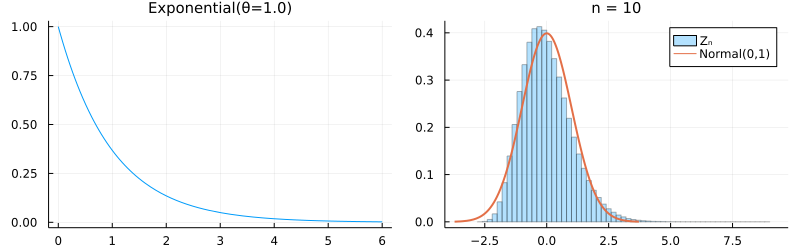

In [90]:
# 中心極限定理による収束が遅い場合1
# 左右の非対称性が大きな分布を試してみる
# 指数分布は左右の非対称性が大きな分布になっている
plot_central_limit_theorem(Exponential(), 10)

skewness(dist) = 2.0
kurtosis(dist) = 6.0


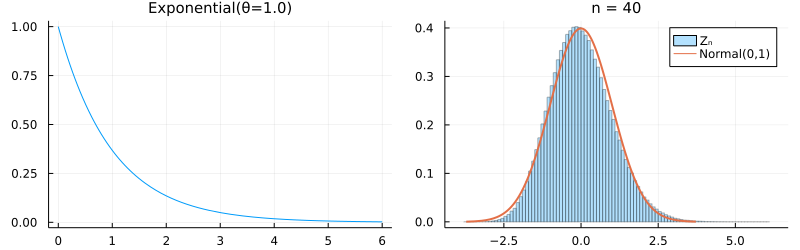

In [91]:
plot_central_limit_theorem(Exponential(), 40)

skewness(dist) = 2.0
kurtosis(dist) = 6.0


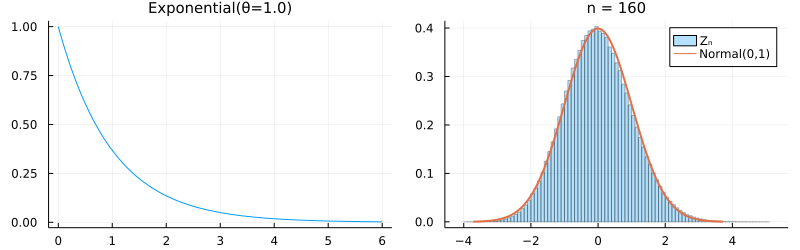

In [92]:
plot_central_limit_theorem(Exponential(), 160)

skewness(dist) = 2.8284271247461903
kurtosis(dist) = 12.0


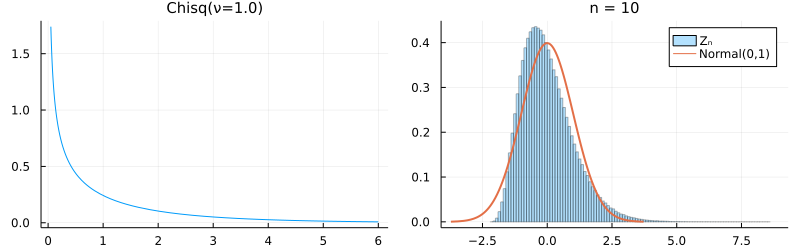

In [93]:
# 中心極限定理による収束が遅い場合2
# 自由度1のχ²分は左右の非対称性が指数分布よりも大きな分布になっている
plot_central_limit_theorem(Chisq(1), 10; a=0.05, b=6)

skewness(dist) = 2.8284271247461903
kurtosis(dist) = 12.0


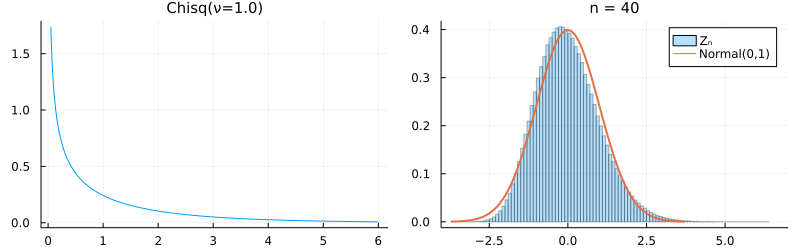

In [94]:
plot_central_limit_theorem(Chisq(1), 40; a=0.05, b=6)

skewness(dist) = 2.8284271247461903
kurtosis(dist) = 12.0


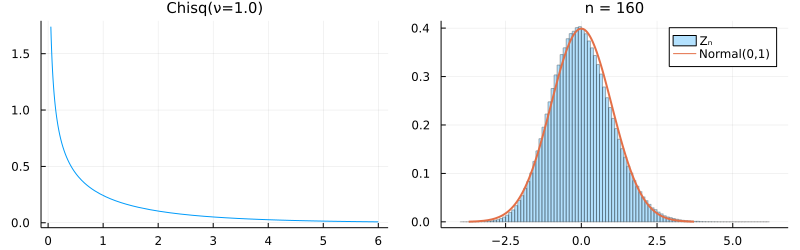

In [95]:
plot_central_limit_theorem(Chisq(1), 160; a=0.05, b=6)

以下で使う, 分布 `MixtureModel([Normal(0, 1), Normal(20, 1)], [0.95, 0.05])` の確率密度函数は次の形になる:

$$
p(x) = 0.95\,\frac{e^{-x^2/2}}{\sqrt{2\pi}} + 0.05\,\frac{e^{-(x-20)^2/2}}{\sqrt{2\pi}}.
$$

これは標準正規分布に割合が $5\%$ の極端な外れ値を付け加えた分布になっている.  何らかの原因で分布に極端な外れ値が混ざっている場合には中心極限定理を使うときに注意を要する.

このように確率密度函数が複数の正規分布の確率密度函数の一次結合になっている分布は __混合正規分布__ (mixture normal distribution)と呼ばれている.

skewness(dist) = 3.8236762415246486
kurtosis(dist) = 13.584999999990963


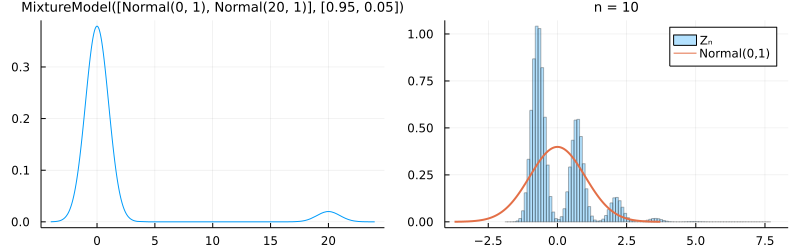

In [96]:
# 中心極限定理による収束が遅い場合3
# 以下のような分布distも左右の非対称性が大きな分布に分類される
dist = MixtureModel([Normal(0, 1), Normal(20, 1)], [0.95, 0.05])
disttitle = "MixtureModel([Normal(0, 1), Normal(20, 1)], [0.95, 0.05])"
titlefontsize = 9
a, b = -4, 24
plot_central_limit_theorem(dist, 10; a, b, disttitle, titlefontsize)

skewness(dist) = 3.8236762415246486
kurtosis(dist) = 13.584999999990963


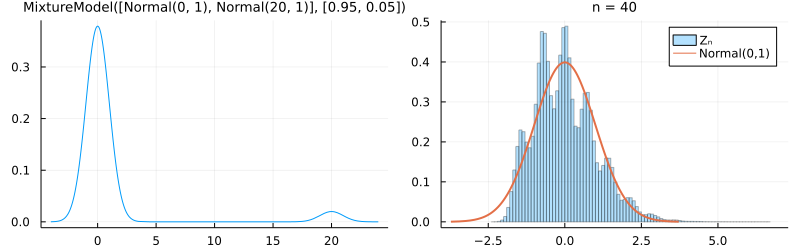

In [97]:
plot_central_limit_theorem(dist, 40; a, b, disttitle, titlefontsize)

skewness(dist) = 3.8236762415246486
kurtosis(dist) = 13.584999999990963


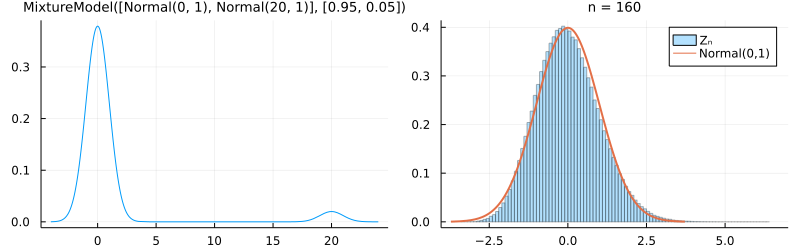

In [98]:
plot_central_limit_theorem(dist, 160; a, b, disttitle, titlefontsize)

skewness(dist) = 6.184877138632554
kurtosis(dist) = 110.9363921763115


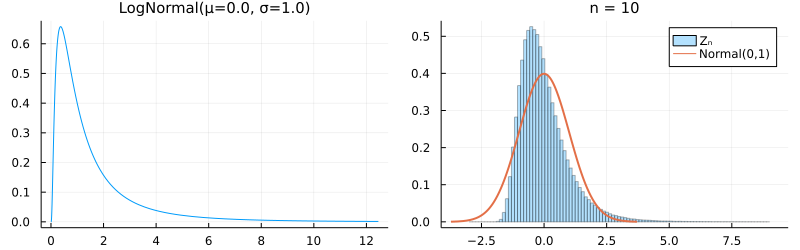

In [99]:
# 中心極限定理による収束が遅い場合4
# 対数正規分布は左右の非対称性が非常に大きな分布である
# 右側の裾が太く, 外れ値が出やすい
plot_central_limit_theorem(LogNormal(), 10; bin=range(-3, 9, 100))

skewness(dist) = 6.184877138632554
kurtosis(dist) = 110.9363921763115


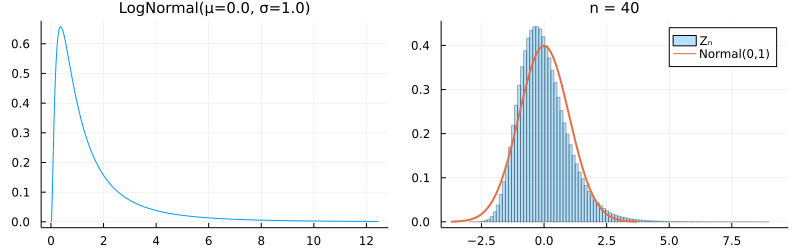

In [100]:
plot_central_limit_theorem(LogNormal(), 40; bin=range(-3, 9, 100))

skewness(dist) = 6.184877138632554
kurtosis(dist) = 110.9363921763115


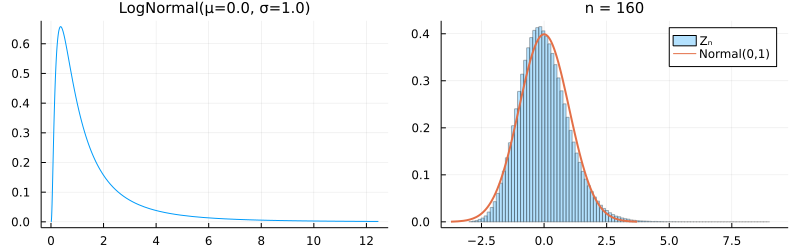

In [101]:
plot_central_limit_theorem(LogNormal(), 160; bin=range(-3, 9, 100))

## デルタ法

### 1次のデルタ法と2次のデルタ法

$X$ は平均 $\mu$, 分散 $\sigma^2$ を持つ確率変数であるとし, 滑らかな函数 $f(x)$ にそれを代入して得られる確率変数 $Y=f(X)$ について考える.

$x$ が $\mu$ に十分近ければ, $y = f(x)$ はその $x = \mu$ での接線

$$
y = f(\mu) + f'(\mu)(x - \mu)
$$

で近似される.  $\sigma$ が十分小さければ $X$ の分布の大部分は $\mu$ の近くに集まり, 確率変数 $Y = f(X)$ は確率変数 

$$
Y_1 = f(\mu) + f'(\mu)(X - \mu)
$$

で近似される. ゆえに

$$
\begin{aligned}
&
E[Y] \approx E[Y_1] = f(\mu) + f'(\mu)E[X - \mu] = f(\mu),
\\ &
\op{var}(Y) \approx \op{var}(Y_1) = f'(\mu)^2\sigma^2
\end{aligned}
$$

という近似が使える.  これを __1次のデルタ法__ と呼ぶことにする.

接線よりも精密に2次までの項を加えた

$$
y = f(\mu) + f'(\mu)(x - \mu) + \frac{f''(\mu)}{2}(x - \mu)^2
$$

は $y = f(x)$ のさらに良い近似になっている.  ゆえに, 確率変数 $Y=f(X)$ は, 上の $Y_1$ よりも,

$$
Y_2 = f(\mu) + f'(\mu)(X - \mu) + \frac{f''(\mu)}{2}(X - \mu)^2
$$

でより良く近似される.  この近似を使えば, $E[Y]\approx E[Y_1] = f(\mu)$ よりも精度が高い

$$
E[Y] \approx E[Y_2] = f(\mu) + \frac{f''(\mu)}{2}E[(x - \mu)^2] =
f(\mu) + \frac{f''(\mu)\sigma^2}{2}
$$

という近似が得られる. これを __2次のデルタ法__ と呼ぶことにする.

### おまけ: 2次のデルタ法使用時の近似分散と歪度と尖度に関する不等式

確率変数 $X$ の期待値を $\mu$, 分散を $\sigma^2$, 歪度を $\bk_3=E[((X-\mu)/\sigma)^3]$, 尖度を $\bk_4=E[((X-\mu)/\sigma)^4]-3$ と表し, 任意の実数 $a,b,c$ に対して,

$$
Y_2 = a + b(X-\mu) + c(X-\mu)^2
$$

とおく. このとき, $E[Y_2]=a+c\sigma^2$ となることは易しい. $Y_2$ の分散は以下のようにして求められる:

$$
\begin{aligned}
\op{var}(Y_2) &=
E[(Y_2 - (a+c\sigma^2))^2] =
E[(-c\sigma^2 + b(X-\mu) + c(X-\mu)^2)^2]
\\ &=
E[c^2\sigma^4 -2bc\sigma^2(X-\mu) + (b^2 - 2c^2\sigma^2)(X-\mu)^2 +
2bc(X-\mu)^3 + c^2(X-\mu)^4]
\\ &=
c^2\sigma^4 + (b^2 - 2c^2\sigma^2)\sigma^2 + 2bc\sigma^3\bk_3 + c^2\sigma^4(\bk_4 + 3)
\\ &=
b^2\sigma^2 + 2bc\sigma^3\bk_3 + c^2\sigma^4(\bk_4 + 2)
\\ &=
\begin{bmatrix} b\sigma & c\sigma^2 \end{bmatrix}
\begin{bmatrix}
1     & \bk_3 \\
\bk_3 & \bk_4 + 2 \\
\end{bmatrix}
\begin{bmatrix}
b\sigma \\
c\sigma^2 \\
\end{bmatrix}.
\end{aligned}
$$

これが任意の実数 $b,c$ について $0$ 以上になることから, この結果に現れた $2\times 2$ 行列の行列式は $0$ 以上になることがわかるので, 次の不等式が得られる:

$$
\bk_4 + 2 \ge \bk_3^2.
$$

「標本分布について」のノートで標本平均と不偏分散の分散共分散行列の非負性を用いて示した「歪度と尖度に関する不等式」が再び証明された.

__注意:__ 以上の証明は本質的に $X-\mu$ と $(X-\mu)^2$ の分散共分散行列が半正定値になることを使う証明と本質的に同じである.

### 問題: 2次のデルタ法の不偏分散の平方根の期待値の近似への応用

$X_1,X_2,\ldots,X_n$ を独立同分布な確率変数達であるとし, それらの標本平均と不偏分散を

$$
\bar{X} = \frac{1}{n}\sum_{i=1}^n X_i, \quad
S^2 = \frac{1}{n-1}\sum_{i=1}^n(X_i - \bar{X})^2
$$

と書き, $X_i$ 達共通の期待値を $\mu$, 共通の分散を $\sigma^2$ と書き, 共通の尖度を $\bk_4 = E[((X_i-\mu)/\sigma)^4]-3$ と書く.  このとき,  $S^2$ の期待値と分散は

$$
E[S^2] = \sigma^2, \quad
\op{var}(S^2) = \sigma^4\left(\frac{\bk_4}{n} + \frac{2}{n-1}\right)
$$

となるのであった.  これに2次のデルタ法を適用すると, $S = \sqrt{S^2}$ の期待値の $\sigma$ からのずれが近似的に

$$
E[S] \approx
\sigma - \frac{\op{var}(S^2)}{8\sigma^3} =
\sigma\left(1 - \frac{1}{8}\left(\frac{\bk_4}{n} + \frac{2}{n-1}\right)\right)
$$

のように表されることを確認せよ.

__解答例:__ $f(x) = \sqrt{x}$ とおくと,

$$
f'(x) = \frac{1}{2}x^{-1/2}, \quad
f''(x) = -\frac{1}{4}x^{-3/2}, \quad
f(\sigma^2) = \sigma,  \quad
f''(\sigma^2) = -\frac{1}{4\sigma^3}
$$

なので, $X = S^2$ に2次のデルタ法を適用すると,

$$
\begin{aligned}
E[S] &\approx
f(\sigma^2) + \frac{f''(\sigma^2)\op{var}(S^2)}{2} 
\\ &=
\sigma - \frac{\op{var}(S^2)}{8\sigma^3} =
\sigma\left(1 - \frac{1}{8}\left(\frac{\bk_4}{n} + \frac{2}{n-1}\right)\right).
\end{aligned}
$$

__解答終__

__注意:__ 不偏分散 $S^2$ は分散 $\sigma^2$ の不偏推定量だが, その平方根 $S=\sqrt{S^2}$ は標準偏差 $\sigma$ の不偏推定量にならないことが上の問題からわかる. $\op{var}(S^2) \ge 0$ なので $E[S]$ の値は $\sigma$ よりも少し小さくなる.

__注意:__ これを理由に $S=\sqrt{S^2}$ は標準偏差の推定量として不適切であると考えては __いけない__. 推定量が不偏であること自体に特別に優先度が高い価値があるわけではない.  推定法に不偏性の条件を課すと誤差が増えてしまう場合がある.

In [102]:
function check_deltamethod_for_S(dist, n; L=10^7)
    σ = std(dist)
    ku = mykurtosis(dist)
    @show dist
    println("kurtosis = ", ku)
    @show n
    
    S = Vector{Float64}(undef, L)
    tmp = [Vector{Float64}(undef, n) for _ in 1:Threads.nthreads()]
    Threads.@threads for i in 1:L
        X = rand!(dist, tmp[Threads.threadid()])
        S[i] = std(X)
    end
    println("approximation = ", σ*(1 - (1/8)*(ku/n + 2/(n-1))))
    println("mean(S) =       ", mean(S))
    println("σ =             ", σ)
end

check_deltamethod_for_S (generic function with 1 method)

In [103]:
check_deltamethod_for_S(Normal(2, 3), 10)

dist = Normal{Float64}(μ=2.0, σ=3.0)
kurtosis = 0.0
n = 10
approximation = 2.9166666666666665
mean(S) =       2.9181035910662665
σ =             3.0


In [104]:
check_deltamethod_for_S(Uniform(), 10)

dist = Uniform{Float64}(a=0.0, b=1.0)
kurtosis = -1.2
n = 10
approximation = 0.28498650787499025
mean(S) =       0.28475298814557065
σ =             0.28867513459481287


In [105]:
check_deltamethod_for_S(Gamma(4, 3), 10)

dist = Gamma{Float64}(α=4.0, θ=3.0)
kurtosis = 1.5
n = 10
approximation = 5.720833333333333
mean(S) =       5.757022288766159
σ =             6.0


In [106]:
check_deltamethod_for_S(Bernoulli(0.4), 10)

dist = Bernoulli{Float64}(p=0.4)
kurtosis = -1.833333333333333
n = 10
approximation = 0.4875165001955964
mean(S) =       0.4859214468305372
σ =             0.4898979485566356


In [107]:
check_deltamethod_for_S(LogNormal(), 10; L=10^6)

dist = LogNormal{Float64}(μ=0.0, σ=1.0)
kurtosis = 110.9363921763115
n = 10
approximation = -0.895778896909659
mean(S) =       1.7171498580585198
σ =             2.1611974158950877


In [108]:
check_deltamethod_for_S(LogNormal(), 100; L=10^6)

dist = LogNormal{Float64}(μ=0.0, σ=1.0)
kurtosis = 110.9363921763115
n = 100
approximation = 1.856045541537819
mean(S) =       2.045538958724601
σ =             2.1611974158950877


In [109]:
check_deltamethod_for_S(LogNormal(), 1000; L=10^6)

dist = LogNormal{Float64}(μ=0.0, σ=1.0)
kurtosis = 110.9363921763115
n = 1000
approximation = 2.1306871451883986
mean(S) =       2.140192566082289
σ =             2.1611974158950877


### 問題: 1次のデルタ法の正規分布近似への応用

確率変数 $X$ が近似的に正規分布 $\op{Normal}(\mu,\sigma)$ に従っているとき, 滑らかな函数 $f(x)$ に対して, $\sigma$ が十分に小さければ, 確率変数 $Y = f(X)$ は近似的に正規分布 $\op{Normal}(f(\mu), |f'(\mu)|\sigma)$ に従うことを示せ.

__解答例:__ $x$ が $\mu$ に十分近ければ $y = f(x)$ は $x=\mu$ における接線 $y = f(\mu) + f'(\mu)(x - \mu)$ で近似される.  $\sigma$ が十分に小さければ確率変数 $X$ の分布の大部分は $\mu$ の十分近くに留まる. 以上の状況のもとで, 確率変数 $Y = f(X)$ は確率変数 $Y_1 = f(\mu) + f'(\mu)(X - \mu)$ で近似される.  $X$ が正規分布 $\op{Normal}(\mu,\sigma)$ に近似的に従っていると仮定しているので, そのアフィン変換である $Y_1$ も近似的に正規分布に従い, その期待値と分散は

$$
E[Y_1] = f(\mu) + f'(\mu)E[X-\mu] \approx f(\mu), \quad
\op{var}(Y_1) = f'(\mu)^2\op{var}(X) \approx f'(\mu)^2\sigma^2
$$

となる.  以上をまとめると, $Y$ が近似的に正規分布 $\op{Normal}(f(\mu), |f'(\mu)|\sigma)$ に従うことがわかる.

__解答終__

__注意:__ デルタ法を使うと, 正規分布で近似される確率変数から正規分布に近似的に従う別の確率変数を作れる.  中心極限定理による正規分布近似はデルタ法を使えば大幅に拡張される.  以上では一変数函数 $f(x)$ に正規分布に近似的に従う確率変数 $X$ を代入する場合のみを扱ったが, 多変数函数に複数の正規分布に近似的に従う確率変数達を代入する場合も同じように一次近似で考えればよい.

### 問題: 1次のデルタ法による分布の逆数の近似

正値の確率変数 $X$ は正規分布 $\op{Normal}(\mu, \sigma)$ に近似的に従っていると仮定し, $\sigma/\mu$ は十分に小さいと仮定する.  このとき, $Y = 1/X$ が正規分布 $\op{Normal}(1/\mu, \sigma/\mu^2)$ に近似的に従うことを示せ.

__解答例:__ $f(x)=1/x$ とおくと,

$$
f(x) = \frac{1/\mu}{1 + (x/\mu - 1)} =
\frac{1}{\mu}\left(1 - \left(\frac{x}{\mu}-1\right) + \left(\frac{x}{\mu}-1\right)^2 - \cdots\right)
$$

なので, $y = f(x)$ は $x/\mu$ が $1$ に近ければ, その $x=\mu$ での接線

$$
y =
\frac{1}{\mu}\left(1 - \left(\frac{x}{\mu}-1\right)\right) =
\frac{1}{\mu} - \frac{x - \mu}{\mu^2}
$$

で近似される. $\sigma/\mu$ が十分に小さければ $X/\mu$ の分布の大部分は $1$ の近くに留まる. ゆえに $Y=1/X$ の分布は $Y_1 = 1/\mu - (X-\mu)/\mu^2$ の分布で近似される.  このことから, $Y=1/X$ が平均 $1/\mu$, 分散 $\sigma^2/\mu^4$ の正規分布に近似的に従うことがわかる. 

__解答終__

### 例: 自由度が大きなχ²分布の逆数の近似

例えば, $X \sim \op{Chisq}(\nu)$ のとき, $E[X]=\nu$, $\op{var}(X)=2\nu$ であり, $\nu$ が大きなとき $X$ は近似的に平均 $\mu=\nu$, 分散 $\sigma^2=2\nu$ の正規分布に近似的に従い,  $\nu$ が大きなとき $\sigma/\mu = \sqrt{2/\nu}$ の値は小さくなる.  ゆえに上の問題の結果より, $1/X$ は平均 $1/\mu = 1/\nu$, 分散 $\sigma^2/\mu^4 = 2/\nu^3$ の正規分布に近似的に従う.  

__注意:__ $X\sim\op{Chisq}(\nu) = \op{Gamma}(\nu/2, 2)$ のとき, $1/X\sim\op{InverseGamma}(\nu/2, 1/2)$ なので, 

$$
\begin{aligned}
&
E[1/X] = \frac{1/2}{\nu/2-1} = \frac{1}{\nu-2} \approx \frac{1}{\nu},
\\ &
\op{var}(1/X) = \frac{(1/2)^2}{(\nu/2-1)^2(\nu/2-2)} =
\frac{2}{(\nu-2)^2(\nu-4)} \approx \frac{2}{\nu^3}.
\end{aligned}
$$

In [110]:
InverseChisq(ν) = InverseGamma(ν/2, 1/2)

function plot_invchisq(ν)
    xlim = (max(0, 1/ν - 4√(2/ν^3)), 1/ν + 6√(2/ν^3))
    plot(InverseChisq(ν), xlim...; label="InverseChisq(ν=$ν)")
    plot!(Normal(1/ν, √(2/ν^3)); label="Normal(1/ν, √(2/ν³))", ls=:dash)
    plot!(; legend=:outertop)
end

plot_invchisq (generic function with 1 method)

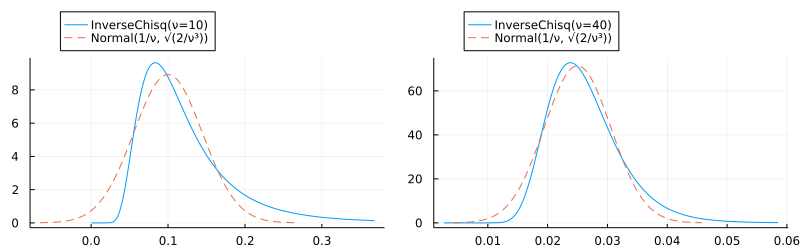

In [111]:
plot(plot_invchisq.((10, 40))...; size=(800, 250), layout=(1, 2))

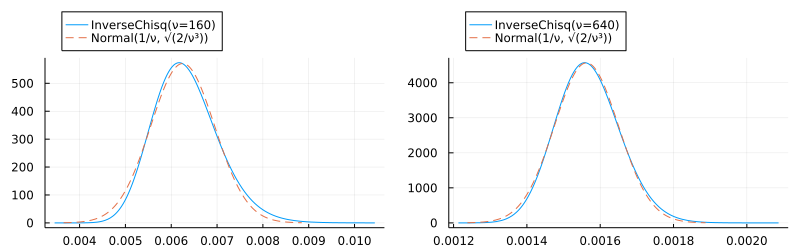

In [112]:
plot(plot_invchisq.((160, 640))...; size=(800, 250), layout=(1, 2))

### 問題: デルタ法による分布の対数の近似

正値の確率変数 $X$ は正規分布 $\op{Normal}(\mu, \sigma)$ に近似的に従っていると仮定し, $\sigma/\mu$ は十分に小さいと仮定する.  このとき, $Y = \log X$ が正規分布 $\op{Normal}(\log \mu, \sigma/\mu)$ に近似的に従うことを示せ.

__解答例:__ $f(x)=\log x$ とおくと,

$$
f(x) = \log\nu\left(1 + \left(\frac{x}{\mu}-1\right)\right) =
\log\mu + \left(\frac{x}{\mu}-1\right) - \frac{1}{2}\left(\frac{x}{\mu}-1\right)^2 + \cdots
$$

なので, $y = f(x)$ は $x/\mu$ が $1$ に近ければ, その $x=\mu$ での接線

$$
y = \log\mu + \left(\frac{x}{\mu}-1\right) =
\log\mu + \frac{x-\mu}{\mu}
$$

で近似される. $\sigma/\mu$ が十分に小さければ $X/\mu$ の分布の大部分は $1$ の近くに留まる. ゆえに $Y=\log X$ の分布は $Y_1 = \log\mu + (X-\mu)/\mu$ の分布で近似される.  このことから, $Y=\log X$ が平均 $\log\mu$, 分散 $\sigma^2/\mu^2$ の正規分布に近似的に従うことがわかる. 

__解答終__

__注意:__ 正値の確率変数の分布は対数を取ることによって左右の非対称性が緩和されて, 正規分布近似がより正確になる場合がある(次の節の例を見よ). 分布の非対称性を補正して正規分布近似をより正確にする工夫は色々研究されている.

### 例: 自由度が大きなχ²分布の対数の近似

例えば, $X \sim \op{Chisq}(\nu)$ のとき, $E[X]=\nu$, $\op{var}(X)=2\nu$ であり, $\nu$ が大きなとき $X$ は近似的に平均 $\mu=\nu$, 分散 $\sigma^2=2\nu$ の正規分布に近似的に従い,  $\nu$ が大きなとき $\sigma/\mu = \sqrt{2/\nu}$ の値は小さくなる.  ゆえに上の問題の結果より, $\log X$ は平均 $\log\mu = \log\nu$, 分散 $\sigma^2/\mu^2 = 2/\nu$ の正規分布に近似的に従う.

この場合には余り大きくない自由度 $\nu$ におけるχ²分布の左右の非対称性が対数を取ることによって緩和され, 正規分布による近似の精度が高まる.

In [113]:
pdf_logchisq(ν, y) = pdf(Chisq(ν), exp(y))*exp(y)

function plot_logchisq(ν)
    xlim = (max(0, ν - 4√(2ν)), ν + 4√(2ν))
    P0 = plot(Chisq(ν), xlim...; label="Chisq(ν=$ν)")
    plot!(Normal(ν, √(2ν)); label="Normal(ν, √(2ν))", ls=:dash)
    plot!(; legend=:outertop)
    
    xlim = (log(ν) - 5√(2/ν), log(ν) + 4√(2/ν))
    P1 = plot(y -> pdf(Chisq(ν), exp(y))*exp(y), xlim...; label="LogChisq(ν=$ν)")
    plot!(Normal(log(ν), √(2/ν)); label="Normal(log ν, √(2/ν))", ls=:dash)
    plot!(; legend=:outertop)
    
    plot(P0, P1; size=(800, 250))
end

plot_logchisq (generic function with 1 method)

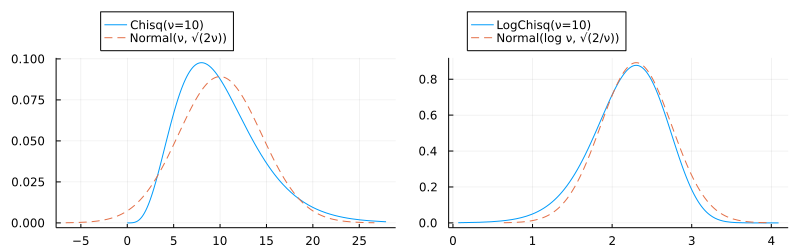

In [114]:
plot_logchisq(10)

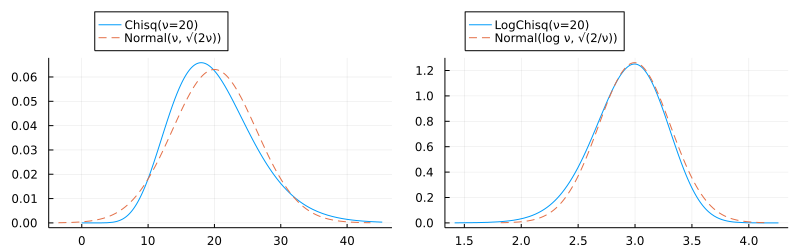

In [115]:
plot_logchisq(20)

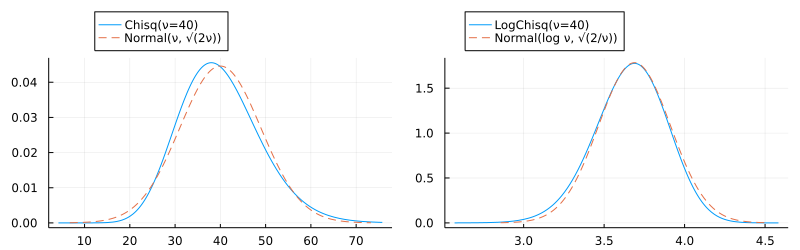

In [116]:
plot_logchisq(40)

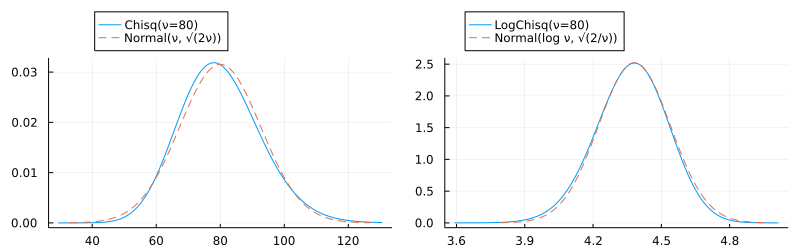

In [117]:
plot_logchisq(80)

### 問題: ベータ分布の正規分布近似

確率変数達 $X,Y$ は独立であり, $X\sim\op{Gamma}(\alpha,1)$, $Y\sim\op{Gamma}(\beta,1)$ を満たしていると仮定する.  このとき $T = X/(X+Y)$ とおくと, $T\sim \op{Beta}(\alpha,\beta)$ となるのであった.  $\alpha$, $\beta$ が大きなとき, $X$, $Y$ の分布はそれぞれ $\op{Normal}(\alpha, \sqrt{\alpha})$, $\op{Normal}(\beta, \sqrt{\beta})$ に近似的に従う.  2変数函数 $f(x,y)=x/(x+y)$ に1次のデルタ法を適用して, $\alpha,\beta$ が大きなとき, $T=X/(X+Y)\sim \op{Beta}(\alpha,\beta)$ が

$$
\op{Normal}\left(\frac{\alpha}{\alpha+\beta}, \sqrt{\frac{\alpha\beta}{(\alpha+\beta)^3}}\right)
$$

に近似的に従うことを示せ.

__注意:__ $T\sim \op{Beta}(\alpha,\beta)$ の正確な期待値と分散は次のようになる:

$$
E[T] = \frac{\alpha}{\alpha+\beta}, \quad
\op{var}(T) = \frac{\alpha\beta}{(\alpha+\beta)^2(\alpha+\beta+1)}.
$$

__解答例:__ $f(x,y) = x/(x+y) = 1 - y/(x+y)$ を偏微分すると,

$$
\begin{aligned}
&
f_x(x,y) = \frac{y}{(x+y)^2}, \quad
f_y(x,y) = \frac{-x}{(x+y)^2},
\\ &
f_{xx}(x,y) = \frac{-2y}{(x+y)^3}, \quad
f_{xy}(x,y) = \frac{x-y}{(x+y)^3}, \quad
f_{yy}(x,y) = \frac{2x}{(x+y)^3}
\end{aligned}
$$

なので, 

$$
\begin{aligned}
T &= \frac{X}{X+Y} = f(X,Y)
\\ &=
f(\alpha, \beta) + f_x(\alpha,\beta)(X-\alpha) + f_y(\alpha,\beta)(Y-\beta)
\\ &+
\frac{1}{2}\left(
f_{xx}(\alpha,\beta)(X-\alpha)^2 +
2f_{xy}(\alpha,\beta)(X-\alpha)(Y-\beta) +
f_{yy}(\alpha,\beta)(Y-\beta)^2
\right) + \cdots
\\ &=
\frac{\alpha}{\alpha+\beta} +
\frac{\beta}{(\alpha+\beta)^2}(X-\alpha) +
\frac{-\alpha}{(\alpha+\beta)^2}(Y-\beta)
\\ &+
\frac{-\beta}{(\alpha+\beta)^3}(X-\alpha)^2 +
\frac{\alpha-\beta}{(\alpha+\beta)^3}(X-\alpha)(Y-\beta) +
\frac{\alpha}{(\alpha+\beta)^3}(Y-\beta)^2
+ \cdots
\\ &=
\frac{\alpha}{\alpha+\beta} +
\frac{\beta}{\alpha+\beta}\frac{X-\alpha}{\alpha+\beta} +
\frac{-\alpha}{\alpha+\beta}\frac{Y-\beta}{\alpha+\beta}
\\ &+
\frac{-\beta}{\alpha+\beta}\left(\frac{X-\alpha}{\alpha+\beta}\right)^2 +
\frac{\alpha-\beta}{\alpha+\beta}
\frac{X-\alpha}{\alpha+\beta}\frac{Y-\beta}{\alpha+\beta} +
\frac{\alpha}{\alpha+\beta}\left(\frac{Y-\beta}{\alpha+\beta}\right)^2
+ \cdots.
\end{aligned}
$$

ゆえに, $\alpha, \beta$ の両方が大きいならば(より正確に言えば $\alpha=N\mu$, $\beta=N(1-\mu$, $0<\mu<1$ で $N$ が大きいならば), 

$$
\frac{\op{std}(X)}{\alpha+\beta} = \frac{\sqrt{\alpha}}{\alpha+\beta}, \quad
\frac{\op{std}(Y)}{\alpha+\beta} = \frac{\sqrt{\beta}}{\alpha+\beta}
$$

がどちらも小さくなり, 1次近似

$$
T \approx
\frac{\alpha}{\alpha+\beta} +
\frac{\beta}{(\alpha+\beta)^2}(X-\alpha) +
\frac{-\alpha}{(\alpha+\beta)^2}(Y-\beta)
$$

が有効になり,

$$
\begin{aligned}
&
E[T] \approx \frac{\alpha}{\alpha+\beta},
\\ &
\op{var}(T) \approx
\frac{\beta^4 \op{var}(X)}{(\alpha+\beta)^4} +
\frac{\alpha^2 \op{var}(Y)}{(\alpha+\beta)^4} =
\frac{\beta^2\alpha + \alpha^2\beta}{(\alpha+\beta)^4} =
\frac{\alpha\beta}{(\alpha+\beta)^3}.
\end{aligned}
$$

さらにそのとき, $X$, $Y$ の分布は正規分布で近似されるので, $T$ の分布も正規分布で近似される.

__解答終__

In [118]:
@vars x y
expr = x/(x+y)
[
    expr
    diff(expr, x).simplify()
    diff(expr, y).simplify()
    ;;
    diff(expr, x, x).simplify()
    diff(expr, x, y).simplify()
    diff(expr, y, y).simplify()
]

3×2 Matrix{Sym}:
    x/(x + y)     -2*y/(x + y)^3
  y/(x + y)^2  (x - y)/(x + y)^3
 -x/(x + y)^2      2*x/(x + y)^3

__注意:__ $X_1,X_2,\ldots,X_n$ が独立同分布な確率変数達で $X_i\sim\op{Gamma}(\alpha/n, \theta)$ のとき, それらの和もガンマ分布に $X_1+X_2+\cdots+X_n \sim \op{Gamma}(\alpha, \theta)$ と従う.  この事実と中心極限定理から, $\alpha$ が大きなときのガンマ分布 $\op{Gamma}(\alpha,\theta)$ が正規分布 $\op{Normal}(\alpha, \sqrt{\alpha\theta^2})$ で近似されることが導かれる.

ゆえに, 上の問題の結果は, パラメータの値が大きなときのベータ分布が正規分布で近似されることが, ガンマ分布に関する中心極限定理の帰結になっていることを示していることになる.

ベータ分布の確率密度函数の形から直接的に正規分布近似を導くことも易しい(次の節の問題を見よ).

__注意終__

In [119]:
function plot_gammanormal(α, θ)
    m, s = α*θ, √(α*θ^2)
    xlim = (m - 4s, m + 4s)
    plot(Gamma(α, θ), xlim...; label="Gamma(α,θ)")
    plot!(Normal(m, s); label="normal approx", ls=:dash)
    #plot!(; legend=:outertop)
    title!("α = $α, θ = $θ")
end

plot_gammanormal (generic function with 1 method)

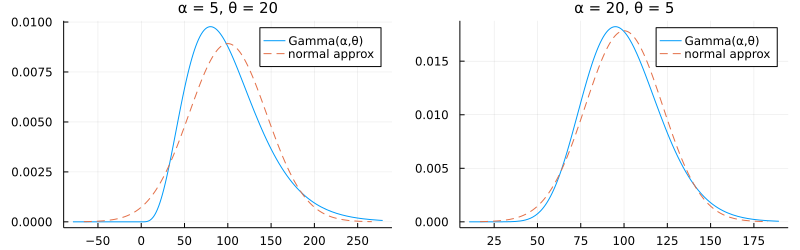

In [120]:
plot(plot_gammanormal(5, 20), plot_gammanormal(20, 5); size=(800, 250))

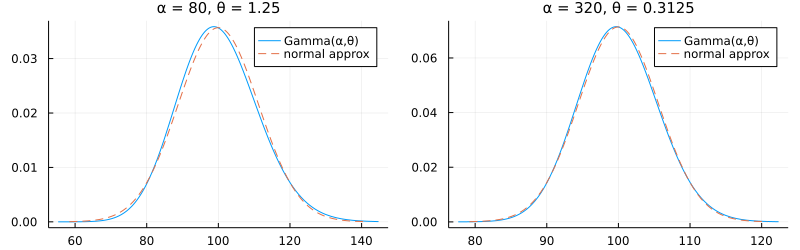

In [121]:
plot(plot_gammanormal(80, 1.25), plot_gammanormal(320, 0.3125); size=(800, 250))

In [122]:
function plot_betanormal(α, β)
    m, s = α/(α+β), √(α*β/(α+β)^3)
    xlim = (m - 4s, m + 4s)
    plot(Beta(α, β), xlim...; label="Beta(α,β)")
    plot!(Normal(m, s); label="normal approx", ls=:dash)
    #plot!(; legend=:outertop)
    title!("α = $α, β = $β")
end

plot_betanormal (generic function with 1 method)

In [123]:
[3, 7] .* (4 .^ (0:3))'

2×4 Matrix{Int64}:
 3  12   48  192
 7  28  112  448

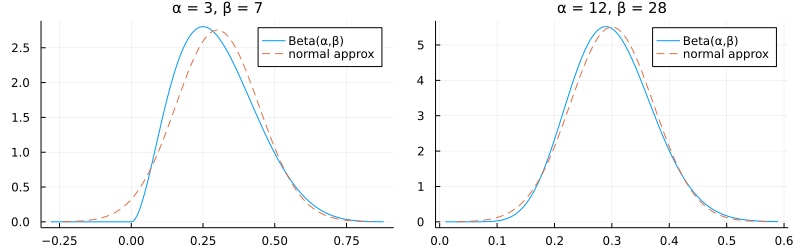

In [124]:
plot(plot_betanormal(3, 7), plot_betanormal(12, 28); size=(800, 250))

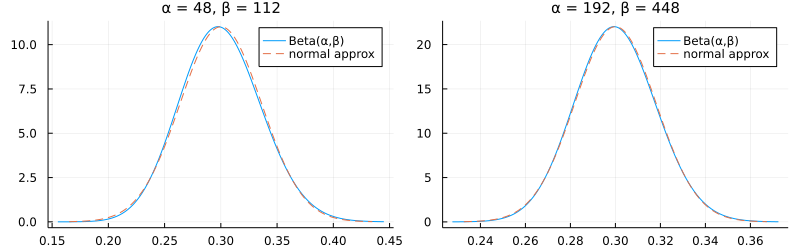

In [125]:
plot(plot_betanormal(48, 112), plot_betanormal(192, 448); size=(800, 250))

### 問題: ベータ分布の正規分布近似の直接的証明

$\alpha$, $\beta$ が大きなときにベータ分布 $\op{Beta}(\alpha, \beta)$ が正規分布で近似されることを, その確率密度函数の具体形を使って直接証明せよ.

__解答例:__ $0<\mu<1$ と仮定し,

$$
\alpha = N\mu, \quad
\beta = N(1-\mu), \quad
t = \mu + \frac{x}{\sqrt{N}}
$$

とおいて, $N$ を大きくすると, Stirlingの公式より,

$$
\begin{aligned}
&
\frac{1}{B(\alpha,\beta)} =
\frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)} =
\frac{\Gamma(N)}{\Gamma(N\mu)\Gamma(N(1-\mu))}
\\ &\sim
\frac{N\mu\;N(1-\mu)}{N}
\frac
{N^N e^{-N} \sqrt{2\pi N}}
{
(N\mu)^{N\mu} e^{-N\mu} \sqrt{2\pi N\mu}\;
(N(1-\mu))^{N(1-\mu)} e^{-N(1-\mu)} \sqrt{2\pi N(1-\mu)}
}
\\ &=
\frac
{N\mu(1-\mu)}
{
\mu^{N\mu}\sqrt{2\pi N\mu}\;
(1-\mu)^{N(1-\mu)} \sqrt{1-\mu}
}
\\ &=
\frac{1}{\sqrt{2\pi\mu(1-\mu)}}
\frac{\sqrt{N}}{\mu^{N\mu-1} (1-\mu)^{N(1-\mu)-1}}.
\end{aligned}
$$

そして

$$
\begin{aligned}
&
N\mu\log\left(1+\frac{x}{\sqrt{N}\,\mu}\right)
\\ &=
N\mu\left(\frac{x}{\sqrt{N}\,\mu} - \frac{x^2}{2N\mu^2} + O(N^{-3/2})\right)
\\ &=
\sqrt{N}\,x - \frac{x^2}{2\mu} + O(N^{-1/2}),
\\ &
N(1-\mu)\log\left(1-\frac{x}{\sqrt{N}(1-\mu)}\right) 
\\ &=
N(1-\mu)\left(-\frac{x}{\sqrt{N}(1-\mu)} - \frac{x^2}{2N(1-\mu)^2} + O(N^{-3/2})\right)
\\ &= -
\sqrt{N}\,x - \frac{x^2}{2(1-\mu)} + O(N^{-1/2}),
\\ &
\frac{x^2}{2\mu} + \frac{x^2}{2(1-\mu)} = \frac{x^2}{2\mu(1-\mu)}
\end{aligned}
$$

より, 以下が成立することがわかる:

$$
\begin{aligned}
&
t^{\alpha-1}(1-t)^{\beta-1}\,dt
\\ &=
\left(\mu + \frac{x}{\sqrt{N}}\right)^{N\mu-1}
\left(1 - \mu - \frac{x}{\sqrt{N}}\right)^{N(1-\mu)-1}
\frac{dx}{\sqrt{N}}
\\ &=
\mu^{N\mu-1} (1-\mu)^{N(1-\mu)-1}
\left(1+\frac{x}{\sqrt{N}\,\mu}\right)^{N\mu-1}
\left(1-\frac{x}{\sqrt{N}(1-\mu)}\right) ^{N(1-\mu)-1}
\frac{dx}{\sqrt{N}}
\\ &=
\frac{\mu^{N\mu-1} (1-\mu)^{N(1-\mu)-1}}{\sqrt{N}}
\exp\left(-\frac{x^2}{2\mu(1-\mu)}\right) (1 + O(n^{-1/2}))
\,dx.
\end{aligned}
$$

以上の結果より,

$$
\begin{aligned}
\frac{t^{\alpha-1}(1-t)^{\beta-1}\,dt}{B(\alpha,\beta)}\,dt =
\frac{1}{\sqrt{2\pi\mu(1-\mu)}}
\exp\left(-\frac{x^2}{2\mu(1-\mu)}\right) (1 + O(n^{-1/2}))
\,dx.
\end{aligned}
$$

この公式はベータ分布が上で導入した $x$ 座標では平均 $0$, 分散 $\mu(1-\mu)$ の正規分布で近似されることを意味している.

__解答終__

__注意:__ $\alpha = N\mu$, $\beta = N(1-\mu)$, $T\sim\op{Beta}(\alpha,\beta)$ のとき,

$$
E[T] = \frac{\alpha}{\alpha+\beta} = \mu, \quad
\op{var}(T) =
\frac{\alpha\beta}{(\alpha+\beta)^2(\alpha+\beta+1)} =
\frac{\mu(1-\mu)}{N+1}
$$

なので, $X = \sqrt{N}(T - \mu)$ とおくと, $N\to\infty$ のとき,

$$
E[X] = 0, \quad
\op{var}(X) = N\op{var}(T) = \frac{N}{N+1}\mu(1-\mu) \to \mu(1-\mu).
$$

この $\mu(1-\mu)$ が上の解答例の中で登場した正規分布の分散である.

## 各種の確率分布の正規分布近似

以下に挙げるもの以外にも正規分布で近似される確率分布はたくさんある.  各自, 研究してノートにまとめておくとよいだろう.  具体的な数値例をコンピュータで作っておくと, どのようなときにどれだけ近似がうまく行くかについての「土地勘」が得られる.

In [126]:
function plot_normalapprox(dist; title=distname(dist), kwargs...)
    μ, σ = mean(dist), std(dist)
    normal = Normal(μ, σ)
    xlim = (μ - 4.5σ, μ + 4.5σ)
    plot(x -> mypdf(dist, x), xlim...; label="")
    plot!(normal, xlim...; label="normal approx", ls=:dash)
    plot!(; title, kwargs...)
end

plot_normalapprox (generic function with 1 method)

In [127]:
# 2022-05-13: Distributions.jl で BetaNegativeBinomial(k, α, β)
# がまだ実装されていないので自前で必要最小限の実装を行う.

module O

using Distributions
using SpecialFunctions

struct BetaNegativeBinomial{T} <: DiscreteUnivariateDistribution
    k::T
    α::T
    β::T
end

function logpdf_betanegbin(x, k, α, β)
    m = round(x)
    m < 0 && return -Inf
    (loggamma(k+m) - loggamma(m+1) - loggamma(k) + logbeta(α+k, β+m) - logbeta(α, β))
end

function Distributions.logpdf(dist::BetaNegativeBinomial, x)
    (; k, α, β) = dist
    logpdf_betanegbin(x, k, α, β)
end

function Distributions.mean(dist::BetaNegativeBinomial)
    (; k, α, β) = dist
    k*β/(α - 1)
end

function Distributions.var(dist::BetaNegativeBinomial)
    (; k, α, β) = dist
    k*(α+k-1)*β*(α+β-1)/((α-1)^2*(α-2))
end

end

Main.O

### 二項分布の正規分布近似

$0 < p < 1$ でありかつ,

$$
(X_1,\ldots,X_n)\sim \op{Bernoulli}(p)^n = \op{Binomial}(1, p)^n
$$

であるとき,

$$
K_n = X_1 + \cdots + X_n \sim \op{Binomial}(n, p)
$$

であり, 中心極限定理によって独立同分布な確率変数達の和の分布が正規分布で近似されることより, $n$ が大きなとき, $K_n$ の分布は正規分布で近似される.

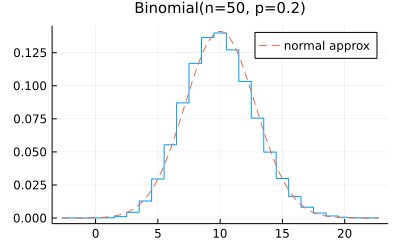

In [128]:
plot_normalapprox(Binomial(50, 0.2))

### 負の二項分布の正規分布近似

$0 < p < 1$ でありかつ,

$$
(Y_1,\ldots,Y_k)\sim \op{Geometric}(p) = \op{NegativeBinomial}(1, p)^k
$$

であるとき,

$$
N_k = Y_1 + \cdots + Y_k \sim \op{NegativeBinomial}(k, p)
$$

であり, 中心極限定理によって独立同分布な確率変数達の和の分布が正規分布で近似されることより, $k$ が大きなとき, $N_k$ の分布は正規分布で近似される.

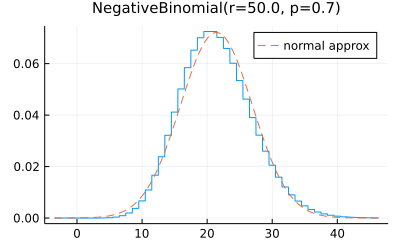

In [129]:
plot_normalapprox(NegativeBinomial(50, 0.7))

### Poisson分布の正規分布近似

$\lambda > 0$ でありかつ,

$$
(X_1, \ldots, X_n) \sim \op{Poisson}(\lambda/n)^n
$$

であるとき,

$$
K = X_1 + \cdots + X_n \sim \op{Poisson}(\lambda)
$$

であり, 中心極限定理によって独立同分布な確率変数達の和の分布が正規分布で近似されることより,  $\lambda$ が大きなとき, $K$ の分布は正規分布で近似される.

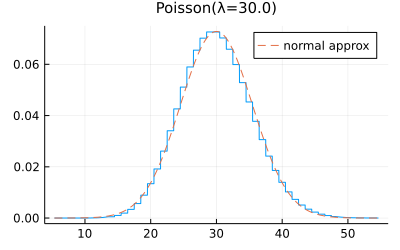

In [130]:
plot_normalapprox(Poisson(30))

### ガンマ分布の正規分布近似

$\alpha > 0$, $\theta > 0$ でありかつ,

$$
(Y_1,\ldots,Y_n) \sim \op{Gamma}(\alpha/n, \theta)
$$

であるとき, 

$$
T = Y_1 + \cdots + Y_n \sim \op{Gamma}(\alpha, \theta)
$$

であり, 中心極限定理によって独立同分布な確率変数達の和の分布が正規分布で近似されることより, $\alpha$ が大きなとき, $T$ の分布は正規分布で近似される.

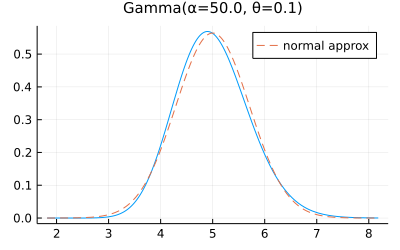

In [131]:
plot_normalapprox(Gamma(50, 0.1))

### χ²分布の正規分布近似

$\nu > 0$ でありかつ,

$$
(Y_1,\ldots,Y_n) \sim \op{Chisq}(\nu/n) = \op{Gamma}(\nu/(2n), 2)
$$

であるとき, 

$$
Y = Y_1 + \cdots + Y_n \sim \op{Chisq}(\nu) = \op{Gamma}(\nu/2, 2)
$$

であり, 中心極限定理によって独立同分布な確率変数達の和の分布が正規分布で近似されることより, $\nu$ が大きなとき, $Y$ の分布は正規分布で近似される.

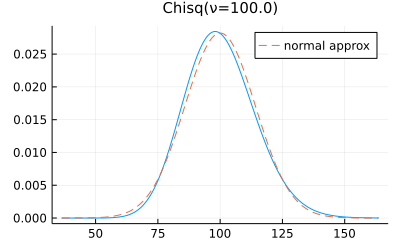

In [132]:
plot_normalapprox(Chisq(100))

### 逆ガンマ分布の正規分布近似

$\alpha > 0$ が大きなとき, 逆ガンマ分布 $\op{InverseGamma}(\alpha, \theta)$ は正規分布で近似される.

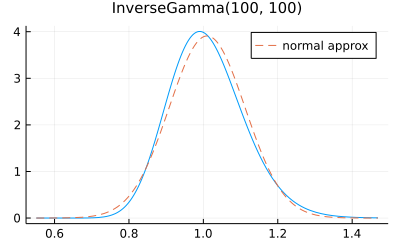

In [133]:
plot_normalapprox(InverseGamma(100, 100); title="InverseGamma(100, 100)")

### ベータ分布の正規分布近似

すでに上で示したように, $\alpha,\beta>0$ が大きなとき, ベータ分布 $\op{Beta}(\alpha,\beta)$ は正規分布で近似される.

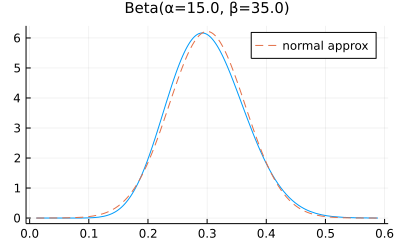

In [134]:
plot_normalapprox(Beta(15, 35))

### $t$ 分布の正規分布近似

「Gauss積分, ガンマ函数, ベータ函数」のノートですでに示したように, $\nu>0$ が大きなとき, $t$ 分布 $\op{TDist}(\nu)$ は標準正規分布で近似される.

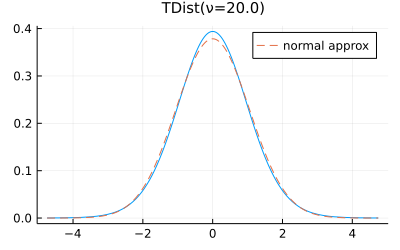

In [135]:
plot_normalapprox(TDist(20))

### ベータプライム分布の正規分布近似

$\alpha, \beta > 0$ が大きなとき, ベータプライム分布 $\op{BetaPrime}(\alpha, \beta)$ は正規分布で近似される. (証明に興味がある人は自分で証明してみよ. ベータプライム分布は $F$ 分布のスケール変換に等しい.)

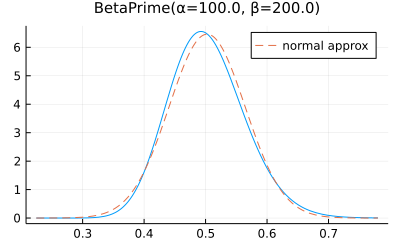

In [136]:
plot_normalapprox(BetaPrime(100, 200))

### $F$ 分布の正規分布近似

$\nu_1,\nu_2>0$ が大きなとき, $F$ 分布 $\op{FDist}(\nu_1, \nu_2) = (\nu_2/\nu_1)\op{BetaPrime}(\nu_1/2, \nu_2/2)$ は正規分布で近似される.

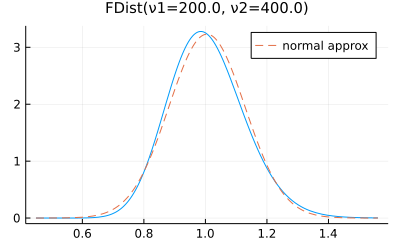

In [137]:
plot_normalapprox(FDist(200, 400))

### 超幾何分布の正規分布近似

$s,f,n$ が大きなとき, 超幾何分布 $\op{Hypergeometric}(s, f, n)$ は正規分布で近似される.

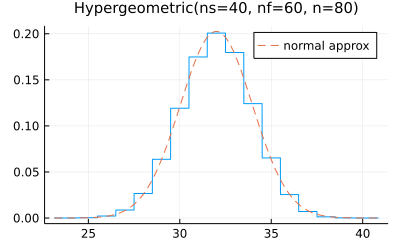

In [138]:
plot_normalapprox(Hypergeometric(40, 60, 80))

### ベータ二項分布の正規分布近似

$n, \alpha, \beta$ が大きなとき, ベータ二項分布 $\op{BetaBinomial}(n, \alpha, \beta)$ は正規分布で近似される.

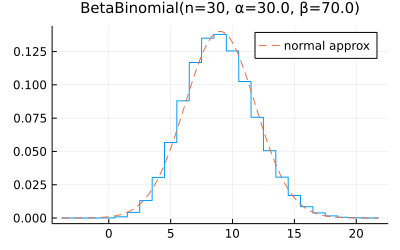

In [139]:
plot_normalapprox(BetaBinomial(30, 30, 70))

### ベータ負の二項分布の正規分布近似

$k, \alpha, \beta$ が大きなとき, ベータ二項分布 $\op{BetaNegativeBinomial}(k, \alpha, \beta)$ は正規分布で近似される.

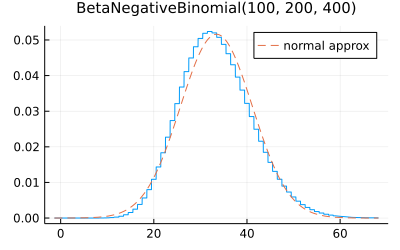

In [140]:
plot_normalapprox(O.BetaNegativeBinomial(100, 300, 100);
    title="BetaNegativeBinomial(100, 200, 400)")